# 從雲端讀取資料

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Progress Bar
from tqdm import tqdm

# For plotting learning curve
from torch.utils.tensorboard import SummaryWriter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data read from Drive

In [ ]:
train_data,valid_data,test_data=pd.read_csv('/content/drive/MyDrive/machine_learning/HW1/train-v3.csv'),pd.read_csv('/content/drive/MyDrive/machine_learning/HW1/valid-v3.csv'),pd.read_csv('/content/drive/MyDrive/machine_learning/HW1/test-v3.csv')
# train_data[train_data.duplicated()]  # clear duplicate data
train_data

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.00,1900,8160,1,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.00,3380,16133,1,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.00,2070,9000,1,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.00,1150,8924,1,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.50,2040,7503,2,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,9253900354,580000,2014,7,1,3,2.50,2200,11000,2,...,9,2200,0,1978,0,98008,47.5916,-122.112,2200,12851
12963,9510300130,598000,2014,6,28,4,2.50,3130,40918,2,...,9,3130,0,1994,0,98045,47.4761,-121.723,2760,35440
12964,1105000373,252500,2015,5,6,2,1.50,1110,986,2,...,7,950,160,2009,0,98118,47.5427,-122.272,1110,3515
12965,3629990280,497000,2014,6,23,3,2.25,1630,3817,2,...,7,1630,0,2005,0,98029,47.5485,-121.999,1630,3348


In [ ]:
train_data.drop(labels='id',axis=1,inplace=True)

In [ ]:
train_data.shape

(12967, 22)

In [ ]:
train_data.head()

,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,200000,2015,3,27,4,2.0,1900,8160,1,0,...,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,350000,2014,9,2,4,3.0,3380,16133,1,0,...,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,254000,2014,12,11,3,2.0,2070,9000,1,0,...,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,175000,2015,4,30,3,1.0,1150,8924,1,0,...,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,619000,2015,3,31,3,2.5,2040,7503,2,0,...,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503


# Test LinearRegression function


In [ ]:
train_data.columns

Index(['price', 'sale_yr', 'sale_month', 'sale_day', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
Features1=['sale_yr', 'bedrooms', 'bathrooms',
       'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# Features1 = ['yr_built','sale_yr','bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','waterfront','view','sqft_above','condition','sqft_basement','lat','sqft_living15','yr_renovated']
target = 'price'
x_train = train_data[Features1]
y_train = train_data[target]
x_test=valid_data[Features1]
y_test=valid_data[target]

# instance of the Linear Regression model creation
model = LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model
score = model.score(x_test, y_test)
print("Model R^2 Score:", score)

# Predicting the price of a new house
# new_house = pd.DataFrame({'bedrooms': [2], 'bathrooms': [2.5], 'sqft_living': [600], 'sqft_lot': [600], 'floors': [2], 'zipcode': [98008]})
# predicted_price = model.predict(new_house)
# print("Predicted Price:", predicted_price[0])

Model R^2 Score: 0.7018636161349951


In [ ]:
y_test=test_data[Features1]
predicted_price = model.predict(y_test)
print("Predicted Price:", predicted_price)
save_pred(predicted_price,'pred.csv')

Predicted Price: [551693.96950213 914558.54218367 492170.21581498 ... 365414.85685357
 627771.36816563 137188.64775822]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(n_estimators=100,criterion='friedman_mse')
# Training the model
RegModel=RegModel.fit(x_train, y_train)



In [ ]:
score(RegModel, (x_train), (y_train), (x_test), (y_test), train=False)

TypeError: ignored

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12967 entries, 0 to 12966
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          12967 non-null  int64  
 1   sale_yr        12967 non-null  int64  
 2   sale_month     12967 non-null  int64  
 3   sale_day       12967 non-null  int64  
 4   bedrooms       12967 non-null  int64  
 5   bathrooms      12967 non-null  float64
 6   sqft_living    12967 non-null  int64  
 7   sqft_lot       12967 non-null  int64  
 8   floors         12967 non-null  int64  
 9   waterfront     12967 non-null  int64  
 10  view           12967 non-null  int64  
 11  condition      12967 non-null  int64  
 12  grade          12967 non-null  int64  
 13  sqft_above     12967 non-null  int64  
 14  sqft_basement  12967 non-null  int64  
 15  yr_built       12967 non-null  int64  
 16  yr_renovated   12967 non-null  int64  
 17  zipcode        12967 non-null  int64  
 18  lat   

<Axes: >

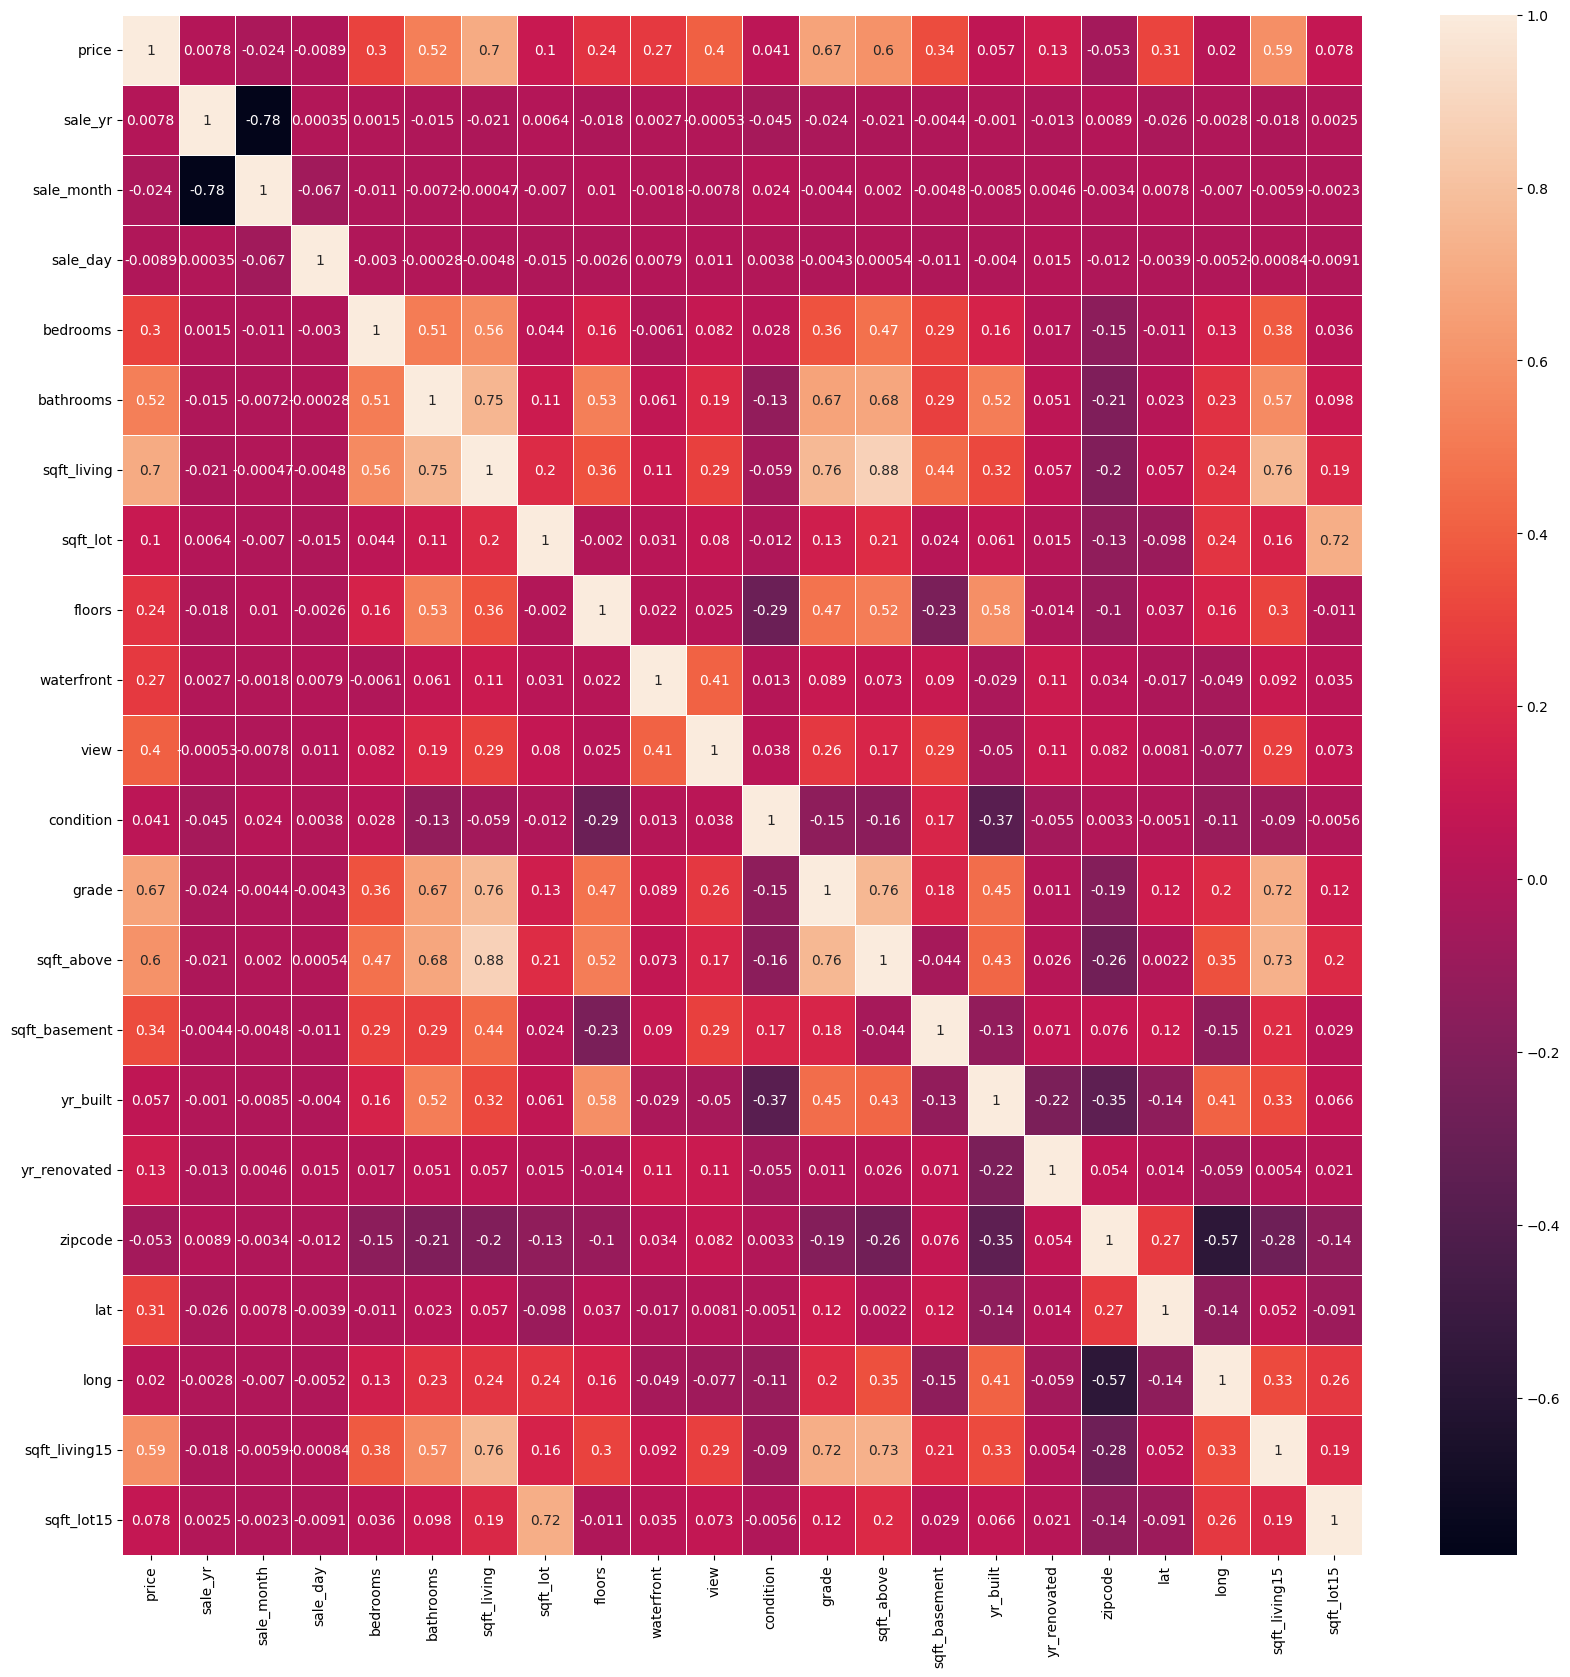

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, ax=ax)

# Some Utility Functions

In [ ]:
def same_seed(seed):
    '''Fixes random number generator seeds for reproducibility.'''
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Feature Selection
  Choose features that is useful

In [ ]:
def select_feat(train_data, valid_data, test_data):
    '''Selects useful features to perform regression'''
    # x_train 是 train data
    # y_train 是 x_train 的 結果
    y_train, y_valid = train_data['price'], valid_data['price']
    # raw_x_train, raw_x_valid, raw_x_test = train_data, valid_data, test_data

    corr_matrix = train_data.corr().abs()
    feature_col=[]
    for i in train_data.columns:
      if i=='price': continue
      if corr_matrix['price'][i] >= 0.1:
        feature_col.append(i)
    print("most corrlative with price : ",feature_col)

    return train_data[feature_col], valid_data[feature_col], test_data[feature_col], y_train, y_valid

In [ ]:
import math
def trainer(train_loader, valid_loader, model, config, device):

    criterion = nn.MSELoss(reduction='mean') # Define your loss function, do not modify this.

    # Define your optimization algorithm.
    # TODO: Please check https://pytorch.org/docs/stable/optim.html to get more available algorithms.
    # TODO: L2 regularization (optimizer(weight decay...) or implement by your self).
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

    writer = SummaryWriter() # Writer of tensoboard.

    if not os.path.isdir('./models'):
        os.mkdir('./models') # Create directory of saving models.

    n_epochs, best_loss, step, early_stop_count = config['n_epochs'], math.inf, 0, 0
    # 訓練 n_epochs 次
    for epoch in range(n_epochs):
        model.train() # Set your model to train mode.
        loss_record = []

        # tqdm is a package to visualize your training progress.
        train_pbar = tqdm(train_loader, position=0, leave=True)

        for x, y in train_pbar:
            optimizer.zero_grad()               # Set gradient to zero.
            x, y = x.to(device), y.to(device)   # Move your data to device.
            pred = model(x)
            loss = criterion(pred, y)
            loss.backward()                     # Compute gradient(backpropagation).
            optimizer.step()                    # Update parameters.
            step += 1
            loss_record.append(loss.item())

            # Display current epoch number and loss on tqdm progress bar.
            train_pbar.set_description(f'Epoch [{epoch+1}/{n_epochs}]')
            train_pbar.set_postfix({'loss': loss.detach().item()})

        mean_train_loss = sum(loss_record)/len(loss_record)
        writer.add_scalar('Loss/train', mean_train_loss, step)

        model.eval() # Set your model to evaluation mode.
        loss_record = []
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                loss = criterion(pred, y)

            loss_record.append(loss.item())

        mean_valid_loss = sum(loss_record)/len(loss_record)
        print(f'Epoch [{epoch+1}/{n_epochs}]: Train loss: {mean_train_loss:.4f}, Valid loss: {mean_valid_loss:.4f}')
        writer.add_scalar('Loss/valid', mean_valid_loss, step)

        if mean_valid_loss < best_loss:
            best_loss = mean_valid_loss
            torch.save(model.state_dict(), config['save_path']) # Save your best model
            print('Saving model with loss {:.3f}...'.format(best_loss))
            early_stop_count = 0
        else:
            early_stop_count += 1

        if early_stop_count >= config['early_stop']:
            print('\nModel is not improving, so we halt the training session.')
            return

In [ ]:
class HouseDataset(Dataset):
    '''
    x: Features.
    y: Targets, if none, do prediction.
    '''
    def __init__(self, x, y=None):
        if y is None:
            self.y = y
        else:
            self.y = torch.FloatTensor(y)
        self.x = torch.FloatTensor(x)

    def __getitem__(self, idx):
        if self.y is None:
            return self.x[idx]
        else:
            return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

In [ ]:
class My_Model(nn.Module):
    def __init__(self, input_dim):
        super(My_Model, self).__init__()
        # TODO: modify model's structure, be aware of dimensions.
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.squeeze(1) # (B, 1) -> (B)
        return x

In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 5201314,      # Your seed number, you can pick your lucky number. :)
    # 'select_all': True,   # Whether to use all features.
    # 'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 3000,     # Number of epochs.
    'batch_size': 256,
    'learning_rate': 0.000000001,
    'early_stop': 400,    # If model has not improved for this many consecutive epochs, stop training.
    'save_path': './models/model.ckpt'  # Your model will be saved here.
}
# same_seed(config['seed'])

In [4]:
print(device)

cpu


In [ ]:
# Select features
x_train, x_valid, x_test, y_train, y_valid = select_feat(train_data, valid_data, test_data)

# Print out the number of features.
print(f"""train_data size: {train_data.shape} | valid_data size: {valid_data.shape} | test_data size: {test_data.shape}""")
print(f"""x_train size: {x_train.shape} | x_valid size: {x_valid.shape} | x_test size: {x_test.shape}""")
train_dataset, valid_dataset, test_dataset = HouseDataset(x_train.values, y_train.values),HouseDataset(x_valid.values, y_valid.values),HouseDataset(x_test.values)

most corrlative with price :  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15']
train_data size: (12967, 23) | valid_data size: (2161, 23) | test_data size: (6485, 22)
x_train size: (12967, 13) | x_valid size: (2161, 13) | x_test size: (6485, 13)


In [ ]:
test_dataset.__len__()

6485

In [ ]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,4,1.75,2360,6000,1,0,0,7,1280,1080,0,47.6465,1700
1,3,2.75,3510,92347,2,0,0,10,3510,0,0,47.3735,2970
2,2,1.00,1020,5000,1,0,0,7,1020,0,0,47.6781,1480
3,2,2.50,1410,1281,2,0,0,8,1090,320,0,47.5659,1410
4,3,2.50,2010,6857,1,0,0,9,1450,560,0,47.6402,2380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,3,2.50,3220,6409,2,0,0,9,3220,0,0,47.4815,3330
6481,2,1.00,750,6380,1,0,0,7,750,0,0,47.7033,1690
6482,3,1.00,980,7228,1,0,0,7,980,0,0,47.7294,1070
6483,2,1.00,2230,11472,2,0,0,7,2230,0,0,47.7372,1870


In [ ]:
y_train.head()

0    200000
1    350000
2    254000
3    175000
4    619000
Name: price, dtype: int64

In [ ]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,4,2.0,1900,8160,1,0,0,7,1900,0,0,47.2114,1280
1,4,3.0,3380,16133,1,0,1,8,2330,1050,0,47.5501,2500
2,3,2.0,2070,9000,1,0,0,7,1450,620,0,47.3085,1630
3,3,1.0,1150,8924,1,0,0,6,1150,0,0,47.3865,1492
4,3,2.5,2040,7503,2,0,0,8,2040,0,0,47.5718,2170


In [ ]:
train_dataset[0]

(tensor([4.0000e+00, 2.0000e+00, 1.9000e+03, 8.1600e+03, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 7.0000e+00, 1.9000e+03, 0.0000e+00, 0.0000e+00, 4.7211e+01,
         1.2800e+03]),
 tensor(200000.))

In [ ]:
# Pytorch data loader loads pytorch dataset into batches.
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, pin_memory=True)

In [ ]:
model = My_Model(input_dim=x_train.shape[1]).to(device) # put your model and data on the same computation device.
trainer(train_loader, valid_loader, model, config, device)

Epoch [1/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.12it/s, loss=9.85e+10]


Epoch [1/3000]: Train loss: 113844538829.8039, Valid loss: 62152657123.5556
Saving model with loss 62152657123.556...


Epoch [2/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.23it/s, loss=3.35e+10]


Epoch [2/3000]: Train loss: 69352341062.2745, Valid loss: 61349077447.1111
Saving model with loss 61349077447.111...


Epoch [3/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.68it/s, loss=7.53e+10]


Epoch [3/3000]: Train loss: 67924333668.3922, Valid loss: 62267613184.0000


Epoch [4/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.58it/s, loss=1.4e+11]


Epoch [4/3000]: Train loss: 68657603965.4902, Valid loss: 76188966001.7778


Epoch [5/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.27it/s, loss=5.67e+10]


Epoch [5/3000]: Train loss: 67548087797.9608, Valid loss: 61211506460.4444
Saving model with loss 61211506460.444...


Epoch [6/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.16it/s, loss=1.14e+11]


Epoch [6/3000]: Train loss: 67466280799.3726, Valid loss: 78332876572.4444


Epoch [7/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.61it/s, loss=3.84e+10]


Epoch [7/3000]: Train loss: 66542681228.5490, Valid loss: 59998821489.7778
Saving model with loss 59998821489.778...


Epoch [8/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.45it/s, loss=3.63e+10]


Epoch [8/3000]: Train loss: 65918382401.2549, Valid loss: 61606189283.5556


Epoch [9/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.26it/s, loss=3.35e+10]


Epoch [9/3000]: Train loss: 65881468165.0196, Valid loss: 60212097479.1111


Epoch [10/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.32it/s, loss=6.55e+10]


Epoch [10/3000]: Train loss: 66330432210.8235, Valid loss: 63070683136.0000


Epoch [11/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.88it/s, loss=5.33e+10]


Epoch [11/3000]: Train loss: 66217737115.6078, Valid loss: 58494088988.4444
Saving model with loss 58494088988.444...


Epoch [12/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.19it/s, loss=5.4e+10]


Epoch [12/3000]: Train loss: 65191575552.0000, Valid loss: 66018951168.0000


Epoch [13/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.16it/s, loss=4.8e+10]


Epoch [13/3000]: Train loss: 64992780649.4118, Valid loss: 58684001393.7778


Epoch [14/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.57it/s, loss=2.67e+10]


Epoch [14/3000]: Train loss: 63918455105.2549, Valid loss: 62570955207.1111


Epoch [15/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.00it/s, loss=4.49e+10]


Epoch [15/3000]: Train loss: 63590821486.4314, Valid loss: 65543086080.0000


Epoch [16/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.72it/s, loss=6e+10]


Epoch [16/3000]: Train loss: 63304545541.0196, Valid loss: 60557832192.0000


Epoch [17/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.90it/s, loss=7.21e+10]


Epoch [17/3000]: Train loss: 63069983964.8627, Valid loss: 58644726670.2222


Epoch [18/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.15it/s, loss=7.04e+10]


Epoch [18/3000]: Train loss: 64532180389.6471, Valid loss: 57116745955.5556
Saving model with loss 57116745955.556...


Epoch [19/3000]: 100%|██████████| 51/51 [00:00<00:00, 62.96it/s, loss=5.61e+10]


Epoch [19/3000]: Train loss: 61327973556.7059, Valid loss: 59800109966.2222


Epoch [20/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.79it/s, loss=5.71e+10]


Epoch [20/3000]: Train loss: 62046963430.9020, Valid loss: 59564589056.0000


Epoch [21/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.81it/s, loss=3.82e+10]


Epoch [21/3000]: Train loss: 60647726300.8627, Valid loss: 57407127096.8889


Epoch [22/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.80it/s, loss=6.73e+10]


Epoch [22/3000]: Train loss: 61413568672.6274, Valid loss: 56876974080.0000
Saving model with loss 56876974080.000...


Epoch [23/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.24it/s, loss=4.71e+10]


Epoch [23/3000]: Train loss: 61018644680.7843, Valid loss: 70420331178.6667


Epoch [24/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.55it/s, loss=7.52e+10]


Epoch [24/3000]: Train loss: 61554664869.6471, Valid loss: 61995582350.2222


Epoch [25/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.31it/s, loss=4.81e+10]


Epoch [25/3000]: Train loss: 59904072362.6667, Valid loss: 56746619790.2222
Saving model with loss 56746619790.222...


Epoch [26/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.59it/s, loss=4.91e+10]


Epoch [26/3000]: Train loss: 60509023573.3333, Valid loss: 57243026318.2222


Epoch [27/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.24it/s, loss=1.08e+11]


Epoch [27/3000]: Train loss: 60364197727.3726, Valid loss: 65623370865.7778


Epoch [28/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.45it/s, loss=1.14e+11]


Epoch [28/3000]: Train loss: 59490476634.3529, Valid loss: 69891331868.4444


Epoch [29/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.85it/s, loss=9.24e+10]


Epoch [29/3000]: Train loss: 59550457293.8039, Valid loss: 62034908501.3333


Epoch [30/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.27it/s, loss=6.8e+10]


Epoch [30/3000]: Train loss: 58184876192.6274, Valid loss: 54389376796.4444
Saving model with loss 54389376796.444...


Epoch [31/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.77it/s, loss=3.62e+10]


Epoch [31/3000]: Train loss: 60209225487.0588, Valid loss: 53862336056.8889
Saving model with loss 53862336056.889...


Epoch [32/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.58it/s, loss=7.91e+10]


Epoch [32/3000]: Train loss: 60176705937.5686, Valid loss: 57255169592.8889


Epoch [33/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.93it/s, loss=3.88e+10]


Epoch [33/3000]: Train loss: 57771713435.6078, Valid loss: 54801007274.6667


Epoch [34/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.46it/s, loss=4.43e+10]


Epoch [34/3000]: Train loss: 58996699577.7255, Valid loss: 56331926414.2222


Epoch [35/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.13it/s, loss=4.58e+10]


Epoch [35/3000]: Train loss: 57859752980.0784, Valid loss: 53437370823.1111
Saving model with loss 53437370823.111...


Epoch [36/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.61it/s, loss=4.44e+10]


Epoch [36/3000]: Train loss: 57828783726.4314, Valid loss: 55272070712.8889


Epoch [37/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.03it/s, loss=4.68e+10]


Epoch [37/3000]: Train loss: 58894814348.5490, Valid loss: 56138850531.5556


Epoch [38/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.60it/s, loss=2.68e+10]


Epoch [38/3000]: Train loss: 57412399826.8235, Valid loss: 59484499968.0000


Epoch [39/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.21it/s, loss=5.97e+10]


Epoch [39/3000]: Train loss: 57638636564.0784, Valid loss: 55005847096.8889


Epoch [40/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.25it/s, loss=3.83e+10]


Epoch [40/3000]: Train loss: 57681957185.2549, Valid loss: 53409859356.4444
Saving model with loss 53409859356.444...


Epoch [41/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.96it/s, loss=5.76e+10]


Epoch [41/3000]: Train loss: 59485220984.4706, Valid loss: 54871665322.6667


Epoch [42/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.24it/s, loss=6.05e+10]


Epoch [42/3000]: Train loss: 57635871322.3529, Valid loss: 53276167054.2222
Saving model with loss 53276167054.222...


Epoch [43/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.33it/s, loss=1.04e+11]


Epoch [43/3000]: Train loss: 57690507384.4706, Valid loss: 70456306801.7778


Epoch [44/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.18it/s, loss=4.71e+10]


Epoch [44/3000]: Train loss: 56935825889.8824, Valid loss: 52883063239.1111
Saving model with loss 52883063239.111...


Epoch [45/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.37it/s, loss=2.9e+10]


Epoch [45/3000]: Train loss: 56568297110.5882, Valid loss: 52836828956.4444
Saving model with loss 52836828956.444...


Epoch [46/3000]: 100%|██████████| 51/51 [00:00<00:00, 88.89it/s, loss=3.68e+10]


Epoch [46/3000]: Train loss: 57777340576.6274, Valid loss: 53689026787.5556


Epoch [47/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.45it/s, loss=1.02e+11]


Epoch [47/3000]: Train loss: 57273694127.6863, Valid loss: 65970147783.1111


Epoch [48/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.44it/s, loss=7.67e+10]


Epoch [48/3000]: Train loss: 57983247339.9216, Valid loss: 58139561073.7778


Epoch [49/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.28it/s, loss=5.94e+10]


Epoch [49/3000]: Train loss: 56341514561.2549, Valid loss: 53329330403.5556


Epoch [50/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.48it/s, loss=1.13e+11]


Epoch [50/3000]: Train loss: 58002383811.7647, Valid loss: 61893523228.4444


Epoch [51/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.76it/s, loss=5.28e+10]


Epoch [51/3000]: Train loss: 57169289778.1961, Valid loss: 54340071424.0000


Epoch [52/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.58it/s, loss=7.64e+10]


Epoch [52/3000]: Train loss: 56393649653.9608, Valid loss: 57892961393.7778


Epoch [53/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.65it/s, loss=4.06e+10]


Epoch [53/3000]: Train loss: 56771467906.5098, Valid loss: 53000955904.0000


Epoch [54/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.01it/s, loss=5.04e+10]


Epoch [54/3000]: Train loss: 56522695137.8824, Valid loss: 52086588302.2222
Saving model with loss 52086588302.222...


Epoch [55/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.77it/s, loss=3.71e+10]


Epoch [55/3000]: Train loss: 55892557101.1765, Valid loss: 62573499733.3333


Epoch [56/3000]: 100%|██████████| 51/51 [00:00<00:00, 95.51it/s, loss=5.07e+10]


Epoch [56/3000]: Train loss: 56704991272.1569, Valid loss: 54393861916.4444


Epoch [57/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.99it/s, loss=5.75e+10]


Epoch [57/3000]: Train loss: 57718980005.6471, Valid loss: 52358180408.8889


Epoch [58/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.45it/s, loss=6.24e+10]


Epoch [58/3000]: Train loss: 56432166952.1569, Valid loss: 60925970659.5556


Epoch [59/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.89it/s, loss=3.94e+10]


Epoch [59/3000]: Train loss: 56907081205.9608, Valid loss: 52444825827.5556


Epoch [60/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.12it/s, loss=5.56e+10]


Epoch [60/3000]: Train loss: 55437320794.3529, Valid loss: 54785600625.7778


Epoch [61/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.52it/s, loss=8.01e+10]


Epoch [61/3000]: Train loss: 56098057236.0784, Valid loss: 54423961600.0000


Epoch [62/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.09it/s, loss=5.45e+10]


Epoch [62/3000]: Train loss: 55680612271.6863, Valid loss: 53176297244.4444


Epoch [63/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.29it/s, loss=4.34e+10]


Epoch [63/3000]: Train loss: 55763115509.9608, Valid loss: 64147229809.7778


Epoch [64/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.54it/s, loss=5.01e+10]


Epoch [64/3000]: Train loss: 56510813605.6471, Valid loss: 57963303822.2222


Epoch [65/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.37it/s, loss=3.29e+10]


Epoch [65/3000]: Train loss: 55926042543.6863, Valid loss: 52222129493.3333


Epoch [66/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.83it/s, loss=9.26e+10]


Epoch [66/3000]: Train loss: 56294097658.9804, Valid loss: 53381026247.1111


Epoch [67/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.78it/s, loss=1.07e+11]


Epoch [67/3000]: Train loss: 55925170416.9412, Valid loss: 55908061184.0000


Epoch [68/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.39it/s, loss=5.42e+10]


Epoch [68/3000]: Train loss: 55414030336.0000, Valid loss: 53561077987.5556


Epoch [69/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.50it/s, loss=3.58e+10]


Epoch [69/3000]: Train loss: 55466599203.1373, Valid loss: 51426062791.1111
Saving model with loss 51426062791.111...


Epoch [70/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.58it/s, loss=5.08e+10]


Epoch [70/3000]: Train loss: 55277433072.9412, Valid loss: 53640256625.7778


Epoch [71/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.63it/s, loss=6.48e+10]


Epoch [71/3000]: Train loss: 56318643742.1176, Valid loss: 56282677475.5556


Epoch [72/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.39it/s, loss=7.87e+10]


Epoch [72/3000]: Train loss: 55969037291.9216, Valid loss: 52388544512.0000


Epoch [73/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.42it/s, loss=4.25e+10]


Epoch [73/3000]: Train loss: 55827757578.0392, Valid loss: 53109366556.4444


Epoch [74/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.50it/s, loss=7.95e+10]


Epoch [74/3000]: Train loss: 55616065134.4314, Valid loss: 53162416583.1111


Epoch [75/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.92it/s, loss=5.11e+10]


Epoch [75/3000]: Train loss: 55616265436.8627, Valid loss: 57941113059.5556


Epoch [76/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.62it/s, loss=6.26e+10]


Epoch [76/3000]: Train loss: 55545288463.0588, Valid loss: 54653091612.4444


Epoch [77/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.41it/s, loss=4.08e+10]


Epoch [77/3000]: Train loss: 55818149486.4314, Valid loss: 57418262300.4444


Epoch [78/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.21it/s, loss=2.82e+10]


Epoch [78/3000]: Train loss: 54482350963.4510, Valid loss: 55986569216.0000


Epoch [79/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.93it/s, loss=7.54e+10]


Epoch [79/3000]: Train loss: 55655699596.5490, Valid loss: 55360374784.0000


Epoch [80/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.56it/s, loss=5.41e+10]


Epoch [80/3000]: Train loss: 56121343799.2157, Valid loss: 51989272803.5556


Epoch [81/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.43it/s, loss=2.89e+10]


Epoch [81/3000]: Train loss: 55048898078.1176, Valid loss: 52679433784.8889


Epoch [82/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.59it/s, loss=2.89e+10]


Epoch [82/3000]: Train loss: 55801467402.0392, Valid loss: 56882531214.2222


Epoch [83/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.66it/s, loss=3.92e+10]


Epoch [83/3000]: Train loss: 54518922380.5490, Valid loss: 60442142037.3333


Epoch [84/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.72it/s, loss=4.6e+10]


Epoch [84/3000]: Train loss: 54272419920.3137, Valid loss: 54275707335.1111


Epoch [85/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.50it/s, loss=4.79e+10]


Epoch [85/3000]: Train loss: 55332686667.2941, Valid loss: 53258391096.8889


Epoch [86/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.53it/s, loss=3.95e+10]


Epoch [86/3000]: Train loss: 54694824819.4510, Valid loss: 51795380224.0000


Epoch [87/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.48it/s, loss=2.47e+10]


Epoch [87/3000]: Train loss: 53721405158.9020, Valid loss: 51091963676.4444
Saving model with loss 51091963676.444...


Epoch [88/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.90it/s, loss=5.37e+10]


Epoch [88/3000]: Train loss: 54664421416.1569, Valid loss: 50529429048.8889
Saving model with loss 50529429048.889...


Epoch [89/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.16it/s, loss=1e+11]


Epoch [89/3000]: Train loss: 54848497141.9608, Valid loss: 59201008071.1111


Epoch [90/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.18it/s, loss=6.84e+10]


Epoch [90/3000]: Train loss: 55299432608.6274, Valid loss: 54649371761.7778


Epoch [91/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.22it/s, loss=3.28e+10]


Epoch [91/3000]: Train loss: 54045706480.9412, Valid loss: 50901949781.3333


Epoch [92/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.33it/s, loss=4.38e+10]


Epoch [92/3000]: Train loss: 54998382150.2745, Valid loss: 51496538567.1111


Epoch [93/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.48it/s, loss=5e+10]


Epoch [93/3000]: Train loss: 53587303725.1765, Valid loss: 53173726776.8889


Epoch [94/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.12it/s, loss=4.67e+10]


Epoch [94/3000]: Train loss: 53933825485.8039, Valid loss: 50268068067.5556
Saving model with loss 50268068067.556...


Epoch [95/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.02it/s, loss=8.68e+10]


Epoch [95/3000]: Train loss: 55081713583.6863, Valid loss: 55062883896.8889


Epoch [96/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.04it/s, loss=4.21e+10]


Epoch [96/3000]: Train loss: 55113427867.6078, Valid loss: 51121810773.3333


Epoch [97/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.16it/s, loss=5.98e+10]


Epoch [97/3000]: Train loss: 53434591633.5686, Valid loss: 55004687473.7778


Epoch [98/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.45it/s, loss=4.93e+10]


Epoch [98/3000]: Train loss: 56269460218.9804, Valid loss: 52995434951.1111


Epoch [99/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.61it/s, loss=4.91e+10]


Epoch [99/3000]: Train loss: 54295105335.2157, Valid loss: 50465575367.1111


Epoch [100/3000]: 100%|██████████| 51/51 [00:00<00:00, 76.44it/s, loss=6.19e+10]


Epoch [100/3000]: Train loss: 53446073323.9216, Valid loss: 52367758222.2222


Epoch [101/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.19it/s, loss=7.63e+10]


Epoch [101/3000]: Train loss: 54699528432.9412, Valid loss: 57364744419.5556


Epoch [102/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.99it/s, loss=6.09e+10]


Epoch [102/3000]: Train loss: 54005640212.0784, Valid loss: 52481666616.8889


Epoch [103/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.14it/s, loss=6.19e+10]


Epoch [103/3000]: Train loss: 53675203322.9804, Valid loss: 53479161856.0000


Epoch [104/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.29it/s, loss=4.38e+10]


Epoch [104/3000]: Train loss: 54053577748.0784, Valid loss: 54086036138.6667


Epoch [105/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.94it/s, loss=6.45e+10]


Epoch [105/3000]: Train loss: 54283849005.1765, Valid loss: 50951160945.7778


Epoch [106/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.60it/s, loss=8.15e+10]


Epoch [106/3000]: Train loss: 52767377648.9412, Valid loss: 50578847061.3333


Epoch [107/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.44it/s, loss=4.56e+10]


Epoch [107/3000]: Train loss: 53805336134.2745, Valid loss: 50370724750.2222


Epoch [108/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.35it/s, loss=4.73e+10]


Epoch [108/3000]: Train loss: 54345299927.8431, Valid loss: 54376795022.2222


Epoch [109/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.99it/s, loss=3.77e+10]


Epoch [109/3000]: Train loss: 54264425210.9804, Valid loss: 52637760170.6667


Epoch [110/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.60it/s, loss=4.65e+10]


Epoch [110/3000]: Train loss: 53806306042.9804, Valid loss: 51825061432.8889


Epoch [111/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.87it/s, loss=5.43e+10]


Epoch [111/3000]: Train loss: 53534016572.2353, Valid loss: 50328079928.8889


Epoch [112/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.15it/s, loss=4.7e+10]


Epoch [112/3000]: Train loss: 53547770779.6078, Valid loss: 57472410510.2222


Epoch [113/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.75it/s, loss=4e+10]


Epoch [113/3000]: Train loss: 53214977525.9608, Valid loss: 51009242453.3333


Epoch [114/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.78it/s, loss=3.19e+10]


Epoch [114/3000]: Train loss: 53105609748.0784, Valid loss: 48875325212.4444
Saving model with loss 48875325212.444...


Epoch [115/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.35it/s, loss=5.1e+10]


Epoch [115/3000]: Train loss: 54435525692.2353, Valid loss: 50794893084.4444


Epoch [116/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.17it/s, loss=4.07e+10]


Epoch [116/3000]: Train loss: 53224292592.9412, Valid loss: 51973209201.7778


Epoch [117/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.86it/s, loss=4.62e+10]


Epoch [117/3000]: Train loss: 53247952213.3333, Valid loss: 59639760213.3333


Epoch [118/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.83it/s, loss=4.51e+10]


Epoch [118/3000]: Train loss: 54175851981.8039, Valid loss: 52277534720.0000


Epoch [119/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.06it/s, loss=4.6e+10]


Epoch [119/3000]: Train loss: 53246579410.8235, Valid loss: 51191519687.1111


Epoch [120/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.86it/s, loss=4.37e+10]


Epoch [120/3000]: Train loss: 54356651188.7059, Valid loss: 50796711025.7778


Epoch [121/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.81it/s, loss=5.56e+10]


Epoch [121/3000]: Train loss: 52804075720.7843, Valid loss: 61394954012.4444


Epoch [122/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.69it/s, loss=2.9e+10]


Epoch [122/3000]: Train loss: 53864920084.0784, Valid loss: 49595235214.2222


Epoch [123/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.17it/s, loss=3.7e+10]


Epoch [123/3000]: Train loss: 53696568781.8039, Valid loss: 54377998336.0000


Epoch [124/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.58it/s, loss=5.9e+10]


Epoch [124/3000]: Train loss: 52646566249.4118, Valid loss: 57313494357.3333


Epoch [125/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.86it/s, loss=4.84e+10]


Epoch [125/3000]: Train loss: 54029746336.6274, Valid loss: 52542854485.3333


Epoch [126/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.59it/s, loss=8.34e+10]


Epoch [126/3000]: Train loss: 54188758799.0588, Valid loss: 54771575694.2222


Epoch [127/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.65it/s, loss=6.96e+10]


Epoch [127/3000]: Train loss: 52359724293.0196, Valid loss: 50989572551.1111


Epoch [128/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.19it/s, loss=3.53e+10]


Epoch [128/3000]: Train loss: 52793708383.3726, Valid loss: 52062894762.6667


Epoch [129/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.38it/s, loss=4.33e+10]


Epoch [129/3000]: Train loss: 52990166839.2157, Valid loss: 50327363584.0000


Epoch [130/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.61it/s, loss=7.62e+10]


Epoch [130/3000]: Train loss: 52780897059.1373, Valid loss: 54598044330.6667


Epoch [131/3000]: 100%|██████████| 51/51 [00:00<00:00, 164.56it/s, loss=3.18e+10]


Epoch [131/3000]: Train loss: 52510285181.4902, Valid loss: 49865920967.1111


Epoch [132/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.64it/s, loss=4.35e+10]


Epoch [132/3000]: Train loss: 53392760229.6471, Valid loss: 48810231352.8889
Saving model with loss 48810231352.889...


Epoch [133/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.68it/s, loss=5e+10]


Epoch [133/3000]: Train loss: 52148632274.8235, Valid loss: 52466855025.7778


Epoch [134/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.37it/s, loss=3.6e+10]


Epoch [134/3000]: Train loss: 53909782688.6274, Valid loss: 51039520540.4444


Epoch [135/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.00it/s, loss=3.9e+10]


Epoch [135/3000]: Train loss: 52568977408.0000, Valid loss: 49469481415.1111


Epoch [136/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.20it/s, loss=4.95e+10]


Epoch [136/3000]: Train loss: 52288094448.9412, Valid loss: 48865604721.7778


Epoch [137/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.96it/s, loss=3.45e+10]


Epoch [137/3000]: Train loss: 53241747094.5882, Valid loss: 48387407189.3333
Saving model with loss 48387407189.333...


Epoch [138/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.53it/s, loss=4.77e+10]


Epoch [138/3000]: Train loss: 52054643611.6078, Valid loss: 50736941738.6667


Epoch [139/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.38it/s, loss=6.47e+10]


Epoch [139/3000]: Train loss: 54221378901.3333, Valid loss: 47730673664.0000
Saving model with loss 47730673664.000...


Epoch [140/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.02it/s, loss=5.3e+10]


Epoch [140/3000]: Train loss: 54456537328.9412, Valid loss: 52781103331.5556


Epoch [141/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.84it/s, loss=3.97e+10]


Epoch [141/3000]: Train loss: 51764841210.9804, Valid loss: 49799283598.2222


Epoch [142/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.80it/s, loss=4.23e+10]


Epoch [142/3000]: Train loss: 52318272813.1765, Valid loss: 50189897728.0000


Epoch [143/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.06it/s, loss=4.22e+10]


Epoch [143/3000]: Train loss: 51682409973.9608, Valid loss: 49597837767.1111


Epoch [144/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.98it/s, loss=3.18e+10]


Epoch [144/3000]: Train loss: 52388458897.5686, Valid loss: 52048164408.8889


Epoch [145/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.73it/s, loss=8.99e+10]


Epoch [145/3000]: Train loss: 52619235287.8431, Valid loss: 54809653703.1111


Epoch [146/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.11it/s, loss=3.68e+10]


Epoch [146/3000]: Train loss: 52383718379.9216, Valid loss: 48716080014.2222


Epoch [147/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.54it/s, loss=3.04e+10]


Epoch [147/3000]: Train loss: 52570405386.0392, Valid loss: 48437559296.0000


Epoch [148/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.09it/s, loss=5.14e+10]


Epoch [148/3000]: Train loss: 51056062865.5686, Valid loss: 50984924501.3333


Epoch [149/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.04it/s, loss=4.14e+10]


Epoch [149/3000]: Train loss: 53183090406.9020, Valid loss: 49619888355.5556


Epoch [150/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.65it/s, loss=8.04e+10]


Epoch [150/3000]: Train loss: 51354469275.6078, Valid loss: 53510010197.3333


Epoch [151/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.09it/s, loss=5e+10]


Epoch [151/3000]: Train loss: 52344263218.1961, Valid loss: 51323610453.3333


Epoch [152/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.30it/s, loss=3.6e+10]


Epoch [152/3000]: Train loss: 52334821496.4706, Valid loss: 49518860970.6667


Epoch [153/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.58it/s, loss=6.86e+10]


Epoch [153/3000]: Train loss: 52210564557.8039, Valid loss: 61378126734.2222


Epoch [154/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.37it/s, loss=7.68e+10]


Epoch [154/3000]: Train loss: 52225792843.2941, Valid loss: 51737586346.6667


Epoch [155/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.74it/s, loss=5.26e+10]


Epoch [155/3000]: Train loss: 51674874337.8824, Valid loss: 47627020743.1111
Saving model with loss 47627020743.111...


Epoch [156/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.55it/s, loss=5.69e+10]


Epoch [156/3000]: Train loss: 51757199600.9412, Valid loss: 60493660615.1111


Epoch [157/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.58it/s, loss=3.51e+10]


Epoch [157/3000]: Train loss: 52958191856.9412, Valid loss: 52583587384.8889


Epoch [158/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.52it/s, loss=6.2e+10]


Epoch [158/3000]: Train loss: 51741773783.8431, Valid loss: 48623306979.5556


Epoch [159/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.95it/s, loss=3.4e+10]


Epoch [159/3000]: Train loss: 51924565333.3333, Valid loss: 48677490232.8889


Epoch [160/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.43it/s, loss=3.8e+10]


Epoch [160/3000]: Train loss: 51840387513.7255, Valid loss: 47828239701.3333


Epoch [161/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.03it/s, loss=3.99e+10]


Epoch [161/3000]: Train loss: 51130000604.8627, Valid loss: 49985017400.8889


Epoch [162/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.78it/s, loss=4.26e+10]


Epoch [162/3000]: Train loss: 51240102249.4118, Valid loss: 46897028664.8889
Saving model with loss 46897028664.889...


Epoch [163/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.73it/s, loss=3.92e+10]


Epoch [163/3000]: Train loss: 50600239866.9804, Valid loss: 49442423239.1111


Epoch [164/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.78it/s, loss=3.34e+10]


Epoch [164/3000]: Train loss: 52987271087.6863, Valid loss: 49445090645.3333


Epoch [165/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.69it/s, loss=4.59e+10]


Epoch [165/3000]: Train loss: 51711048121.7255, Valid loss: 47418309973.3333


Epoch [166/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.45it/s, loss=3.73e+10]


Epoch [166/3000]: Train loss: 51050348744.7843, Valid loss: 49230901703.1111


Epoch [167/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.72it/s, loss=4.54e+10]


Epoch [167/3000]: Train loss: 52124839695.0588, Valid loss: 51469385728.0000


Epoch [168/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.02it/s, loss=4.85e+10]


Epoch [168/3000]: Train loss: 50941660220.2353, Valid loss: 51823655594.6667


Epoch [169/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.24it/s, loss=2.69e+10]


Epoch [169/3000]: Train loss: 51468137010.1961, Valid loss: 47723421013.3333


Epoch [170/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.46it/s, loss=5.07e+10]


Epoch [170/3000]: Train loss: 51076391273.4118, Valid loss: 48454500352.0000


Epoch [171/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.20it/s, loss=4.61e+10]


Epoch [171/3000]: Train loss: 52151208257.2549, Valid loss: 48827076152.8889


Epoch [172/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.99it/s, loss=5.95e+10]


Epoch [172/3000]: Train loss: 50694081154.5098, Valid loss: 50682393941.3333


Epoch [173/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.86it/s, loss=3.14e+10]


Epoch [173/3000]: Train loss: 51664998922.0392, Valid loss: 49994459363.5556


Epoch [174/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.55it/s, loss=5.87e+10]


Epoch [174/3000]: Train loss: 51753302457.7255, Valid loss: 47652728376.8889


Epoch [175/3000]: 100%|██████████| 51/51 [00:00<00:00, 162.95it/s, loss=3.59e+10]


Epoch [175/3000]: Train loss: 51539465798.2745, Valid loss: 46807942030.2222
Saving model with loss 46807942030.222...


Epoch [176/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.11it/s, loss=5.21e+10]


Epoch [176/3000]: Train loss: 51865334241.8824, Valid loss: 48733224960.0000


Epoch [177/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.45it/s, loss=3.99e+10]


Epoch [177/3000]: Train loss: 50957695738.9804, Valid loss: 48737643406.2222


Epoch [178/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.14it/s, loss=4.19e+10]


Epoch [178/3000]: Train loss: 50972492137.4118, Valid loss: 50487674424.8889


Epoch [179/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.64it/s, loss=5.36e+10]


Epoch [179/3000]: Train loss: 51748001671.5294, Valid loss: 48004661930.6667


Epoch [180/3000]: 100%|██████████| 51/51 [00:00<00:00, 72.52it/s, loss=3.48e+10] 


Epoch [180/3000]: Train loss: 50324998786.5098, Valid loss: 47642105856.0000


Epoch [181/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.14it/s, loss=3.61e+10]


Epoch [181/3000]: Train loss: 51436265190.9020, Valid loss: 48820386019.5556


Epoch [182/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.33it/s, loss=6.57e+10]


Epoch [182/3000]: Train loss: 52751273783.2157, Valid loss: 52099789482.6667


Epoch [183/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.54it/s, loss=9.35e+10]


Epoch [183/3000]: Train loss: 50181753996.5490, Valid loss: 83056752867.5556


Epoch [184/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.16it/s, loss=8.29e+10]


Epoch [184/3000]: Train loss: 51351673354.0392, Valid loss: 50483458958.2222


Epoch [185/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.82it/s, loss=5.17e+10]


Epoch [185/3000]: Train loss: 50462509818.9804, Valid loss: 50010734592.0000


Epoch [186/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.32it/s, loss=4.24e+10]


Epoch [186/3000]: Train loss: 51260648789.3333, Valid loss: 49842386261.3333


Epoch [187/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.73it/s, loss=5.76e+10]


Epoch [187/3000]: Train loss: 49975613279.3726, Valid loss: 46186625024.0000
Saving model with loss 46186625024.000...


Epoch [188/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.99it/s, loss=3.79e+10]


Epoch [188/3000]: Train loss: 51004582811.6078, Valid loss: 48899786979.5556


Epoch [189/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.64it/s, loss=2.68e+10]


Epoch [189/3000]: Train loss: 51609797451.2941, Valid loss: 45696465806.2222
Saving model with loss 45696465806.222...


Epoch [190/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.52it/s, loss=5.95e+10]


Epoch [190/3000]: Train loss: 50781796954.3529, Valid loss: 48379077063.1111


Epoch [191/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.09it/s, loss=5.77e+10]


Epoch [191/3000]: Train loss: 50138514170.9804, Valid loss: 46544854129.7778


Epoch [192/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.51it/s, loss=4.9e+10]


Epoch [192/3000]: Train loss: 50568486831.6863, Valid loss: 49865861347.5556


Epoch [193/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.19it/s, loss=4.14e+10]


Epoch [193/3000]: Train loss: 50681538600.1569, Valid loss: 50295621176.8889


Epoch [194/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.23it/s, loss=1.2e+11]


Epoch [194/3000]: Train loss: 52345073824.6274, Valid loss: 84633414314.6667


Epoch [195/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.87it/s, loss=5.12e+10]


Epoch [195/3000]: Train loss: 50717651265.2549, Valid loss: 48104679196.4444


Epoch [196/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.89it/s, loss=3.42e+10]


Epoch [196/3000]: Train loss: 50303197224.1569, Valid loss: 49882322488.8889


Epoch [197/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.79it/s, loss=4.09e+10]


Epoch [197/3000]: Train loss: 48906135431.5294, Valid loss: 47143874104.8889


Epoch [198/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.75it/s, loss=5.18e+10]


Epoch [198/3000]: Train loss: 49986440453.0196, Valid loss: 47165812280.8889


Epoch [199/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.42it/s, loss=2.95e+10]


Epoch [199/3000]: Train loss: 50799185679.0588, Valid loss: 48227596515.5556


Epoch [200/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.27it/s, loss=4.5e+10]


Epoch [200/3000]: Train loss: 49044634162.1961, Valid loss: 48837636096.0000


Epoch [201/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.63it/s, loss=5.51e+10]


Epoch [201/3000]: Train loss: 50352977116.8627, Valid loss: 45912041472.0000


Epoch [202/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.74it/s, loss=6.79e+10]


Epoch [202/3000]: Train loss: 50689407096.4706, Valid loss: 59682221169.7778


Epoch [203/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.90it/s, loss=3.92e+10]


Epoch [203/3000]: Train loss: 50446008199.5294, Valid loss: 48926128128.0000


Epoch [204/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.89it/s, loss=5.44e+10]


Epoch [204/3000]: Train loss: 50124690050.5098, Valid loss: 50761760768.0000


Epoch [205/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.24it/s, loss=4.89e+10]


Epoch [205/3000]: Train loss: 49833684389.6471, Valid loss: 53289482467.5556


Epoch [206/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.33it/s, loss=4.4e+10]


Epoch [206/3000]: Train loss: 50198815804.2353, Valid loss: 48824804238.2222


Epoch [207/3000]: 100%|██████████| 51/51 [00:00<00:00, 74.58it/s, loss=5.52e+10] 


Epoch [207/3000]: Train loss: 51745680404.0784, Valid loss: 49237635072.0000


Epoch [208/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.50it/s, loss=5.47e+10]


Epoch [208/3000]: Train loss: 53736677496.4706, Valid loss: 49492546901.3333


Epoch [209/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.29it/s, loss=5.08e+10]


Epoch [209/3000]: Train loss: 49996946050.5098, Valid loss: 55362171790.2222


Epoch [210/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.42it/s, loss=6.07e+10]


Epoch [210/3000]: Train loss: 50828060511.3726, Valid loss: 51088085447.1111


Epoch [211/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.29it/s, loss=3.87e+10]


Epoch [211/3000]: Train loss: 49587019615.3726, Valid loss: 49510000412.4444


Epoch [212/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.72it/s, loss=4.22e+10]


Epoch [212/3000]: Train loss: 48770472538.3529, Valid loss: 48147141518.2222


Epoch [213/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.70it/s, loss=5.61e+10]


Epoch [213/3000]: Train loss: 50097556580.3922, Valid loss: 48819650560.0000


Epoch [214/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.62it/s, loss=2.79e+10]


Epoch [214/3000]: Train loss: 52476173251.7647, Valid loss: 49323305870.2222


Epoch [215/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.00it/s, loss=4.48e+10]


Epoch [215/3000]: Train loss: 49802315936.6274, Valid loss: 46354275669.3333


Epoch [216/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.21it/s, loss=3.16e+10]


Epoch [216/3000]: Train loss: 49753879170.5098, Valid loss: 55274870101.3333


Epoch [217/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.96it/s, loss=2.76e+10]


Epoch [217/3000]: Train loss: 50172061696.0000, Valid loss: 47194534570.6667


Epoch [218/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.16it/s, loss=2.4e+10]


Epoch [218/3000]: Train loss: 51489093993.4118, Valid loss: 50327571797.3333


Epoch [219/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.89it/s, loss=5.42e+10]


Epoch [219/3000]: Train loss: 48948457311.3726, Valid loss: 55032859079.1111


Epoch [220/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.72it/s, loss=4.08e+10]


Epoch [220/3000]: Train loss: 50266415947.2941, Valid loss: 48683749376.0000


Epoch [221/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.04it/s, loss=4.1e+10]


Epoch [221/3000]: Train loss: 49207641268.7059, Valid loss: 45613407800.8889
Saving model with loss 45613407800.889...


Epoch [222/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.26it/s, loss=3.05e+10]


Epoch [222/3000]: Train loss: 49943014661.0196, Valid loss: 46396789873.7778


Epoch [223/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.96it/s, loss=6.05e+10]


Epoch [223/3000]: Train loss: 49121463557.0196, Valid loss: 50311345948.4444


Epoch [224/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.69it/s, loss=4.79e+10]


Epoch [224/3000]: Train loss: 49894040435.4510, Valid loss: 49032314197.3333


Epoch [225/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.08it/s, loss=2.68e+10]


Epoch [225/3000]: Train loss: 49594421007.0588, Valid loss: 46759741440.0000


Epoch [226/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.83it/s, loss=4.44e+10]


Epoch [226/3000]: Train loss: 50255048583.5294, Valid loss: 46810271744.0000


Epoch [227/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.01it/s, loss=4.31e+10]


Epoch [227/3000]: Train loss: 48856189209.0980, Valid loss: 46708019655.1111


Epoch [228/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.59it/s, loss=5.57e+10]


Epoch [228/3000]: Train loss: 49335116217.7255, Valid loss: 46958764259.5556


Epoch [229/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.10it/s, loss=6.72e+10]


Epoch [229/3000]: Train loss: 51247606000.9412, Valid loss: 45387241927.1111
Saving model with loss 45387241927.111...


Epoch [230/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.87it/s, loss=3.82e+10]


Epoch [230/3000]: Train loss: 48728334295.8431, Valid loss: 47476332999.1111


Epoch [231/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.26it/s, loss=6e+10]


Epoch [231/3000]: Train loss: 48625693274.3529, Valid loss: 46796746752.0000


Epoch [232/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.00it/s, loss=6.42e+10]


Epoch [232/3000]: Train loss: 50949940565.3333, Valid loss: 46933107598.2222


Epoch [233/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.81it/s, loss=3.28e+10]


Epoch [233/3000]: Train loss: 48818128454.2745, Valid loss: 55806539776.0000


Epoch [234/3000]: 100%|██████████| 51/51 [00:00<00:00, 70.07it/s, loss=3.96e+10]


Epoch [234/3000]: Train loss: 49189354877.4902, Valid loss: 48920317724.4444


Epoch [235/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.62it/s, loss=3.37e+10]


Epoch [235/3000]: Train loss: 49511049336.4706, Valid loss: 44794768042.6667
Saving model with loss 44794768042.667...


Epoch [236/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.25it/s, loss=9.36e+10]


Epoch [236/3000]: Train loss: 48634886585.7255, Valid loss: 70646005760.0000


Epoch [237/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.16it/s, loss=3.78e+10]


Epoch [237/3000]: Train loss: 48416654436.3922, Valid loss: 49617302641.7778


Epoch [238/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.61it/s, loss=2.77e+10]


Epoch [238/3000]: Train loss: 49231785662.7451, Valid loss: 45077640533.3333


Epoch [239/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.88it/s, loss=3.82e+10]


Epoch [239/3000]: Train loss: 48509184843.2941, Valid loss: 46943846400.0000


Epoch [240/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.77it/s, loss=2.71e+10]


Epoch [240/3000]: Train loss: 49617517989.6471, Valid loss: 46757238101.3333


Epoch [241/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.79it/s, loss=5.05e+10]


Epoch [241/3000]: Train loss: 49412556800.0000, Valid loss: 45544844174.2222


Epoch [242/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.26it/s, loss=4.68e+10]


Epoch [242/3000]: Train loss: 49415927526.9020, Valid loss: 49315317532.4444


Epoch [243/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.70it/s, loss=5.22e+10]


Epoch [243/3000]: Train loss: 48749291760.9412, Valid loss: 46845574257.7778


Epoch [244/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.74it/s, loss=3.69e+10]


Epoch [244/3000]: Train loss: 48462459642.9804, Valid loss: 47761205475.5556


Epoch [245/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.96it/s, loss=3.8e+10]


Epoch [245/3000]: Train loss: 48104763070.7451, Valid loss: 46953614677.3333


Epoch [246/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.94it/s, loss=4.01e+10]


Epoch [246/3000]: Train loss: 47982462253.1765, Valid loss: 46280177436.4444


Epoch [247/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.39it/s, loss=6.63e+10]


Epoch [247/3000]: Train loss: 50748560163.1373, Valid loss: 53558333895.1111


Epoch [248/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.12it/s, loss=2.44e+10]


Epoch [248/3000]: Train loss: 48860889409.2549, Valid loss: 45403273443.5556


Epoch [249/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.15it/s, loss=4.49e+10]


Epoch [249/3000]: Train loss: 49472914452.0784, Valid loss: 45340786232.8889


Epoch [250/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.34it/s, loss=5.16e+10]


Epoch [250/3000]: Train loss: 47379013471.3726, Valid loss: 53960947029.3333


Epoch [251/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.14it/s, loss=1.15e+11]


Epoch [251/3000]: Train loss: 48714411068.2353, Valid loss: 148845235768.8889


Epoch [252/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.29it/s, loss=4.1e+10]


Epoch [252/3000]: Train loss: 50886267562.6667, Valid loss: 45772004920.8889


Epoch [253/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.08it/s, loss=6.13e+10]


Epoch [253/3000]: Train loss: 47274143101.4902, Valid loss: 47367729152.0000


Epoch [254/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.74it/s, loss=3.27e+10]


Epoch [254/3000]: Train loss: 48150542777.7255, Valid loss: 45011027285.3333


Epoch [255/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.88it/s, loss=7.18e+10]


Epoch [255/3000]: Train loss: 48676620207.6863, Valid loss: 62707784817.7778


Epoch [256/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.07it/s, loss=2.73e+10]


Epoch [256/3000]: Train loss: 49095881466.9804, Valid loss: 49534637852.4444


Epoch [257/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.28it/s, loss=5.82e+10]


Epoch [257/3000]: Train loss: 49449639173.0196, Valid loss: 47137903729.7778


Epoch [258/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.30it/s, loss=4.37e+10]


Epoch [258/3000]: Train loss: 47854792663.8431, Valid loss: 48734121301.3333


Epoch [259/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.43it/s, loss=6.31e+10]


Epoch [259/3000]: Train loss: 48179455437.8039, Valid loss: 44745146368.0000
Saving model with loss 44745146368.000...


Epoch [260/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.17it/s, loss=3.66e+10]


Epoch [260/3000]: Train loss: 47388795683.1373, Valid loss: 45864191089.7778


Epoch [261/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.11it/s, loss=4.64e+10]


Epoch [261/3000]: Train loss: 48267421254.2745, Valid loss: 46205938574.2222


Epoch [262/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.01it/s, loss=2.45e+10]


Epoch [262/3000]: Train loss: 49631495228.2353, Valid loss: 45698191360.0000


Epoch [263/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.33it/s, loss=3.68e+10]


Epoch [263/3000]: Train loss: 47772824837.0196, Valid loss: 47940301255.1111


Epoch [264/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.16it/s, loss=2.74e+10]


Epoch [264/3000]: Train loss: 50015537031.5294, Valid loss: 46320434744.8889


Epoch [265/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.86it/s, loss=3.38e+10]


Epoch [265/3000]: Train loss: 47544871273.4118, Valid loss: 44678967751.1111
Saving model with loss 44678967751.111...


Epoch [266/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.97it/s, loss=2.75e+10]


Epoch [266/3000]: Train loss: 48561877594.3529, Valid loss: 47103479580.4444


Epoch [267/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.78it/s, loss=3.66e+10]


Epoch [267/3000]: Train loss: 47093433163.2941, Valid loss: 48567640974.2222


Epoch [268/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.12it/s, loss=3.78e+10]


Epoch [268/3000]: Train loss: 46879478884.3922, Valid loss: 49434388707.5556


Epoch [269/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.43it/s, loss=6.84e+10]


Epoch [269/3000]: Train loss: 49541491450.9804, Valid loss: 51287946126.2222


Epoch [270/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.03it/s, loss=7.59e+10]


Epoch [270/3000]: Train loss: 48894785937.5686, Valid loss: 52821710620.4444


Epoch [271/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.08it/s, loss=5.73e+10]


Epoch [271/3000]: Train loss: 48022549483.9216, Valid loss: 47655682503.1111


Epoch [272/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.93it/s, loss=3.56e+10]


Epoch [272/3000]: Train loss: 46790426784.6274, Valid loss: 46695949198.2222


Epoch [273/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.74it/s, loss=2.86e+10]


Epoch [273/3000]: Train loss: 47723739577.7255, Valid loss: 46943887815.1111


Epoch [274/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.09it/s, loss=7.65e+10]


Epoch [274/3000]: Train loss: 48314041002.6667, Valid loss: 72647336846.2222


Epoch [275/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.25it/s, loss=5.23e+10]


Epoch [275/3000]: Train loss: 48019689512.1569, Valid loss: 46477711132.4444


Epoch [276/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.52it/s, loss=7.32e+10]


Epoch [276/3000]: Train loss: 46500598081.2549, Valid loss: 47513816177.7778


Epoch [277/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.91it/s, loss=4.66e+10]


Epoch [277/3000]: Train loss: 48770601200.9412, Valid loss: 46190902385.7778


Epoch [278/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.47it/s, loss=3.02e+10]


Epoch [278/3000]: Train loss: 46622850590.1176, Valid loss: 46746122922.6667


Epoch [279/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.28it/s, loss=8.38e+10]


Epoch [279/3000]: Train loss: 48214699349.3333, Valid loss: 83500382890.6667


Epoch [280/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.30it/s, loss=7.2e+10]


Epoch [280/3000]: Train loss: 48791262187.9216, Valid loss: 46370359978.6667


Epoch [281/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.03it/s, loss=3.33e+10]


Epoch [281/3000]: Train loss: 46624051722.0392, Valid loss: 48882503224.8889


Epoch [282/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.49it/s, loss=4.7e+10]


Epoch [282/3000]: Train loss: 48503182476.5490, Valid loss: 45745811228.4444


Epoch [283/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.46it/s, loss=5.53e+10]


Epoch [283/3000]: Train loss: 47066009840.9412, Valid loss: 45957968327.1111


Epoch [284/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.16it/s, loss=6.61e+10]


Epoch [284/3000]: Train loss: 46967930117.0196, Valid loss: 48575190357.3333


Epoch [285/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.18it/s, loss=3.63e+10]


Epoch [285/3000]: Train loss: 49251359081.4118, Valid loss: 45006757432.8889


Epoch [286/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.66it/s, loss=4.97e+10]


Epoch [286/3000]: Train loss: 45825672734.1176, Valid loss: 52500975843.5556


Epoch [287/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.70it/s, loss=3.85e+10]


Epoch [287/3000]: Train loss: 47514973685.9608, Valid loss: 46612593095.1111


Epoch [288/3000]: 100%|██████████| 51/51 [00:00<00:00, 80.78it/s, loss=4.89e+10]


Epoch [288/3000]: Train loss: 47787010088.1569, Valid loss: 44484593436.4444
Saving model with loss 44484593436.444...


Epoch [289/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.95it/s, loss=3.98e+10]


Epoch [289/3000]: Train loss: 47094445477.6471, Valid loss: 43799768405.3333
Saving model with loss 43799768405.333...


Epoch [290/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.65it/s, loss=5.4e+10]


Epoch [290/3000]: Train loss: 47751253534.1176, Valid loss: 45458310940.4444


Epoch [291/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.19it/s, loss=3.05e+10]


Epoch [291/3000]: Train loss: 50126557746.1961, Valid loss: 44951718115.5556


Epoch [292/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.76it/s, loss=4.35e+10]


Epoch [292/3000]: Train loss: 45845359796.7059, Valid loss: 47774677902.2222


Epoch [293/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.55it/s, loss=4.91e+10]


Epoch [293/3000]: Train loss: 46895818832.3137, Valid loss: 47898777144.8889


Epoch [294/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.06it/s, loss=4.53e+10]


Epoch [294/3000]: Train loss: 46640197350.9020, Valid loss: 44130502883.5556


Epoch [295/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.59it/s, loss=5.06e+10]


Epoch [295/3000]: Train loss: 47378133594.3529, Valid loss: 48160573212.4444


Epoch [296/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.90it/s, loss=6.25e+10]


Epoch [296/3000]: Train loss: 47037855543.2157, Valid loss: 49406227797.3333


Epoch [297/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.33it/s, loss=4.99e+10]


Epoch [297/3000]: Train loss: 46704797936.9412, Valid loss: 53731919189.3333


Epoch [298/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.22it/s, loss=5.55e+10]


Epoch [298/3000]: Train loss: 45835491769.7255, Valid loss: 49232896682.6667


Epoch [299/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.05it/s, loss=3.36e+10]


Epoch [299/3000]: Train loss: 47512265989.0196, Valid loss: 44718373546.6667


Epoch [300/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.11it/s, loss=6.6e+10]


Epoch [300/3000]: Train loss: 47839941692.2353, Valid loss: 68004305123.5556


Epoch [301/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.42it/s, loss=6.92e+10]


Epoch [301/3000]: Train loss: 48056609571.1373, Valid loss: 45670732231.1111


Epoch [302/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.56it/s, loss=4.75e+10]


Epoch [302/3000]: Train loss: 46384209759.3726, Valid loss: 46480647736.8889


Epoch [303/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.35it/s, loss=7.06e+10]


Epoch [303/3000]: Train loss: 46088802263.8431, Valid loss: 69318415701.3333


Epoch [304/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.89it/s, loss=8.5e+10]


Epoch [304/3000]: Train loss: 48962610356.7059, Valid loss: 48662640412.4444


Epoch [305/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.75it/s, loss=2.7e+10]


Epoch [305/3000]: Train loss: 46351751690.0392, Valid loss: 45585723392.0000


Epoch [306/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.94it/s, loss=2.61e+10]


Epoch [306/3000]: Train loss: 46055591614.7451, Valid loss: 44659399338.6667


Epoch [307/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.31it/s, loss=4.35e+10]


Epoch [307/3000]: Train loss: 45887352992.6274, Valid loss: 47360610986.6667


Epoch [308/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.81it/s, loss=3.96e+10]


Epoch [308/3000]: Train loss: 46726376307.4510, Valid loss: 44595762744.8889


Epoch [309/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.95it/s, loss=4.4e+10]


Epoch [309/3000]: Train loss: 48307891701.9608, Valid loss: 46451933184.0000


Epoch [310/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.61it/s, loss=3.8e+10]


Epoch [310/3000]: Train loss: 47208461372.2353, Valid loss: 50707525859.5556


Epoch [311/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.09it/s, loss=4.44e+10]


Epoch [311/3000]: Train loss: 47013153089.2549, Valid loss: 48393211448.8889


Epoch [312/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.42it/s, loss=5.41e+10]


Epoch [312/3000]: Train loss: 47369121671.5294, Valid loss: 45012004408.8889


Epoch [313/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.43it/s, loss=7.99e+10]


Epoch [313/3000]: Train loss: 47207482910.1176, Valid loss: 49009968241.7778


Epoch [314/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.86it/s, loss=6.04e+10]


Epoch [314/3000]: Train loss: 46140429573.0196, Valid loss: 50342410467.5556


Epoch [315/3000]: 100%|██████████| 51/51 [00:00<00:00, 80.52it/s, loss=5.05e+10]


Epoch [315/3000]: Train loss: 45315305271.2157, Valid loss: 61540947740.4444


Epoch [316/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.36it/s, loss=5.1e+10]


Epoch [316/3000]: Train loss: 47628092917.9608, Valid loss: 50172116536.8889


Epoch [317/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.06it/s, loss=2.51e+10]


Epoch [317/3000]: Train loss: 46781430201.7255, Valid loss: 44649053525.3333


Epoch [318/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.58it/s, loss=3.85e+10]


Epoch [318/3000]: Train loss: 45773486160.3137, Valid loss: 41996701240.8889
Saving model with loss 41996701240.889...


Epoch [319/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.96it/s, loss=2.83e+10]


Epoch [319/3000]: Train loss: 46999171634.1961, Valid loss: 45289675434.6667


Epoch [320/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.86it/s, loss=3.72e+10]


Epoch [320/3000]: Train loss: 45797238261.9608, Valid loss: 47786830506.6667


Epoch [321/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.26it/s, loss=6.88e+10]


Epoch [321/3000]: Train loss: 46237670098.8235, Valid loss: 59862306360.8889


Epoch [322/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.56it/s, loss=3.81e+10]


Epoch [322/3000]: Train loss: 47526975849.4118, Valid loss: 43115819235.5556


Epoch [323/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.77it/s, loss=3.63e+10]


Epoch [323/3000]: Train loss: 47901608377.7255, Valid loss: 45067809223.1111


Epoch [324/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.31it/s, loss=4.12e+10]


Epoch [324/3000]: Train loss: 45754766797.8039, Valid loss: 43935938104.8889


Epoch [325/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.88it/s, loss=6.85e+10]


Epoch [325/3000]: Train loss: 46197605476.3922, Valid loss: 42168538680.8889


Epoch [326/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.09it/s, loss=6.11e+10]


Epoch [326/3000]: Train loss: 46740289616.3137, Valid loss: 46572286407.1111


Epoch [327/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.08it/s, loss=4.15e+10]


Epoch [327/3000]: Train loss: 47805080676.3922, Valid loss: 45272882517.3333


Epoch [328/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.95it/s, loss=5.71e+10]


Epoch [328/3000]: Train loss: 45493719762.8235, Valid loss: 45130620017.7778


Epoch [329/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.39it/s, loss=3.12e+10]


Epoch [329/3000]: Train loss: 46010465541.0196, Valid loss: 45292645262.2222


Epoch [330/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.06it/s, loss=9.15e+10]


Epoch [330/3000]: Train loss: 46806875678.1176, Valid loss: 64958499953.7778


Epoch [331/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.27it/s, loss=4.07e+10]


Epoch [331/3000]: Train loss: 45215106349.1765, Valid loss: 51001482581.3333


Epoch [332/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.91it/s, loss=4.06e+10]


Epoch [332/3000]: Train loss: 45303995251.4510, Valid loss: 43353483719.1111


Epoch [333/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.22it/s, loss=4.65e+10]


Epoch [333/3000]: Train loss: 48753818844.8627, Valid loss: 45475201479.1111


Epoch [334/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.50it/s, loss=4.04e+10]


Epoch [334/3000]: Train loss: 46341641115.6078, Valid loss: 47087866766.2222


Epoch [335/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.81it/s, loss=7.29e+10]


Epoch [335/3000]: Train loss: 46107544515.7647, Valid loss: 48469751580.4444


Epoch [336/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.90it/s, loss=4.83e+10]


Epoch [336/3000]: Train loss: 45368913478.2745, Valid loss: 42224883939.5556


Epoch [337/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.01it/s, loss=5.47e+10]


Epoch [337/3000]: Train loss: 44864746757.0196, Valid loss: 55452231907.5556


Epoch [338/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.95it/s, loss=4.16e+10]


Epoch [338/3000]: Train loss: 46531116293.0196, Valid loss: 45476782535.1111


Epoch [339/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.84it/s, loss=4.77e+10]


Epoch [339/3000]: Train loss: 47446029813.9608, Valid loss: 48091731968.0000


Epoch [340/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.51it/s, loss=3.9e+10]


Epoch [340/3000]: Train loss: 45572334732.5490, Valid loss: 50594443946.6667


Epoch [341/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.75it/s, loss=9.24e+10]


Epoch [341/3000]: Train loss: 45098033794.5098, Valid loss: 48144982016.0000


Epoch [342/3000]: 100%|██████████| 51/51 [00:00<00:00, 71.13it/s, loss=3.6e+10]


Epoch [342/3000]: Train loss: 46175936431.6863, Valid loss: 46018338588.4444


Epoch [343/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.17it/s, loss=4.34e+10]


Epoch [343/3000]: Train loss: 45281458617.7255, Valid loss: 43356353194.6667


Epoch [344/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.30it/s, loss=2.23e+10]


Epoch [344/3000]: Train loss: 47425550617.0980, Valid loss: 42153511594.6667


Epoch [345/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.10it/s, loss=4.67e+10]


Epoch [345/3000]: Train loss: 45833032282.3529, Valid loss: 42870656113.7778


Epoch [346/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.66it/s, loss=3.89e+10]


Epoch [346/3000]: Train loss: 44893954449.5686, Valid loss: 42413980103.1111


Epoch [347/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.00it/s, loss=4.12e+10]


Epoch [347/3000]: Train loss: 45280014617.0980, Valid loss: 47859291704.8889


Epoch [348/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.12it/s, loss=4.38e+10]


Epoch [348/3000]: Train loss: 47885434719.3726, Valid loss: 49993085383.1111


Epoch [349/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.14it/s, loss=4.92e+10]


Epoch [349/3000]: Train loss: 44746655141.6471, Valid loss: 52077371164.4444


Epoch [350/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.71it/s, loss=2.92e+10]


Epoch [350/3000]: Train loss: 45567901736.1569, Valid loss: 44424541525.3333


Epoch [351/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.99it/s, loss=5.42e+10]


Epoch [351/3000]: Train loss: 45966526022.2745, Valid loss: 44929324373.3333


Epoch [352/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.60it/s, loss=5.82e+10]


Epoch [352/3000]: Train loss: 44689219061.9608, Valid loss: 44144835015.1111


Epoch [353/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.81it/s, loss=6.33e+10]


Epoch [353/3000]: Train loss: 45482196510.1176, Valid loss: 47656998001.7778


Epoch [354/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.46it/s, loss=2.63e+10]


Epoch [354/3000]: Train loss: 47348221670.9020, Valid loss: 43492581148.4444


Epoch [355/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.25it/s, loss=5.04e+10]


Epoch [355/3000]: Train loss: 44633481657.7255, Valid loss: 46325486478.2222


Epoch [356/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.70it/s, loss=4.12e+10]


Epoch [356/3000]: Train loss: 44827684020.7059, Valid loss: 42786354744.8889


Epoch [357/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.82it/s, loss=6.45e+10]


Epoch [357/3000]: Train loss: 47666934643.4510, Valid loss: 44294463488.0000


Epoch [358/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.58it/s, loss=3.36e+10]


Epoch [358/3000]: Train loss: 45040091778.5098, Valid loss: 45668137415.1111


Epoch [359/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.02it/s, loss=6.45e+10]


Epoch [359/3000]: Train loss: 46110697994.0392, Valid loss: 49187459072.0000


Epoch [360/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.18it/s, loss=3.71e+10]


Epoch [360/3000]: Train loss: 45570807968.6274, Valid loss: 44697726520.8889


Epoch [361/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.50it/s, loss=1.65e+11]


Epoch [361/3000]: Train loss: 46232415091.4510, Valid loss: 112811462200.8889


Epoch [362/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.93it/s, loss=3.75e+10]


Epoch [362/3000]: Train loss: 46132726844.2353, Valid loss: 45872707811.5556


Epoch [363/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.33it/s, loss=4.01e+10]


Epoch [363/3000]: Train loss: 45555775287.2157, Valid loss: 45162553799.1111


Epoch [364/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.31it/s, loss=4.75e+10]


Epoch [364/3000]: Train loss: 46628655907.1373, Valid loss: 45468293347.5556


Epoch [365/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.84it/s, loss=3.55e+10]


Epoch [365/3000]: Train loss: 44001964353.2549, Valid loss: 45924711082.6667


Epoch [366/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.24it/s, loss=5.98e+10]


Epoch [366/3000]: Train loss: 44901729581.1765, Valid loss: 44354777543.1111


Epoch [367/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.45it/s, loss=7.99e+10]


Epoch [367/3000]: Train loss: 46074779246.4314, Valid loss: 65785074574.2222


Epoch [368/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.53it/s, loss=3.24e+10]


Epoch [368/3000]: Train loss: 45327305346.5098, Valid loss: 44643744881.7778


Epoch [369/3000]: 100%|██████████| 51/51 [00:00<00:00, 77.06it/s, loss=7.53e+10]


Epoch [369/3000]: Train loss: 46075018942.7451, Valid loss: 54643039800.8889


Epoch [370/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.19it/s, loss=3.6e+10]


Epoch [370/3000]: Train loss: 44781789344.6274, Valid loss: 43221129898.6667


Epoch [371/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.05it/s, loss=4.21e+10]


Epoch [371/3000]: Train loss: 45008159844.3922, Valid loss: 43644333852.4444


Epoch [372/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.32it/s, loss=3.69e+10]


Epoch [372/3000]: Train loss: 46926394388.0784, Valid loss: 49918778254.2222


Epoch [373/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.20it/s, loss=2.66e+10]


Epoch [373/3000]: Train loss: 45186426880.0000, Valid loss: 41362736924.4444
Saving model with loss 41362736924.444...


Epoch [374/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.25it/s, loss=4.11e+10]


Epoch [374/3000]: Train loss: 44741850774.5882, Valid loss: 45135831950.2222


Epoch [375/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.08it/s, loss=5.14e+10]


Epoch [375/3000]: Train loss: 44878113932.5490, Valid loss: 53920777557.3333


Epoch [376/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.16it/s, loss=3.66e+10]


Epoch [376/3000]: Train loss: 43488608095.3726, Valid loss: 44522480526.2222


Epoch [377/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.84it/s, loss=5.47e+10]


Epoch [377/3000]: Train loss: 46571286287.0588, Valid loss: 49591891740.4444


Epoch [378/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.09it/s, loss=6.55e+10]


Epoch [378/3000]: Train loss: 45078320509.4902, Valid loss: 44429010716.4444


Epoch [379/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.47it/s, loss=4.08e+10]


Epoch [379/3000]: Train loss: 45296700355.7647, Valid loss: 47341465600.0000


Epoch [380/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.78it/s, loss=4.28e+10]


Epoch [380/3000]: Train loss: 45156377579.9216, Valid loss: 54337155982.2222


Epoch [381/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.58it/s, loss=3.36e+10]


Epoch [381/3000]: Train loss: 45577785022.7451, Valid loss: 42940415089.7778


Epoch [382/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.73it/s, loss=3.71e+10]


Epoch [382/3000]: Train loss: 45225179136.0000, Valid loss: 44097809749.3333


Epoch [383/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.17it/s, loss=3.38e+10]


Epoch [383/3000]: Train loss: 43835409066.6667, Valid loss: 44950864782.2222


Epoch [384/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.32it/s, loss=2.85e+10]


Epoch [384/3000]: Train loss: 44567159587.1373, Valid loss: 52200620942.2222


Epoch [385/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.59it/s, loss=5.78e+10]


Epoch [385/3000]: Train loss: 44656245860.3922, Valid loss: 53695333262.2222


Epoch [386/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.08it/s, loss=4.75e+10]


Epoch [386/3000]: Train loss: 43954342530.5098, Valid loss: 44012801137.7778


Epoch [387/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.34it/s, loss=4.08e+10]


Epoch [387/3000]: Train loss: 45798761612.5490, Valid loss: 43607095751.1111


Epoch [388/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.39it/s, loss=4.66e+10]


Epoch [388/3000]: Train loss: 43398811166.1176, Valid loss: 43970017735.1111


Epoch [389/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.52it/s, loss=5.37e+10]


Epoch [389/3000]: Train loss: 43930656205.8039, Valid loss: 46617995946.6667


Epoch [390/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.70it/s, loss=5.41e+10]


Epoch [390/3000]: Train loss: 45007878144.0000, Valid loss: 42934505699.5556


Epoch [391/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.50it/s, loss=4.68e+10]


Epoch [391/3000]: Train loss: 43516386524.8627, Valid loss: 54533943751.1111


Epoch [392/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.83it/s, loss=2.76e+10]


Epoch [392/3000]: Train loss: 45952879877.0196, Valid loss: 43990588984.8889


Epoch [393/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.75it/s, loss=7.48e+10]


Epoch [393/3000]: Train loss: 45841408200.7843, Valid loss: 46362569159.1111


Epoch [394/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.12it/s, loss=5.36e+10]


Epoch [394/3000]: Train loss: 44348405478.9020, Valid loss: 47990492956.4444


Epoch [395/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.32it/s, loss=5.56e+10]


Epoch [395/3000]: Train loss: 44521171506.1961, Valid loss: 44370550784.0000


Epoch [396/3000]: 100%|██████████| 51/51 [00:00<00:00, 64.78it/s, loss=3.67e+10]


Epoch [396/3000]: Train loss: 43762743818.0392, Valid loss: 48170735843.5556


Epoch [397/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.71it/s, loss=5.39e+10]


Epoch [397/3000]: Train loss: 43719118526.7451, Valid loss: 44368551025.7778


Epoch [398/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.73it/s, loss=2.39e+10]


Epoch [398/3000]: Train loss: 44914825858.5098, Valid loss: 45869802382.2222


Epoch [399/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.07it/s, loss=3.21e+10]


Epoch [399/3000]: Train loss: 44399659128.4706, Valid loss: 44429981013.3333


Epoch [400/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.27it/s, loss=3.75e+10]


Epoch [400/3000]: Train loss: 46189133020.8627, Valid loss: 45626257635.5556


Epoch [401/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.46it/s, loss=7.45e+10]


Epoch [401/3000]: Train loss: 44371401507.1373, Valid loss: 58599792640.0000


Epoch [402/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.23it/s, loss=4.62e+10]


Epoch [402/3000]: Train loss: 43974557414.9020, Valid loss: 48207937536.0000


Epoch [403/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.96it/s, loss=4.48e+10]


Epoch [403/3000]: Train loss: 45958411765.9608, Valid loss: 44628966513.7778


Epoch [404/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.81it/s, loss=3.3e+10]


Epoch [404/3000]: Train loss: 43513965989.6471, Valid loss: 42311993571.5556


Epoch [405/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.44it/s, loss=4.16e+10]


Epoch [405/3000]: Train loss: 44455949854.1176, Valid loss: 41748172800.0000


Epoch [406/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.94it/s, loss=2.94e+10]


Epoch [406/3000]: Train loss: 44685262727.5294, Valid loss: 46454855907.5556


Epoch [407/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.84it/s, loss=3.69e+10]


Epoch [407/3000]: Train loss: 43730103516.8627, Valid loss: 44510464227.5556


Epoch [408/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.46it/s, loss=4.77e+10]


Epoch [408/3000]: Train loss: 43930690298.9804, Valid loss: 43712478549.3333


Epoch [409/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.94it/s, loss=3.68e+10]


Epoch [409/3000]: Train loss: 44874661767.5294, Valid loss: 49467873507.5556


Epoch [410/3000]: 100%|██████████| 51/51 [00:00<00:00, 108.51it/s, loss=4.32e+10]


Epoch [410/3000]: Train loss: 46841158957.1765, Valid loss: 44054539377.7778


Epoch [411/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.07it/s, loss=4.29e+10]


Epoch [411/3000]: Train loss: 43733429348.3922, Valid loss: 44829717390.2222


Epoch [412/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.37it/s, loss=5.1e+10]


Epoch [412/3000]: Train loss: 47252513049.0980, Valid loss: 45626785792.0000


Epoch [413/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.70it/s, loss=3.99e+10]


Epoch [413/3000]: Train loss: 44564066223.6863, Valid loss: 55600534186.6667


Epoch [414/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.41it/s, loss=3.82e+10]


Epoch [414/3000]: Train loss: 44041365463.8431, Valid loss: 42908079900.4444


Epoch [415/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.61it/s, loss=4.76e+10]


Epoch [415/3000]: Train loss: 44151600951.2157, Valid loss: 45683726108.4444


Epoch [416/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.83it/s, loss=5.88e+10]


Epoch [416/3000]: Train loss: 44956330265.0980, Valid loss: 55847773070.2222


Epoch [417/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.62it/s, loss=2.35e+10]


Epoch [417/3000]: Train loss: 44598520570.9804, Valid loss: 45867523868.4444


Epoch [418/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.20it/s, loss=3.89e+10]


Epoch [418/3000]: Train loss: 44328328051.4510, Valid loss: 46237495296.0000


Epoch [419/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.94it/s, loss=6.45e+10]


Epoch [419/3000]: Train loss: 44348820259.1373, Valid loss: 52164243456.0000


Epoch [420/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.78it/s, loss=4.7e+10]


Epoch [420/3000]: Train loss: 45843822270.7451, Valid loss: 44885389084.4444


Epoch [421/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.31it/s, loss=3.01e+10]


Epoch [421/3000]: Train loss: 43852407065.0980, Valid loss: 48802265770.6667


Epoch [422/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.09it/s, loss=3.02e+10]


Epoch [422/3000]: Train loss: 44674800499.4510, Valid loss: 44630657024.0000


Epoch [423/3000]: 100%|██████████| 51/51 [00:00<00:00, 79.77it/s, loss=3.65e+10]


Epoch [423/3000]: Train loss: 43299766231.8431, Valid loss: 44753080320.0000


Epoch [424/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.53it/s, loss=4.51e+10]


Epoch [424/3000]: Train loss: 44914430192.9412, Valid loss: 43502969969.7778


Epoch [425/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.02it/s, loss=3.86e+10]


Epoch [425/3000]: Train loss: 44017580513.8824, Valid loss: 44105830627.5556


Epoch [426/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.93it/s, loss=3.39e+10]


Epoch [426/3000]: Train loss: 44235650991.6863, Valid loss: 43388079672.8889


Epoch [427/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.71it/s, loss=4.07e+10]


Epoch [427/3000]: Train loss: 44079919706.3529, Valid loss: 46464654449.7778


Epoch [428/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.37it/s, loss=6.62e+10]


Epoch [428/3000]: Train loss: 44553342855.5294, Valid loss: 44224155420.4444


Epoch [429/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.87it/s, loss=7.04e+10]


Epoch [429/3000]: Train loss: 43792534588.2353, Valid loss: 52879676074.6667


Epoch [430/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.77it/s, loss=3.09e+10]


Epoch [430/3000]: Train loss: 45163192962.5098, Valid loss: 46500936362.6667


Epoch [431/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.40it/s, loss=7.37e+10]


Epoch [431/3000]: Train loss: 45115445047.2157, Valid loss: 52690840234.6667


Epoch [432/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.70it/s, loss=6.33e+10]


Epoch [432/3000]: Train loss: 44436985093.0196, Valid loss: 64789833500.4444


Epoch [433/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.89it/s, loss=2.75e+10]


Epoch [433/3000]: Train loss: 43747919711.3726, Valid loss: 43128576682.6667


Epoch [434/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.22it/s, loss=5.15e+10]


Epoch [434/3000]: Train loss: 43384748875.2941, Valid loss: 44073282901.3333


Epoch [435/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.90it/s, loss=2.8e+10]


Epoch [435/3000]: Train loss: 42802111467.9216, Valid loss: 44966629603.5556


Epoch [436/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.73it/s, loss=5.16e+10]


Epoch [436/3000]: Train loss: 44728510383.6863, Valid loss: 51503384348.4444


Epoch [437/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.71it/s, loss=3.93e+10]


Epoch [437/3000]: Train loss: 45494970849.8824, Valid loss: 45671329336.8889


Epoch [438/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.85it/s, loss=3.48e+10]


Epoch [438/3000]: Train loss: 44346044375.8431, Valid loss: 45953161443.5556


Epoch [439/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.29it/s, loss=2.71e+10]


Epoch [439/3000]: Train loss: 43921207456.6274, Valid loss: 44086884807.1111


Epoch [440/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.00it/s, loss=8.54e+10]


Epoch [440/3000]: Train loss: 43047168200.7843, Valid loss: 48979493319.1111


Epoch [441/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.34it/s, loss=3.62e+10]


Epoch [441/3000]: Train loss: 43882752803.1373, Valid loss: 46118071182.2222


Epoch [442/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.91it/s, loss=3.7e+10]


Epoch [442/3000]: Train loss: 45013001075.4510, Valid loss: 47215600071.1111


Epoch [443/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.83it/s, loss=3.44e+10]


Epoch [443/3000]: Train loss: 43376864155.6078, Valid loss: 48641006250.6667


Epoch [444/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.96it/s, loss=4.97e+10]


Epoch [444/3000]: Train loss: 44794115573.9608, Valid loss: 45231522702.2222


Epoch [445/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.84it/s, loss=5.84e+10]


Epoch [445/3000]: Train loss: 43357957220.3922, Valid loss: 48091587470.2222


Epoch [446/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.36it/s, loss=5.27e+10]


Epoch [446/3000]: Train loss: 45314503057.5686, Valid loss: 47219748181.3333


Epoch [447/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.17it/s, loss=2.51e+10]


Epoch [447/3000]: Train loss: 43185071083.9216, Valid loss: 47712439637.3333


Epoch [448/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.22it/s, loss=5.62e+10]


Epoch [448/3000]: Train loss: 43837233232.3137, Valid loss: 48980239246.2222


Epoch [449/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.38it/s, loss=3.71e+10]


Epoch [449/3000]: Train loss: 43972236789.9608, Valid loss: 45523865827.5556


Epoch [450/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.92it/s, loss=6.57e+10]


Epoch [450/3000]: Train loss: 44159765082.3529, Valid loss: 53505378076.4444


Epoch [451/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.19it/s, loss=3.78e+10]


Epoch [451/3000]: Train loss: 44493815285.9608, Valid loss: 46176725219.5556


Epoch [452/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.37it/s, loss=3.91e+10]


Epoch [452/3000]: Train loss: 43257610360.4706, Valid loss: 43059078485.3333


Epoch [453/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.81it/s, loss=2.88e+10]


Epoch [453/3000]: Train loss: 44486941635.7647, Valid loss: 44062922296.8889


Epoch [454/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.58it/s, loss=3.88e+10]


Epoch [454/3000]: Train loss: 43162591633.5686, Valid loss: 49848917560.8889


Epoch [455/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.65it/s, loss=3.26e+10]


Epoch [455/3000]: Train loss: 44612750195.4510, Valid loss: 43886850048.0000


Epoch [456/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.84it/s, loss=4.51e+10]


Epoch [456/3000]: Train loss: 42502598374.9020, Valid loss: 44248581688.8889


Epoch [457/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.25it/s, loss=3.92e+10]


Epoch [457/3000]: Train loss: 44545500742.2745, Valid loss: 47175647914.6667


Epoch [458/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.61it/s, loss=2.69e+10]


Epoch [458/3000]: Train loss: 44353658920.1569, Valid loss: 44569674638.2222


Epoch [459/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.02it/s, loss=3.31e+10]


Epoch [459/3000]: Train loss: 42447368432.9412, Valid loss: 44429269219.5556


Epoch [460/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.81it/s, loss=2.92e+10]


Epoch [460/3000]: Train loss: 42480401066.6667, Valid loss: 45679689728.0000


Epoch [461/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.86it/s, loss=8.19e+10]


Epoch [461/3000]: Train loss: 43332329231.0588, Valid loss: 72692994958.2222


Epoch [462/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.67it/s, loss=3.59e+10]


Epoch [462/3000]: Train loss: 44726503303.5294, Valid loss: 44900960938.6667


Epoch [463/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.20it/s, loss=5.13e+10]


Epoch [463/3000]: Train loss: 44708466487.2157, Valid loss: 43059813034.6667


Epoch [464/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.03it/s, loss=3.18e+10]


Epoch [464/3000]: Train loss: 44824769797.0196, Valid loss: 46897646705.7778


Epoch [465/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.66it/s, loss=2.79e+10]


Epoch [465/3000]: Train loss: 43184024997.6471, Valid loss: 44359944192.0000


Epoch [466/3000]: 100%|██████████| 51/51 [00:00<00:00, 106.70it/s, loss=4.19e+10]


Epoch [466/3000]: Train loss: 43009653739.9216, Valid loss: 44133914624.0000


Epoch [467/3000]: 100%|██████████| 51/51 [00:00<00:00, 110.40it/s, loss=4.18e+10]


Epoch [467/3000]: Train loss: 42444354379.2941, Valid loss: 44663033856.0000


Epoch [468/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.98it/s, loss=3.02e+10]


Epoch [468/3000]: Train loss: 42574237254.2745, Valid loss: 46228752611.5556


Epoch [469/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.86it/s, loss=5.57e+10]


Epoch [469/3000]: Train loss: 43129918925.8039, Valid loss: 49759908067.5556


Epoch [470/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.46it/s, loss=3.49e+10]


Epoch [470/3000]: Train loss: 42995363157.3333, Valid loss: 45566089671.1111


Epoch [471/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.12it/s, loss=8.01e+10]


Epoch [471/3000]: Train loss: 45722548063.3726, Valid loss: 43958606961.7778


Epoch [472/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.72it/s, loss=5.91e+10]


Epoch [472/3000]: Train loss: 42574407559.5294, Valid loss: 69267174286.2222


Epoch [473/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.41it/s, loss=3.53e+10]


Epoch [473/3000]: Train loss: 43527107122.1961, Valid loss: 46257074858.6667


Epoch [474/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.82it/s, loss=2.97e+10]


Epoch [474/3000]: Train loss: 43997317682.1961, Valid loss: 45897884103.1111


Epoch [475/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.65it/s, loss=6.57e+10]


Epoch [475/3000]: Train loss: 43069805146.3529, Valid loss: 65479249464.8889


Epoch [476/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.25it/s, loss=5.31e+10]


Epoch [476/3000]: Train loss: 44296586059.2941, Valid loss: 43985722936.8889


Epoch [477/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.82it/s, loss=5.88e+10]


Epoch [477/3000]: Train loss: 43440429256.7843, Valid loss: 47451784305.7778


Epoch [478/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.95it/s, loss=2.94e+10]


Epoch [478/3000]: Train loss: 43712794302.7451, Valid loss: 49880215779.5556


Epoch [479/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.00it/s, loss=3.13e+10]


Epoch [479/3000]: Train loss: 44602122561.2549, Valid loss: 45870882588.4444


Epoch [480/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.38it/s, loss=5.27e+10]


Epoch [480/3000]: Train loss: 42992797896.7843, Valid loss: 48655970304.0000


Epoch [481/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.68it/s, loss=3.03e+10]


Epoch [481/3000]: Train loss: 42869919744.0000, Valid loss: 45671572821.3333


Epoch [482/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.32it/s, loss=4.84e+10]


Epoch [482/3000]: Train loss: 42895862522.9804, Valid loss: 45155540536.8889


Epoch [483/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.31it/s, loss=3.72e+10]


Epoch [483/3000]: Train loss: 43590596889.0980, Valid loss: 45499905365.3333


Epoch [484/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.70it/s, loss=4.69e+10]


Epoch [484/3000]: Train loss: 42880758482.8235, Valid loss: 42856229091.5556


Epoch [485/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.63it/s, loss=5.67e+10]


Epoch [485/3000]: Train loss: 44344912634.9804, Valid loss: 44289568312.8889


Epoch [486/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.43it/s, loss=6.81e+10]


Epoch [486/3000]: Train loss: 44428840437.9608, Valid loss: 48172746524.4444


Epoch [487/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.45it/s, loss=3.37e+10]


Epoch [487/3000]: Train loss: 42486427688.1569, Valid loss: 46034104320.0000


Epoch [488/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.47it/s, loss=3.22e+10]


Epoch [488/3000]: Train loss: 43058975121.5686, Valid loss: 42928569002.6667


Epoch [489/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.24it/s, loss=7.73e+10]


Epoch [489/3000]: Train loss: 44293438283.2941, Valid loss: 43731879936.0000


Epoch [490/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.53it/s, loss=2.51e+10]


Epoch [490/3000]: Train loss: 42381144385.2549, Valid loss: 45777890872.8889


Epoch [491/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.96it/s, loss=2.52e+10]


Epoch [491/3000]: Train loss: 43000398064.9412, Valid loss: 44523319296.0000


Epoch [492/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.53it/s, loss=6.8e+10]


Epoch [492/3000]: Train loss: 43429949359.6863, Valid loss: 43802857472.0000


Epoch [493/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.88it/s, loss=4.42e+10]


Epoch [493/3000]: Train loss: 43051870970.9804, Valid loss: 44245193159.1111


Epoch [494/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.39it/s, loss=3.83e+10]


Epoch [494/3000]: Train loss: 43044499496.1569, Valid loss: 43323223153.7778


Epoch [495/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.69it/s, loss=8.73e+10]


Epoch [495/3000]: Train loss: 43886538792.1569, Valid loss: 68543332807.1111


Epoch [496/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.19it/s, loss=4.52e+10]


Epoch [496/3000]: Train loss: 43127303549.4902, Valid loss: 43156922595.5556


Epoch [497/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.91it/s, loss=1.11e+11]


Epoch [497/3000]: Train loss: 43749997668.3922, Valid loss: 53488956302.2222


Epoch [498/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.76it/s, loss=6.56e+10]


Epoch [498/3000]: Train loss: 42597953254.9020, Valid loss: 59902106737.7778


Epoch [499/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.62it/s, loss=4.13e+10]


Epoch [499/3000]: Train loss: 42618927425.2549, Valid loss: 46403786069.3333


Epoch [500/3000]: 100%|██████████| 51/51 [00:00<00:00, 158.13it/s, loss=2.62e+10]


Epoch [500/3000]: Train loss: 42903427031.8431, Valid loss: 44743351409.7778


Epoch [501/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.81it/s, loss=6.88e+10]


Epoch [501/3000]: Train loss: 43142320208.3137, Valid loss: 84335961429.3333


Epoch [502/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.28it/s, loss=4.72e+10]


Epoch [502/3000]: Train loss: 43863168100.3922, Valid loss: 44999368021.3333


Epoch [503/3000]: 100%|██████████| 51/51 [00:00<00:00, 84.34it/s, loss=3.83e+10]


Epoch [503/3000]: Train loss: 42922130211.1373, Valid loss: 43630829340.4444


Epoch [504/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.71it/s, loss=4.85e+10]


Epoch [504/3000]: Train loss: 42626010212.3922, Valid loss: 44434438599.1111


Epoch [505/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.58it/s, loss=4.71e+10]


Epoch [505/3000]: Train loss: 42271523819.9216, Valid loss: 51453717845.3333


Epoch [506/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.09it/s, loss=3.74e+10]


Epoch [506/3000]: Train loss: 42920918839.2157, Valid loss: 47463750769.7778


Epoch [507/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.38it/s, loss=2.66e+10]


Epoch [507/3000]: Train loss: 42472745000.1569, Valid loss: 41599784049.7778


Epoch [508/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.13it/s, loss=3.48e+10]


Epoch [508/3000]: Train loss: 44513610531.1373, Valid loss: 42904777386.6667


Epoch [509/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.68it/s, loss=3.67e+10]


Epoch [509/3000]: Train loss: 42226909184.0000, Valid loss: 42648194616.8889


Epoch [510/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.90it/s, loss=3.25e+10]


Epoch [510/3000]: Train loss: 41714163912.7843, Valid loss: 46616420124.4444


Epoch [511/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.42it/s, loss=4.22e+10]


Epoch [511/3000]: Train loss: 42666882148.3922, Valid loss: 44542422129.7778


Epoch [512/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.02it/s, loss=3.95e+10]


Epoch [512/3000]: Train loss: 41551527775.3726, Valid loss: 49996067271.1111


Epoch [513/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.77it/s, loss=2.71e+10]


Epoch [513/3000]: Train loss: 42684225736.7843, Valid loss: 42516924188.4444


Epoch [514/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.44it/s, loss=3.33e+10]


Epoch [514/3000]: Train loss: 42375487327.3726, Valid loss: 45829505706.6667


Epoch [515/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.50it/s, loss=7.63e+10]


Epoch [515/3000]: Train loss: 43511839683.7647, Valid loss: 77659369016.8889


Epoch [516/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.91it/s, loss=4.4e+10]


Epoch [516/3000]: Train loss: 43418000645.0196, Valid loss: 43423708728.8889


Epoch [517/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.03it/s, loss=4.01e+10]


Epoch [517/3000]: Train loss: 41582831977.4118, Valid loss: 42633209628.4444


Epoch [518/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.50it/s, loss=5.75e+10]


Epoch [518/3000]: Train loss: 42157566594.5098, Valid loss: 49493894030.2222


Epoch [519/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.44it/s, loss=7.08e+10]


Epoch [519/3000]: Train loss: 44361429112.4706, Valid loss: 52188759608.8889


Epoch [520/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.59it/s, loss=8.1e+10]


Epoch [520/3000]: Train loss: 43705207948.5490, Valid loss: 60198707655.1111


Epoch [521/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.48it/s, loss=4.13e+10]


Epoch [521/3000]: Train loss: 41812804186.3529, Valid loss: 47770738688.0000


Epoch [522/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.57it/s, loss=6.87e+10]


Epoch [522/3000]: Train loss: 44186585529.7255, Valid loss: 49253036032.0000


Epoch [523/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.50it/s, loss=4.02e+10]


Epoch [523/3000]: Train loss: 41760248089.0980, Valid loss: 43657503175.1111


Epoch [524/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.45it/s, loss=2.81e+10]


Epoch [524/3000]: Train loss: 43672028220.2353, Valid loss: 45692583708.4444


Epoch [525/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.89it/s, loss=4.69e+10]


Epoch [525/3000]: Train loss: 42262081013.9608, Valid loss: 49812573297.7778


Epoch [526/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.07it/s, loss=2.6e+10]


Epoch [526/3000]: Train loss: 42083977738.0392, Valid loss: 43986265201.7778


Epoch [527/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.62it/s, loss=4.26e+10]


Epoch [527/3000]: Train loss: 43983102152.7843, Valid loss: 44478515200.0000


Epoch [528/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.67it/s, loss=4.01e+10]


Epoch [528/3000]: Train loss: 43077185897.4118, Valid loss: 41798608440.8889


Epoch [529/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.91it/s, loss=3.15e+10]


Epoch [529/3000]: Train loss: 43060742666.0392, Valid loss: 44745700920.8889


Epoch [530/3000]: 100%|██████████| 51/51 [00:00<00:00, 78.76it/s, loss=3.66e+10] 


Epoch [530/3000]: Train loss: 42794177636.3922, Valid loss: 42954767473.7778


Epoch [531/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.91it/s, loss=3.2e+10]


Epoch [531/3000]: Train loss: 41644020234.0392, Valid loss: 49275112106.6667


Epoch [532/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.84it/s, loss=5.23e+10]


Epoch [532/3000]: Train loss: 42360994514.8235, Valid loss: 41732977550.2222


Epoch [533/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.99it/s, loss=7.24e+10]


Epoch [533/3000]: Train loss: 43066942082.5098, Valid loss: 51196827192.8889


Epoch [534/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.69it/s, loss=3.09e+10]


Epoch [534/3000]: Train loss: 42301603197.4902, Valid loss: 45250174748.4444


Epoch [535/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.50it/s, loss=4.45e+10]


Epoch [535/3000]: Train loss: 43153666449.5686, Valid loss: 45141550193.7778


Epoch [536/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.32it/s, loss=4.76e+10]


Epoch [536/3000]: Train loss: 42539739256.4706, Valid loss: 47791823075.5556


Epoch [537/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.45it/s, loss=3.16e+10]


Epoch [537/3000]: Train loss: 42340355614.1176, Valid loss: 44221384248.8889


Epoch [538/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.00it/s, loss=3.82e+10]


Epoch [538/3000]: Train loss: 42506950053.6471, Valid loss: 42838748956.4444


Epoch [539/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.08it/s, loss=4.49e+10]


Epoch [539/3000]: Train loss: 43292886076.2353, Valid loss: 41832498289.7778


Epoch [540/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.56it/s, loss=3.31e+10]


Epoch [540/3000]: Train loss: 42442932665.7255, Valid loss: 44058779192.8889


Epoch [541/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.22it/s, loss=6.74e+10]


Epoch [541/3000]: Train loss: 41171861664.6274, Valid loss: 61381119544.8889


Epoch [542/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.78it/s, loss=3.89e+10]


Epoch [542/3000]: Train loss: 42282101258.0392, Valid loss: 47566277290.6667


Epoch [543/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.30it/s, loss=2.56e+10]


Epoch [543/3000]: Train loss: 42853818528.6274, Valid loss: 42748696576.0000


Epoch [544/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.58it/s, loss=5.59e+10]


Epoch [544/3000]: Train loss: 41786031365.0196, Valid loss: 44122998328.8889


Epoch [545/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.42it/s, loss=6.75e+10]


Epoch [545/3000]: Train loss: 42118098743.2157, Valid loss: 44648008135.1111


Epoch [546/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.08it/s, loss=2.99e+10]


Epoch [546/3000]: Train loss: 42611045355.9216, Valid loss: 42444024718.2222


Epoch [547/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.34it/s, loss=2.09e+10]


Epoch [547/3000]: Train loss: 42074503730.1961, Valid loss: 46249477461.3333


Epoch [548/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.32it/s, loss=6.34e+10]


Epoch [548/3000]: Train loss: 42077336515.7647, Valid loss: 46077614307.5556


Epoch [549/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.53it/s, loss=5.98e+10]


Epoch [549/3000]: Train loss: 42699416154.3529, Valid loss: 55194923918.2222


Epoch [550/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.17it/s, loss=3.56e+10]


Epoch [550/3000]: Train loss: 42591331107.1373, Valid loss: 45319029191.1111


Epoch [551/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.05it/s, loss=2.43e+10]


Epoch [551/3000]: Train loss: 41313495321.0980, Valid loss: 46417304462.2222


Epoch [552/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.31it/s, loss=4.73e+10]


Epoch [552/3000]: Train loss: 42839428758.5882, Valid loss: 45662033692.4444


Epoch [553/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.54it/s, loss=4.68e+10]


Epoch [553/3000]: Train loss: 42390613493.9608, Valid loss: 43879276999.1111


Epoch [554/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.89it/s, loss=4.35e+10]


Epoch [554/3000]: Train loss: 40948743308.5490, Valid loss: 47315623025.7778


Epoch [555/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.23it/s, loss=2.92e+10]


Epoch [555/3000]: Train loss: 42064516075.9216, Valid loss: 44356660792.8889


Epoch [556/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.79it/s, loss=3.01e+10]


Epoch [556/3000]: Train loss: 42149013504.0000, Valid loss: 44563684920.8889


Epoch [557/3000]: 100%|██████████| 51/51 [00:00<00:00, 79.36it/s, loss=3.98e+10]


Epoch [557/3000]: Train loss: 42086842167.2157, Valid loss: 44167577144.8889


Epoch [558/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.40it/s, loss=3.1e+10]


Epoch [558/3000]: Train loss: 42194428546.5098, Valid loss: 44364190151.1111


Epoch [559/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.39it/s, loss=3.25e+10]


Epoch [559/3000]: Train loss: 41845172866.5098, Valid loss: 43656409770.6667


Epoch [560/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.07it/s, loss=5.04e+10]


Epoch [560/3000]: Train loss: 41531778670.4314, Valid loss: 46511097628.4444


Epoch [561/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.51it/s, loss=3.17e+10]


Epoch [561/3000]: Train loss: 42465763850.0392, Valid loss: 43459805639.1111


Epoch [562/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.71it/s, loss=3.57e+10]


Epoch [562/3000]: Train loss: 41883245066.0392, Valid loss: 51813388288.0000


Epoch [563/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.80it/s, loss=6.42e+10]


Epoch [563/3000]: Train loss: 42815804315.6078, Valid loss: 48484093952.0000


Epoch [564/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.47it/s, loss=3.39e+10]


Epoch [564/3000]: Train loss: 43303140131.1373, Valid loss: 44244932835.5556


Epoch [565/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.84it/s, loss=5.57e+10]


Epoch [565/3000]: Train loss: 41169003499.9216, Valid loss: 49103972807.1111


Epoch [566/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.17it/s, loss=6.78e+10]


Epoch [566/3000]: Train loss: 41282052176.3137, Valid loss: 45821572892.4444


Epoch [567/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.41it/s, loss=2.57e+10]


Epoch [567/3000]: Train loss: 41407242762.0392, Valid loss: 47616324949.3333


Epoch [568/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.74it/s, loss=2.88e+10]


Epoch [568/3000]: Train loss: 43263315365.6471, Valid loss: 43130744832.0000


Epoch [569/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.17it/s, loss=4.82e+10]


Epoch [569/3000]: Train loss: 43027116513.8824, Valid loss: 41361166108.4444
Saving model with loss 41361166108.444...


Epoch [570/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.88it/s, loss=6.62e+10]


Epoch [570/3000]: Train loss: 42503695982.4314, Valid loss: 43583697806.2222


Epoch [571/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.08it/s, loss=2.55e+10]


Epoch [571/3000]: Train loss: 41628553617.5686, Valid loss: 44657951175.1111


Epoch [572/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.30it/s, loss=5.01e+10]


Epoch [572/3000]: Train loss: 41593088762.9804, Valid loss: 41686329571.5556


Epoch [573/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.75it/s, loss=3.89e+10]


Epoch [573/3000]: Train loss: 40954629541.6471, Valid loss: 48687475370.6667


Epoch [574/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.58it/s, loss=3.44e+10]


Epoch [574/3000]: Train loss: 41942708464.9412, Valid loss: 42237085240.8889


Epoch [575/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.13it/s, loss=4.92e+10]


Epoch [575/3000]: Train loss: 42406772053.3333, Valid loss: 46764096625.7778


Epoch [576/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.72it/s, loss=3.32e+10]


Epoch [576/3000]: Train loss: 41656127006.1176, Valid loss: 44208402432.0000


Epoch [577/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.40it/s, loss=3.56e+10]


Epoch [577/3000]: Train loss: 41391762291.4510, Valid loss: 45125915079.1111


Epoch [578/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.43it/s, loss=5.33e+10]


Epoch [578/3000]: Train loss: 41808167313.5686, Valid loss: 45065474275.5556


Epoch [579/3000]: 100%|██████████| 51/51 [00:00<00:00, 161.55it/s, loss=3.79e+10]


Epoch [579/3000]: Train loss: 41361550516.7059, Valid loss: 48626993607.1111


Epoch [580/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.48it/s, loss=4.36e+10]


Epoch [580/3000]: Train loss: 41270756733.4902, Valid loss: 42152927232.0000


Epoch [581/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.28it/s, loss=2.8e+10]


Epoch [581/3000]: Train loss: 43493016274.8235, Valid loss: 46394512952.8889


Epoch [582/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.88it/s, loss=6.11e+10]


Epoch [582/3000]: Train loss: 41598988006.9020, Valid loss: 48147632583.1111


Epoch [583/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.29it/s, loss=3.57e+10]


Epoch [583/3000]: Train loss: 41546310876.8627, Valid loss: 43314296376.8889


Epoch [584/3000]: 100%|██████████| 51/51 [00:00<00:00, 72.04it/s, loss=7.35e+10]


Epoch [584/3000]: Train loss: 41947812161.2549, Valid loss: 48585800817.7778


Epoch [585/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.93it/s, loss=5.04e+10]


Epoch [585/3000]: Train loss: 42806268546.5098, Valid loss: 45599928547.5556


Epoch [586/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.33it/s, loss=5.87e+10]


Epoch [586/3000]: Train loss: 42359108949.3333, Valid loss: 43959892195.5556


Epoch [587/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.41it/s, loss=5.42e+10]


Epoch [587/3000]: Train loss: 41480978833.5686, Valid loss: 42074031445.3333


Epoch [588/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.23it/s, loss=3.83e+10]


Epoch [588/3000]: Train loss: 42140254930.8235, Valid loss: 42943119132.4444


Epoch [589/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.61it/s, loss=3.28e+10]


Epoch [589/3000]: Train loss: 41189754317.8039, Valid loss: 44798632846.2222


Epoch [590/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.87it/s, loss=4.8e+10]


Epoch [590/3000]: Train loss: 44792972950.5882, Valid loss: 46190469802.6667


Epoch [591/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.12it/s, loss=5.31e+10]


Epoch [591/3000]: Train loss: 41007287356.2353, Valid loss: 55479672149.3333


Epoch [592/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.61it/s, loss=4.12e+10]


Epoch [592/3000]: Train loss: 40831659108.3922, Valid loss: 45838373546.6667


Epoch [593/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.32it/s, loss=4.17e+10]


Epoch [593/3000]: Train loss: 40886531895.2157, Valid loss: 43079388728.8889


Epoch [594/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.37it/s, loss=2.48e+10]


Epoch [594/3000]: Train loss: 41600770489.7255, Valid loss: 43247684494.2222


Epoch [595/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.62it/s, loss=2.05e+10]


Epoch [595/3000]: Train loss: 41652266004.0784, Valid loss: 41990530389.3333


Epoch [596/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.72it/s, loss=3.61e+10]


Epoch [596/3000]: Train loss: 41575764008.1569, Valid loss: 42577447367.1111


Epoch [597/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.85it/s, loss=3.75e+10]


Epoch [597/3000]: Train loss: 42578792769.2549, Valid loss: 47383868529.7778


Epoch [598/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.09it/s, loss=2.87e+10]


Epoch [598/3000]: Train loss: 40981280928.6274, Valid loss: 42831623736.8889


Epoch [599/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.52it/s, loss=3.17e+10]


Epoch [599/3000]: Train loss: 41255957644.5490, Valid loss: 42024773632.0000


Epoch [600/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.64it/s, loss=8.53e+10]


Epoch [600/3000]: Train loss: 41790324615.5294, Valid loss: 80518549504.0000


Epoch [601/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.47it/s, loss=2.25e+10]


Epoch [601/3000]: Train loss: 43138127751.5294, Valid loss: 43032713216.0000


Epoch [602/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.86it/s, loss=1.91e+10]


Epoch [602/3000]: Train loss: 40789295866.9804, Valid loss: 44547845916.4444


Epoch [603/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.97it/s, loss=5.84e+10]


Epoch [603/3000]: Train loss: 41032775439.0588, Valid loss: 46574672554.6667


Epoch [604/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.95it/s, loss=3.14e+10]


Epoch [604/3000]: Train loss: 42674908661.9608, Valid loss: 43905003064.8889


Epoch [605/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.08it/s, loss=5.26e+10]


Epoch [605/3000]: Train loss: 42570739310.4314, Valid loss: 42536850090.6667


Epoch [606/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.11it/s, loss=4.14e+10]


Epoch [606/3000]: Train loss: 41127544269.8039, Valid loss: 43003683726.2222


Epoch [607/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.92it/s, loss=3.86e+10]


Epoch [607/3000]: Train loss: 41013034566.2745, Valid loss: 44194841031.1111


Epoch [608/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.65it/s, loss=3.7e+10]


Epoch [608/3000]: Train loss: 41614298453.3333, Valid loss: 45556696860.4444


Epoch [609/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.04it/s, loss=4.36e+10]


Epoch [609/3000]: Train loss: 40831112693.9608, Valid loss: 44044646627.5556


Epoch [610/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.21it/s, loss=5.7e+10]


Epoch [610/3000]: Train loss: 42075548651.9216, Valid loss: 46330466076.4444


Epoch [611/3000]: 100%|██████████| 51/51 [00:00<00:00, 72.89it/s, loss=3e+10]


Epoch [611/3000]: Train loss: 40682965514.0392, Valid loss: 42468362695.1111


Epoch [612/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.25it/s, loss=7.22e+10]


Epoch [612/3000]: Train loss: 40947054270.7451, Valid loss: 49867085596.4444


Epoch [613/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.48it/s, loss=2.91e+10]


Epoch [613/3000]: Train loss: 41794070005.9608, Valid loss: 44826196650.6667


Epoch [614/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.12it/s, loss=2.48e+10]


Epoch [614/3000]: Train loss: 40982028649.4118, Valid loss: 43252937614.2222


Epoch [615/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.72it/s, loss=3.73e+10]


Epoch [615/3000]: Train loss: 41027424978.8235, Valid loss: 44029760170.6667


Epoch [616/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.83it/s, loss=1.63e+11]


Epoch [616/3000]: Train loss: 42208043208.7843, Valid loss: 150225194552.8889


Epoch [617/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.19it/s, loss=3.21e+10]


Epoch [617/3000]: Train loss: 43293854539.2941, Valid loss: 43806476970.6667


Epoch [618/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.67it/s, loss=3.41e+10]


Epoch [618/3000]: Train loss: 41497784159.3726, Valid loss: 43054424291.5556


Epoch [619/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.38it/s, loss=2.75e+10]


Epoch [619/3000]: Train loss: 40560646505.4118, Valid loss: 44407798442.6667


Epoch [620/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.88it/s, loss=4.31e+10]


Epoch [620/3000]: Train loss: 40646444092.2353, Valid loss: 44782096384.0000


Epoch [621/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.91it/s, loss=4.24e+10]


Epoch [621/3000]: Train loss: 42618602194.8235, Valid loss: 43129746090.6667


Epoch [622/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.71it/s, loss=4.23e+10]


Epoch [622/3000]: Train loss: 40787454353.5686, Valid loss: 46641183857.7778


Epoch [623/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.58it/s, loss=4.1e+10]


Epoch [623/3000]: Train loss: 40962312513.2549, Valid loss: 41033245127.1111
Saving model with loss 41033245127.111...


Epoch [624/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.97it/s, loss=3.14e+10]


Epoch [624/3000]: Train loss: 43719014118.9020, Valid loss: 49203790051.5556


Epoch [625/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.63it/s, loss=4.23e+10]


Epoch [625/3000]: Train loss: 41069930576.3137, Valid loss: 44633939968.0000


Epoch [626/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.11it/s, loss=3.27e+10]


Epoch [626/3000]: Train loss: 40599195888.9412, Valid loss: 42681516714.6667


Epoch [627/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.50it/s, loss=2.87e+10]


Epoch [627/3000]: Train loss: 40566137795.7647, Valid loss: 41613799424.0000


Epoch [628/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.97it/s, loss=3.31e+10]


Epoch [628/3000]: Train loss: 41679792850.8235, Valid loss: 42401127765.3333


Epoch [629/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.05it/s, loss=3.52e+10]


Epoch [629/3000]: Train loss: 42088217700.3922, Valid loss: 43125921564.4444


Epoch [630/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.93it/s, loss=5.09e+10]


Epoch [630/3000]: Train loss: 40786722053.0196, Valid loss: 48291475228.4444


Epoch [631/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.56it/s, loss=4.61e+10]


Epoch [631/3000]: Train loss: 41168329828.3922, Valid loss: 44171326577.7778


Epoch [632/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.07it/s, loss=4.66e+10]


Epoch [632/3000]: Train loss: 41707398565.6471, Valid loss: 42997821212.4444


Epoch [633/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.29it/s, loss=2.79e+10]


Epoch [633/3000]: Train loss: 41896683560.1569, Valid loss: 42607361592.8889


Epoch [634/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.49it/s, loss=4.42e+10]


Epoch [634/3000]: Train loss: 41343213407.3726, Valid loss: 43773929472.0000


Epoch [635/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.48it/s, loss=2.96e+10]


Epoch [635/3000]: Train loss: 41211243700.7059, Valid loss: 45539687765.3333


Epoch [636/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.24it/s, loss=3.13e+10]


Epoch [636/3000]: Train loss: 40332012885.3333, Valid loss: 45962614556.4444


Epoch [637/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.81it/s, loss=3.81e+10]


Epoch [637/3000]: Train loss: 41653963394.5098, Valid loss: 45232148480.0000


Epoch [638/3000]: 100%|██████████| 51/51 [00:00<00:00, 68.68it/s, loss=2.15e+10]


Epoch [638/3000]: Train loss: 40693846658.5098, Valid loss: 45771347740.4444


Epoch [639/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.69it/s, loss=4.38e+10]


Epoch [639/3000]: Train loss: 41914541839.0588, Valid loss: 50132084963.5556


Epoch [640/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.66it/s, loss=3.62e+10]


Epoch [640/3000]: Train loss: 40499815162.9804, Valid loss: 42745629582.2222


Epoch [641/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.30it/s, loss=5.26e+10]


Epoch [641/3000]: Train loss: 41481519304.7843, Valid loss: 43990294300.4444


Epoch [642/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.20it/s, loss=1.97e+10]


Epoch [642/3000]: Train loss: 40674378450.8235, Valid loss: 42844829923.5556


Epoch [643/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.68it/s, loss=4.09e+10]


Epoch [643/3000]: Train loss: 40775517445.0196, Valid loss: 41678253624.8889


Epoch [644/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.36it/s, loss=2.84e+10]


Epoch [644/3000]: Train loss: 40907340097.2549, Valid loss: 43936634880.0000


Epoch [645/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.00it/s, loss=4.03e+10]


Epoch [645/3000]: Train loss: 41167795300.3922, Valid loss: 46386563072.0000


Epoch [646/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.24it/s, loss=4.39e+10]


Epoch [646/3000]: Train loss: 40289364650.6667, Valid loss: 47163848476.4444


Epoch [647/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.29it/s, loss=4.24e+10]


Epoch [647/3000]: Train loss: 41348865726.7451, Valid loss: 56628717795.5556


Epoch [648/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.17it/s, loss=2.95e+10]


Epoch [648/3000]: Train loss: 41144225430.5882, Valid loss: 43440715548.4444


Epoch [649/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.83it/s, loss=5.04e+10]


Epoch [649/3000]: Train loss: 41831802960.3137, Valid loss: 45015209301.3333


Epoch [650/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.11it/s, loss=2.46e+10]


Epoch [650/3000]: Train loss: 40504843404.5490, Valid loss: 44694124316.4444


Epoch [651/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.16it/s, loss=4.19e+10]


Epoch [651/3000]: Train loss: 40820155412.0784, Valid loss: 45265942528.0000


Epoch [652/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.55it/s, loss=4.73e+10]


Epoch [652/3000]: Train loss: 40738537271.2157, Valid loss: 46407899818.6667


Epoch [653/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.32it/s, loss=3.93e+10]


Epoch [653/3000]: Train loss: 41304664465.5686, Valid loss: 43186022627.5556


Epoch [654/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.17it/s, loss=6.32e+10]


Epoch [654/3000]: Train loss: 40650989889.2549, Valid loss: 52004279637.3333


Epoch [655/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.31it/s, loss=5.09e+10]


Epoch [655/3000]: Train loss: 41865435176.1569, Valid loss: 43268734065.7778


Epoch [656/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.41it/s, loss=3.5e+10]


Epoch [656/3000]: Train loss: 40071170730.6667, Valid loss: 45617323804.4444


Epoch [657/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.16it/s, loss=3.8e+10]


Epoch [657/3000]: Train loss: 40941061782.5882, Valid loss: 43882937002.6667


Epoch [658/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.27it/s, loss=2.24e+10]


Epoch [658/3000]: Train loss: 40844693584.3137, Valid loss: 46452545991.1111


Epoch [659/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.41it/s, loss=3.44e+10]


Epoch [659/3000]: Train loss: 41917544166.9020, Valid loss: 45521261454.2222


Epoch [660/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.03it/s, loss=4.47e+10]


Epoch [660/3000]: Train loss: 40005272515.7647, Valid loss: 42998754872.8889


Epoch [661/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.12it/s, loss=5.84e+10]


Epoch [661/3000]: Train loss: 41687675161.0980, Valid loss: 47189368149.3333


Epoch [662/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.28it/s, loss=3.4e+10]


Epoch [662/3000]: Train loss: 40611991552.0000, Valid loss: 41882437404.4444


Epoch [663/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.18it/s, loss=3.67e+10]


Epoch [663/3000]: Train loss: 40468443095.8431, Valid loss: 42741580231.1111


Epoch [664/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.65it/s, loss=4.53e+10]


Epoch [664/3000]: Train loss: 41279425154.5098, Valid loss: 43009155754.6667


Epoch [665/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.72it/s, loss=4.31e+10]


Epoch [665/3000]: Train loss: 40449874401.8824, Valid loss: 43648846734.2222


Epoch [666/3000]: 100%|██████████| 51/51 [00:00<00:00, 86.86it/s, loss=7.37e+10]


Epoch [666/3000]: Train loss: 40174964816.3137, Valid loss: 55667313777.7778


Epoch [667/3000]: 100%|██████████| 51/51 [00:00<00:00, 87.73it/s, loss=3.75e+10]


Epoch [667/3000]: Train loss: 41615592307.4510, Valid loss: 43461421056.0000


Epoch [668/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.58it/s, loss=3.54e+10]


Epoch [668/3000]: Train loss: 41693350530.5098, Valid loss: 46614042624.0000


Epoch [669/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.69it/s, loss=3.16e+10]


Epoch [669/3000]: Train loss: 40954944491.9216, Valid loss: 42345244672.0000


Epoch [670/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.69it/s, loss=4.49e+10]


Epoch [670/3000]: Train loss: 40049620951.8431, Valid loss: 43236579783.1111


Epoch [671/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.70it/s, loss=4.87e+10]


Epoch [671/3000]: Train loss: 39876528128.0000, Valid loss: 43507235498.6667


Epoch [672/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.98it/s, loss=3.14e+10]


Epoch [672/3000]: Train loss: 39703266324.0784, Valid loss: 41745062343.1111


Epoch [673/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.23it/s, loss=2.99e+10]


Epoch [673/3000]: Train loss: 41470122626.5098, Valid loss: 41028217969.7778
Saving model with loss 41028217969.778...


Epoch [674/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.98it/s, loss=4.95e+10]


Epoch [674/3000]: Train loss: 39803008220.8627, Valid loss: 40694910065.7778
Saving model with loss 40694910065.778...


Epoch [675/3000]: 100%|██████████| 51/51 [00:00<00:00, 96.81it/s, loss=2.14e+10] 


Epoch [675/3000]: Train loss: 40873509345.8824, Valid loss: 42450704839.1111


Epoch [676/3000]: 100%|██████████| 51/51 [00:00<00:00, 110.86it/s, loss=2.57e+10]


Epoch [676/3000]: Train loss: 42461129226.0392, Valid loss: 42314131000.8889


Epoch [677/3000]: 100%|██████████| 51/51 [00:00<00:00, 96.55it/s, loss=4.17e+10]


Epoch [677/3000]: Train loss: 39772695090.1961, Valid loss: 44479465472.0000


Epoch [678/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.39it/s, loss=3.64e+10]


Epoch [678/3000]: Train loss: 40385864242.1961, Valid loss: 42810946673.7778


Epoch [679/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.83it/s, loss=5.58e+10]


Epoch [679/3000]: Train loss: 40464536676.3922, Valid loss: 43830473841.7778


Epoch [680/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.36it/s, loss=4e+10]


Epoch [680/3000]: Train loss: 40742244833.8824, Valid loss: 42080739555.5556


Epoch [681/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.09it/s, loss=4.85e+10]


Epoch [681/3000]: Train loss: 39452367289.7255, Valid loss: 47756699875.5556


Epoch [682/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.27it/s, loss=3.25e+10]


Epoch [682/3000]: Train loss: 42276150934.5882, Valid loss: 43953699043.5556


Epoch [683/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.10it/s, loss=3.01e+10]


Epoch [683/3000]: Train loss: 40996702649.7255, Valid loss: 42667781233.7778


Epoch [684/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.75it/s, loss=2.6e+10]


Epoch [684/3000]: Train loss: 41039007703.8431, Valid loss: 44552855552.0000


Epoch [685/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.66it/s, loss=3.39e+10]


Epoch [685/3000]: Train loss: 40878783066.3529, Valid loss: 43367944419.5556


Epoch [686/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.18it/s, loss=3.49e+10]


Epoch [686/3000]: Train loss: 41550147784.7843, Valid loss: 41358674830.2222


Epoch [687/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.65it/s, loss=2.66e+10]


Epoch [687/3000]: Train loss: 39856568601.0980, Valid loss: 41873535431.1111


Epoch [688/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.87it/s, loss=3.56e+10]


Epoch [688/3000]: Train loss: 40863800540.8627, Valid loss: 42147008284.4444


Epoch [689/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.33it/s, loss=3.79e+10]


Epoch [689/3000]: Train loss: 40451221905.5686, Valid loss: 42899543608.8889


Epoch [690/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.33it/s, loss=5.49e+10]


Epoch [690/3000]: Train loss: 40633972334.4314, Valid loss: 41554672298.6667


Epoch [691/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.36it/s, loss=3.57e+10]


Epoch [691/3000]: Train loss: 40978152749.1765, Valid loss: 43984532366.2222


Epoch [692/3000]: 100%|██████████| 51/51 [00:00<00:00, 76.86it/s, loss=5.23e+10]


Epoch [692/3000]: Train loss: 42236466758.2745, Valid loss: 42789993130.6667


Epoch [693/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.24it/s, loss=3.46e+10]


Epoch [693/3000]: Train loss: 39613599904.6274, Valid loss: 45911782968.8889


Epoch [694/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.53it/s, loss=3.06e+10]


Epoch [694/3000]: Train loss: 40074272286.1176, Valid loss: 41459970048.0000


Epoch [695/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.93it/s, loss=2.85e+10]


Epoch [695/3000]: Train loss: 40723237988.3922, Valid loss: 43734709589.3333


Epoch [696/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.95it/s, loss=3.87e+10]


Epoch [696/3000]: Train loss: 40910121441.8824, Valid loss: 42307381703.1111


Epoch [697/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.82it/s, loss=4.52e+10]


Epoch [697/3000]: Train loss: 39548187748.3922, Valid loss: 42346234083.5556


Epoch [698/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.04it/s, loss=3.64e+10]


Epoch [698/3000]: Train loss: 41187168898.5098, Valid loss: 43240554268.4444


Epoch [699/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.26it/s, loss=3.09e+10]


Epoch [699/3000]: Train loss: 40635430510.4314, Valid loss: 43447326492.4444


Epoch [700/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.15it/s, loss=3.39e+10]


Epoch [700/3000]: Train loss: 41478038427.6078, Valid loss: 42874646755.5556


Epoch [701/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.86it/s, loss=3.74e+10]


Epoch [701/3000]: Train loss: 39284564610.5098, Valid loss: 43583630449.7778


Epoch [702/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.19it/s, loss=2.65e+10]


Epoch [702/3000]: Train loss: 39713860146.1961, Valid loss: 42173551957.3333


Epoch [703/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.85it/s, loss=7.12e+10]


Epoch [703/3000]: Train loss: 41613215744.0000, Valid loss: 64582348800.0000


Epoch [704/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.77it/s, loss=3.04e+10]


Epoch [704/3000]: Train loss: 41366081977.7255, Valid loss: 46179071544.8889


Epoch [705/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.12it/s, loss=3.03e+10]


Epoch [705/3000]: Train loss: 40041208089.0980, Valid loss: 44189925376.0000


Epoch [706/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.02it/s, loss=2.35e+10]


Epoch [706/3000]: Train loss: 40707456220.8627, Valid loss: 42481598008.8889


Epoch [707/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.40it/s, loss=4.64e+10]


Epoch [707/3000]: Train loss: 39410400717.8039, Valid loss: 42799096718.2222


Epoch [708/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.18it/s, loss=2.88e+10]


Epoch [708/3000]: Train loss: 39869916902.9020, Valid loss: 45496151836.4444


Epoch [709/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.61it/s, loss=3.07e+10]


Epoch [709/3000]: Train loss: 41389248150.5882, Valid loss: 46945609955.5556


Epoch [710/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.88it/s, loss=4.06e+10]


Epoch [710/3000]: Train loss: 40873968017.5686, Valid loss: 42957486990.2222


Epoch [711/3000]: 100%|██████████| 51/51 [00:00<00:00, 109.12it/s, loss=3.53e+10]


Epoch [711/3000]: Train loss: 41457401052.8627, Valid loss: 43174267790.2222


Epoch [712/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.94it/s, loss=2.31e+10]


Epoch [712/3000]: Train loss: 39256536485.6471, Valid loss: 43611606357.3333


Epoch [713/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.31it/s, loss=7.18e+10]


Epoch [713/3000]: Train loss: 40606725742.4314, Valid loss: 42384689834.6667


Epoch [714/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.23it/s, loss=4.76e+10]


Epoch [714/3000]: Train loss: 40709987066.9804, Valid loss: 46279647687.1111


Epoch [715/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.25it/s, loss=5.14e+10]


Epoch [715/3000]: Train loss: 40213021836.5490, Valid loss: 47990648376.8889


Epoch [716/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.12it/s, loss=3.85e+10]


Epoch [716/3000]: Train loss: 40643976051.4510, Valid loss: 45194876700.4444


Epoch [717/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.96it/s, loss=3.06e+10]


Epoch [717/3000]: Train loss: 39528075786.0392, Valid loss: 43270868764.4444


Epoch [718/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.58it/s, loss=3.58e+10]


Epoch [718/3000]: Train loss: 40326318762.6667, Valid loss: 43646671530.6667


Epoch [719/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.74it/s, loss=7.22e+10]


Epoch [719/3000]: Train loss: 41432734097.5686, Valid loss: 44283117112.8889


Epoch [720/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.77it/s, loss=3.18e+10]


Epoch [720/3000]: Train loss: 39792034073.0980, Valid loss: 44587047139.5556


Epoch [721/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.10it/s, loss=5.54e+10]


Epoch [721/3000]: Train loss: 40708055963.6078, Valid loss: 48773792426.6667


Epoch [722/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.97it/s, loss=4.77e+10]


Epoch [722/3000]: Train loss: 40675176046.4314, Valid loss: 41632479914.6667


Epoch [723/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.69it/s, loss=2.99e+10]


Epoch [723/3000]: Train loss: 40090944010.0392, Valid loss: 44023837127.1111


Epoch [724/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.60it/s, loss=5.17e+10]


Epoch [724/3000]: Train loss: 39866683351.8431, Valid loss: 42921050567.1111


Epoch [725/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.74it/s, loss=5.98e+10]


Epoch [725/3000]: Train loss: 40276847314.8235, Valid loss: 42547354282.6667


Epoch [726/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.30it/s, loss=3.15e+10]


Epoch [726/3000]: Train loss: 40056501227.9216, Valid loss: 44567220451.5556


Epoch [727/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.35it/s, loss=3.38e+10]


Epoch [727/3000]: Train loss: 40449365052.2353, Valid loss: 42543920469.3333


Epoch [728/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.09it/s, loss=3.72e+10]


Epoch [728/3000]: Train loss: 40704149222.9020, Valid loss: 42649237276.4444


Epoch [729/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.17it/s, loss=2.11e+10]


Epoch [729/3000]: Train loss: 39541057335.2157, Valid loss: 42072822215.1111


Epoch [730/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.50it/s, loss=3.38e+10]


Epoch [730/3000]: Train loss: 40292635627.9216, Valid loss: 42494399146.6667


Epoch [731/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.47it/s, loss=3.7e+10]


Epoch [731/3000]: Train loss: 39309043189.9608, Valid loss: 43652701752.8889


Epoch [732/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.60it/s, loss=3.56e+10]


Epoch [732/3000]: Train loss: 40178460431.0588, Valid loss: 43071540792.8889


Epoch [733/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.16it/s, loss=8.42e+10]


Epoch [733/3000]: Train loss: 41799947966.7451, Valid loss: 62779469368.8889


Epoch [734/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.79it/s, loss=3.99e+10]


Epoch [734/3000]: Train loss: 40348539000.4706, Valid loss: 42451389326.2222


Epoch [735/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.67it/s, loss=4.09e+10]


Epoch [735/3000]: Train loss: 39548670433.8824, Valid loss: 44291087246.2222


Epoch [736/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.68it/s, loss=5.78e+10]


Epoch [736/3000]: Train loss: 39199572409.7255, Valid loss: 44128473315.5556


Epoch [737/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.75it/s, loss=2.28e+10]


Epoch [737/3000]: Train loss: 41239463293.4902, Valid loss: 43819637646.2222


Epoch [738/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.87it/s, loss=4.59e+10]


Epoch [738/3000]: Train loss: 39713610209.8824, Valid loss: 56912984746.6667


Epoch [739/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.68it/s, loss=5.68e+10]


Epoch [739/3000]: Train loss: 39980122272.6274, Valid loss: 50511433272.8889


Epoch [740/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.76it/s, loss=2.54e+10]


Epoch [740/3000]: Train loss: 39610142197.9608, Valid loss: 42026006300.4444


Epoch [741/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.93it/s, loss=3.22e+10]


Epoch [741/3000]: Train loss: 42106083368.1569, Valid loss: 42583421610.6667


Epoch [742/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.54it/s, loss=3.08e+10]


Epoch [742/3000]: Train loss: 40001883477.3333, Valid loss: 52951240704.0000


Epoch [743/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.07it/s, loss=2.83e+10]


Epoch [743/3000]: Train loss: 39178876245.3333, Valid loss: 42927027996.4444


Epoch [744/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.72it/s, loss=2.56e+10]


Epoch [744/3000]: Train loss: 39431959411.4510, Valid loss: 41086628522.6667


Epoch [745/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.72it/s, loss=5.93e+10]


Epoch [745/3000]: Train loss: 40130323516.2353, Valid loss: 49102716928.0000


Epoch [746/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.68it/s, loss=4.65e+10]


Epoch [746/3000]: Train loss: 42652909206.5882, Valid loss: 42619146467.5556


Epoch [747/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.35it/s, loss=5.57e+10]


Epoch [747/3000]: Train loss: 39966378867.4510, Valid loss: 43939405596.4444


Epoch [748/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.57it/s, loss=2.35e+10]


Epoch [748/3000]: Train loss: 39344341674.6667, Valid loss: 41520706218.6667


Epoch [749/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.39it/s, loss=3.11e+10]


Epoch [749/3000]: Train loss: 40014724838.9020, Valid loss: 43273612856.8889


Epoch [750/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.93it/s, loss=4.24e+10]


Epoch [750/3000]: Train loss: 39368005953.2549, Valid loss: 40293755107.5556
Saving model with loss 40293755107.556...


Epoch [751/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.86it/s, loss=4.47e+10]


Epoch [751/3000]: Train loss: 39540787722.0392, Valid loss: 45125194638.2222


Epoch [752/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.25it/s, loss=3.52e+10]


Epoch [752/3000]: Train loss: 39488449435.6078, Valid loss: 41557623921.7778


Epoch [753/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.44it/s, loss=4.34e+10]


Epoch [753/3000]: Train loss: 40819378698.0392, Valid loss: 44383489365.3333


Epoch [754/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.96it/s, loss=3.92e+10]


Epoch [754/3000]: Train loss: 39332458094.4314, Valid loss: 42748894094.2222


Epoch [755/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.23it/s, loss=5.74e+10]


Epoch [755/3000]: Train loss: 40316381184.0000, Valid loss: 61335108266.6667


Epoch [756/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.33it/s, loss=4.07e+10]


Epoch [756/3000]: Train loss: 39583400016.3137, Valid loss: 41862314666.6667


Epoch [757/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.85it/s, loss=2.04e+10]


Epoch [757/3000]: Train loss: 41362345100.5490, Valid loss: 42691453838.2222


Epoch [758/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.00it/s, loss=5.98e+10]


Epoch [758/3000]: Train loss: 38808173387.2941, Valid loss: 54657319367.1111


Epoch [759/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.00it/s, loss=4.92e+10]


Epoch [759/3000]: Train loss: 39601340416.0000, Valid loss: 46783368305.7778


Epoch [760/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.90it/s, loss=4.23e+10]


Epoch [760/3000]: Train loss: 40136611277.8039, Valid loss: 43940535637.3333


Epoch [761/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.10it/s, loss=4.11e+10]


Epoch [761/3000]: Train loss: 40911927938.5098, Valid loss: 43723416462.2222


Epoch [762/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.53it/s, loss=4.27e+10]


Epoch [762/3000]: Train loss: 38849659241.4118, Valid loss: 43208965233.7778


Epoch [763/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.89it/s, loss=6.2e+10]


Epoch [763/3000]: Train loss: 40188003669.3333, Valid loss: 64996697884.4444


Epoch [764/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.87it/s, loss=2.99e+10]


Epoch [764/3000]: Train loss: 39556713612.5490, Valid loss: 45038371498.6667


Epoch [765/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.87it/s, loss=4.58e+10]


Epoch [765/3000]: Train loss: 39353755447.2157, Valid loss: 43597867463.1111


Epoch [766/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.68it/s, loss=5.78e+10]


Epoch [766/3000]: Train loss: 40145723311.6863, Valid loss: 41816254008.8889


Epoch [767/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.86it/s, loss=3.03e+10]


Epoch [767/3000]: Train loss: 39631263382.5882, Valid loss: 44747552995.5556


Epoch [768/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.71it/s, loss=2.9e+10]


Epoch [768/3000]: Train loss: 40415013305.7255, Valid loss: 40420462592.0000


Epoch [769/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.30it/s, loss=3.07e+10]


Epoch [769/3000]: Train loss: 38720511638.5882, Valid loss: 44333783495.1111


Epoch [770/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.85it/s, loss=3.25e+10]


Epoch [770/3000]: Train loss: 40689516624.3137, Valid loss: 43701998023.1111


Epoch [771/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.39it/s, loss=4.77e+10]


Epoch [771/3000]: Train loss: 39342259260.2353, Valid loss: 43992577365.3333


Epoch [772/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.58it/s, loss=5.11e+10] 


Epoch [772/3000]: Train loss: 39442882118.2745, Valid loss: 46348903765.3333


Epoch [773/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.62it/s, loss=3.97e+10]


Epoch [773/3000]: Train loss: 40222759514.3529, Valid loss: 43473271239.1111


Epoch [774/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.11it/s, loss=5.97e+10]


Epoch [774/3000]: Train loss: 40307973381.0196, Valid loss: 49307272988.4444


Epoch [775/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.64it/s, loss=3.21e+10]


Epoch [775/3000]: Train loss: 38920126022.2745, Valid loss: 42071861020.4444


Epoch [776/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.59it/s, loss=4.12e+10]


Epoch [776/3000]: Train loss: 38824859888.9412, Valid loss: 42692257792.0000


Epoch [777/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.00it/s, loss=2.72e+10]


Epoch [777/3000]: Train loss: 39544465126.9020, Valid loss: 44123793408.0000


Epoch [778/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.87it/s, loss=3.47e+10]


Epoch [778/3000]: Train loss: 39408341032.1569, Valid loss: 43591485667.5556


Epoch [779/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.81it/s, loss=5.3e+10]


Epoch [779/3000]: Train loss: 40031700349.4902, Valid loss: 52012408149.3333


Epoch [780/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.21it/s, loss=3.84e+10]


Epoch [780/3000]: Train loss: 40946455933.4902, Valid loss: 40498718264.8889


Epoch [781/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.23it/s, loss=3.35e+10]


Epoch [781/3000]: Train loss: 39745602941.4902, Valid loss: 41080956472.8889


Epoch [782/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.13it/s, loss=2.9e+10]


Epoch [782/3000]: Train loss: 39201296665.0980, Valid loss: 44250110407.1111


Epoch [783/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.07it/s, loss=3.58e+10]


Epoch [783/3000]: Train loss: 40499876080.9412, Valid loss: 40262372238.2222
Saving model with loss 40262372238.222...


Epoch [784/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.86it/s, loss=6.51e+10]


Epoch [784/3000]: Train loss: 40497126982.2745, Valid loss: 85093302727.1111


Epoch [785/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.49it/s, loss=3.33e+10]


Epoch [785/3000]: Train loss: 40702586880.0000, Valid loss: 43487070435.5556


Epoch [786/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.39it/s, loss=2.61e+10]


Epoch [786/3000]: Train loss: 39098005865.4118, Valid loss: 42928463872.0000


Epoch [787/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.04it/s, loss=3.55e+10]


Epoch [787/3000]: Train loss: 38613766947.1373, Valid loss: 40850182826.6667


Epoch [788/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.40it/s, loss=5.05e+10]


Epoch [788/3000]: Train loss: 39981394883.7647, Valid loss: 42229028408.8889


Epoch [789/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.37it/s, loss=3.7e+10]


Epoch [789/3000]: Train loss: 39728963985.5686, Valid loss: 41791570147.5556


Epoch [790/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.97it/s, loss=3.68e+10]


Epoch [790/3000]: Train loss: 39179285082.3529, Valid loss: 41043433472.0000


Epoch [791/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.98it/s, loss=4.42e+10]


Epoch [791/3000]: Train loss: 39931434084.3922, Valid loss: 46530450090.6667


Epoch [792/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.78it/s, loss=5.44e+10]


Epoch [792/3000]: Train loss: 39178101539.1373, Valid loss: 43281810773.3333


Epoch [793/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.54it/s, loss=4.69e+10]


Epoch [793/3000]: Train loss: 39823650615.2157, Valid loss: 39901246805.3333
Saving model with loss 39901246805.333...


Epoch [794/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.90it/s, loss=3.97e+10]


Epoch [794/3000]: Train loss: 40434447259.6078, Valid loss: 42418738972.4444


Epoch [795/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.15it/s, loss=5.68e+10]


Epoch [795/3000]: Train loss: 39080497794.5098, Valid loss: 42818327438.2222


Epoch [796/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.52it/s, loss=2.43e+10]


Epoch [796/3000]: Train loss: 40078863540.7059, Valid loss: 43208662357.3333


Epoch [797/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.69it/s, loss=3.96e+10]


Epoch [797/3000]: Train loss: 39923513504.6274, Valid loss: 45053633877.3333


Epoch [798/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.32it/s, loss=7.24e+10]


Epoch [798/3000]: Train loss: 39100796727.2157, Valid loss: 45292792035.5556


Epoch [799/3000]: 100%|██████████| 51/51 [00:00<00:00, 81.58it/s, loss=3.64e+10]


Epoch [799/3000]: Train loss: 38001175612.2353, Valid loss: 42924601344.0000


Epoch [800/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.14it/s, loss=3.43e+10]


Epoch [800/3000]: Train loss: 39783889056.6274, Valid loss: 41310238037.3333


Epoch [801/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.55it/s, loss=3.38e+10]


Epoch [801/3000]: Train loss: 39057158625.8824, Valid loss: 41362064270.2222


Epoch [802/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.07it/s, loss=3.64e+10]


Epoch [802/3000]: Train loss: 39429679264.6274, Valid loss: 44103921891.5556


Epoch [803/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.29it/s, loss=2.26e+10]


Epoch [803/3000]: Train loss: 38537649011.4510, Valid loss: 45523829191.1111


Epoch [804/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.36it/s, loss=4.48e+10]


Epoch [804/3000]: Train loss: 39375055691.2941, Valid loss: 42280537429.3333


Epoch [805/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.26it/s, loss=3.2e+10]


Epoch [805/3000]: Train loss: 40382188965.6471, Valid loss: 40412816952.8889


Epoch [806/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.40it/s, loss=3.59e+10]


Epoch [806/3000]: Train loss: 39699777576.1569, Valid loss: 42003440298.6667


Epoch [807/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.47it/s, loss=3.47e+10]


Epoch [807/3000]: Train loss: 38185243828.7059, Valid loss: 46481297863.1111


Epoch [808/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.57it/s, loss=3.9e+10]


Epoch [808/3000]: Train loss: 38921219092.0784, Valid loss: 46457947477.3333


Epoch [809/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.28it/s, loss=3.73e+10]


Epoch [809/3000]: Train loss: 40104256491.9216, Valid loss: 44953520810.6667


Epoch [810/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.35it/s, loss=2.98e+10]


Epoch [810/3000]: Train loss: 39568366652.2353, Valid loss: 41572542919.1111


Epoch [811/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.86it/s, loss=4.16e+10]


Epoch [811/3000]: Train loss: 38798150515.4510, Valid loss: 44075405312.0000


Epoch [812/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.95it/s, loss=4.13e+10]


Epoch [812/3000]: Train loss: 38962870472.7843, Valid loss: 47091599360.0000


Epoch [813/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.80it/s, loss=4.35e+10]


Epoch [813/3000]: Train loss: 39337008348.8627, Valid loss: 49082917319.1111


Epoch [814/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.70it/s, loss=3.54e+10]


Epoch [814/3000]: Train loss: 38508085529.0980, Valid loss: 41018972842.6667


Epoch [815/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.34it/s, loss=3.81e+10]


Epoch [815/3000]: Train loss: 39687183380.0784, Valid loss: 49350354488.8889


Epoch [816/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.88it/s, loss=3.3e+10]


Epoch [816/3000]: Train loss: 40557367777.8824, Valid loss: 42587893987.5556


Epoch [817/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.97it/s, loss=3.05e+10]


Epoch [817/3000]: Train loss: 39084739885.1765, Valid loss: 41416149219.5556


Epoch [818/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.02it/s, loss=6.99e+10]


Epoch [818/3000]: Train loss: 39200331936.6274, Valid loss: 74671068501.3333


Epoch [819/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.39it/s, loss=4.33e+10]


Epoch [819/3000]: Train loss: 39658191289.7255, Valid loss: 44228260750.2222


Epoch [820/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.00it/s, loss=4.79e+10]


Epoch [820/3000]: Train loss: 39087370119.5294, Valid loss: 42949187356.4444


Epoch [821/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.37it/s, loss=3.65e+10]


Epoch [821/3000]: Train loss: 39756566608.3137, Valid loss: 42307966976.0000


Epoch [822/3000]: 100%|██████████| 51/51 [00:00<00:00, 109.87it/s, loss=2.88e+10]


Epoch [822/3000]: Train loss: 40658487496.7843, Valid loss: 42825986958.2222


Epoch [823/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.23it/s, loss=3.68e+10]


Epoch [823/3000]: Train loss: 38511940587.9216, Valid loss: 46379515676.4444


Epoch [824/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.88it/s, loss=4.39e+10]


Epoch [824/3000]: Train loss: 40514043783.5294, Valid loss: 43132524316.4444


Epoch [825/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.78it/s, loss=3.76e+10]


Epoch [825/3000]: Train loss: 38578339197.4902, Valid loss: 45222460529.7778


Epoch [826/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.69it/s, loss=3.06e+10]


Epoch [826/3000]: Train loss: 39556380872.7843, Valid loss: 41876917134.2222


Epoch [827/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.78it/s, loss=4.35e+10]


Epoch [827/3000]: Train loss: 38888372304.3137, Valid loss: 43547644131.5556


Epoch [828/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.34it/s, loss=4.49e+10]


Epoch [828/3000]: Train loss: 38449091604.0784, Valid loss: 48172888746.6667


Epoch [829/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.55it/s, loss=3.97e+10]


Epoch [829/3000]: Train loss: 39531193564.8627, Valid loss: 41637447907.5556


Epoch [830/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.11it/s, loss=3.5e+10]


Epoch [830/3000]: Train loss: 39576374854.2745, Valid loss: 42301497799.1111


Epoch [831/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.00it/s, loss=3.2e+10]


Epoch [831/3000]: Train loss: 39807397486.4314, Valid loss: 42905951573.3333


Epoch [832/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.69it/s, loss=2.99e+10]


Epoch [832/3000]: Train loss: 38079928360.1569, Valid loss: 42316236117.3333


Epoch [833/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.67it/s, loss=5.26e+10]


Epoch [833/3000]: Train loss: 39904490877.4902, Valid loss: 43569104896.0000


Epoch [834/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.04it/s, loss=3.27e+10]


Epoch [834/3000]: Train loss: 40239424813.1765, Valid loss: 43869787932.4444


Epoch [835/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.22it/s, loss=4.13e+10]


Epoch [835/3000]: Train loss: 38190433420.5490, Valid loss: 42277960362.6667


Epoch [836/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.89it/s, loss=3.46e+10]


Epoch [836/3000]: Train loss: 39056797816.4706, Valid loss: 43356717738.6667


Epoch [837/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.25it/s, loss=3.42e+10]


Epoch [837/3000]: Train loss: 39049825942.5882, Valid loss: 42865185450.6667


Epoch [838/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.42it/s, loss=2.09e+10]


Epoch [838/3000]: Train loss: 38645345902.4314, Valid loss: 42323197269.3333


Epoch [839/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.30it/s, loss=3.42e+10]


Epoch [839/3000]: Train loss: 38850191841.8824, Valid loss: 47331117283.5556


Epoch [840/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.46it/s, loss=3.82e+10]


Epoch [840/3000]: Train loss: 40094089537.2549, Valid loss: 41348123761.7778


Epoch [841/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.68it/s, loss=3.18e+10]


Epoch [841/3000]: Train loss: 38392864205.8039, Valid loss: 40942099342.2222


Epoch [842/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.06it/s, loss=2.41e+10]


Epoch [842/3000]: Train loss: 38760866354.1961, Valid loss: 40481292970.6667


Epoch [843/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.03it/s, loss=5.18e+10]


Epoch [843/3000]: Train loss: 39466247027.4510, Valid loss: 47697692672.0000


Epoch [844/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.30it/s, loss=4.02e+10]


Epoch [844/3000]: Train loss: 38809772353.2549, Valid loss: 41094721308.4444


Epoch [845/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.25it/s, loss=3.54e+10]


Epoch [845/3000]: Train loss: 40097472672.6274, Valid loss: 42282112796.4444


Epoch [846/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.52it/s, loss=2.02e+10]


Epoch [846/3000]: Train loss: 38677346665.4118, Valid loss: 43944327623.1111


Epoch [847/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.33it/s, loss=3.08e+10]


Epoch [847/3000]: Train loss: 39150146379.2941, Valid loss: 42871070947.5556


Epoch [848/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.11it/s, loss=4.09e+10]


Epoch [848/3000]: Train loss: 38852115998.1176, Valid loss: 42601146595.5556


Epoch [849/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.95it/s, loss=4.75e+10]


Epoch [849/3000]: Train loss: 39302869594.3529, Valid loss: 43010586851.5556


Epoch [850/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.44it/s, loss=3.33e+10]


Epoch [850/3000]: Train loss: 38861359786.6667, Valid loss: 40007344128.0000


Epoch [851/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.52it/s, loss=2.9e+10]


Epoch [851/3000]: Train loss: 38480316777.4118, Valid loss: 43100610104.8889


Epoch [852/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.23it/s, loss=3.84e+10]


Epoch [852/3000]: Train loss: 38667851374.4314, Valid loss: 40480563655.1111


Epoch [853/3000]: 100%|██████████| 51/51 [00:00<00:00, 79.72it/s, loss=3.56e+10]


Epoch [853/3000]: Train loss: 38945398382.4314, Valid loss: 39171526656.0000
Saving model with loss 39171526656.000...


Epoch [854/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.76it/s, loss=2.43e+10]


Epoch [854/3000]: Train loss: 39805255398.9020, Valid loss: 42319682446.2222


Epoch [855/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.23it/s, loss=4.24e+10]


Epoch [855/3000]: Train loss: 38208134766.4314, Valid loss: 42196822016.0000


Epoch [856/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.97it/s, loss=2.83e+10]


Epoch [856/3000]: Train loss: 37971431584.6274, Valid loss: 44003183502.2222


Epoch [857/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.11it/s, loss=6.57e+10]


Epoch [857/3000]: Train loss: 38713297257.4118, Valid loss: 47197690538.6667


Epoch [858/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.49it/s, loss=2.95e+10]


Epoch [858/3000]: Train loss: 38612462652.2353, Valid loss: 41152191374.2222


Epoch [859/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.70it/s, loss=2.85e+10]


Epoch [859/3000]: Train loss: 38047235694.4314, Valid loss: 41375781319.1111


Epoch [860/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.82it/s, loss=3.78e+10]


Epoch [860/3000]: Train loss: 39555631104.0000, Valid loss: 40987039061.3333


Epoch [861/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.58it/s, loss=2e+10]


Epoch [861/3000]: Train loss: 38498843868.8627, Valid loss: 39827305585.7778


Epoch [862/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.01it/s, loss=2.8e+10]


Epoch [862/3000]: Train loss: 38761622588.2353, Valid loss: 40765598378.6667


Epoch [863/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.82it/s, loss=3.21e+10]


Epoch [863/3000]: Train loss: 38324222714.9804, Valid loss: 42504597959.1111


Epoch [864/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.62it/s, loss=3.11e+10]


Epoch [864/3000]: Train loss: 39653238864.3137, Valid loss: 42742764657.7778


Epoch [865/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.72it/s, loss=3.67e+10]


Epoch [865/3000]: Train loss: 39635411225.0980, Valid loss: 43045910983.1111


Epoch [866/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.01it/s, loss=6.39e+10]


Epoch [866/3000]: Train loss: 38724611614.1176, Valid loss: 42074581219.5556


Epoch [867/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.53it/s, loss=4.45e+10]


Epoch [867/3000]: Train loss: 39201942347.2941, Valid loss: 40162094648.8889


Epoch [868/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.86it/s, loss=3.79e+10]


Epoch [868/3000]: Train loss: 39084154478.4314, Valid loss: 41683737258.6667


Epoch [869/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.97it/s, loss=3.76e+10]


Epoch [869/3000]: Train loss: 38791759912.1569, Valid loss: 42563864120.8889


Epoch [870/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.50it/s, loss=2.44e+10]


Epoch [870/3000]: Train loss: 38181732070.9020, Valid loss: 42481584128.0000


Epoch [871/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.56it/s, loss=3.16e+10]


Epoch [871/3000]: Train loss: 38954569246.1176, Valid loss: 41185606997.3333


Epoch [872/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.17it/s, loss=2.46e+10]


Epoch [872/3000]: Train loss: 39067859305.4118, Valid loss: 39965126200.8889


Epoch [873/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.95it/s, loss=5.69e+10]


Epoch [873/3000]: Train loss: 38692835127.2157, Valid loss: 57409789952.0000


Epoch [874/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.73it/s, loss=7.94e+10]


Epoch [874/3000]: Train loss: 39497022604.5490, Valid loss: 57323677468.4444


Epoch [875/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.27it/s, loss=7.45e+10]


Epoch [875/3000]: Train loss: 38744290324.0784, Valid loss: 42150651448.8889


Epoch [876/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.25it/s, loss=2.94e+10]


Epoch [876/3000]: Train loss: 39062813434.9804, Valid loss: 42220573127.1111


Epoch [877/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.49it/s, loss=4.64e+10]


Epoch [877/3000]: Train loss: 39330497154.5098, Valid loss: 43229138033.7778


Epoch [878/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.44it/s, loss=3.52e+10]


Epoch [878/3000]: Train loss: 39040591189.3333, Valid loss: 40931295232.0000


Epoch [879/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.28it/s, loss=3.28e+10]


Epoch [879/3000]: Train loss: 37851750600.7843, Valid loss: 39440177834.6667


Epoch [880/3000]: 100%|██████████| 51/51 [00:00<00:00, 89.08it/s, loss=4.41e+10] 


Epoch [880/3000]: Train loss: 39230730400.6274, Valid loss: 44721544305.7778


Epoch [881/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.37it/s, loss=4.16e+10]


Epoch [881/3000]: Train loss: 39289633771.9216, Valid loss: 42726330140.4444


Epoch [882/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.08it/s, loss=2.45e+10]


Epoch [882/3000]: Train loss: 40855774228.0784, Valid loss: 41459503786.6667


Epoch [883/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.09it/s, loss=2.15e+10]


Epoch [883/3000]: Train loss: 37978478551.8431, Valid loss: 39768671345.7778


Epoch [884/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.97it/s, loss=3.46e+10]


Epoch [884/3000]: Train loss: 39697461850.3529, Valid loss: 43235307292.4444


Epoch [885/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.57it/s, loss=3.59e+10]


Epoch [885/3000]: Train loss: 37504842932.7059, Valid loss: 41564633315.5556


Epoch [886/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.25it/s, loss=3.06e+10]


Epoch [886/3000]: Train loss: 39528762669.1765, Valid loss: 49034419086.2222


Epoch [887/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.39it/s, loss=3.49e+10]


Epoch [887/3000]: Train loss: 38898765864.1569, Valid loss: 41795116600.8889


Epoch [888/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.63it/s, loss=4.41e+10]


Epoch [888/3000]: Train loss: 38722141284.3922, Valid loss: 41368588515.5556


Epoch [889/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.76it/s, loss=5.37e+10]


Epoch [889/3000]: Train loss: 40120025569.8824, Valid loss: 47784821191.1111


Epoch [890/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.85it/s, loss=3.65e+10]


Epoch [890/3000]: Train loss: 38181186620.2353, Valid loss: 44111936853.3333


Epoch [891/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.15it/s, loss=4.32e+10]


Epoch [891/3000]: Train loss: 39438761542.2745, Valid loss: 42644383061.3333


Epoch [892/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.18it/s, loss=2.98e+10]


Epoch [892/3000]: Train loss: 37793839987.4510, Valid loss: 40644883342.2222


Epoch [893/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.41it/s, loss=3.39e+10]


Epoch [893/3000]: Train loss: 39710821114.9804, Valid loss: 42754514261.3333


Epoch [894/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.61it/s, loss=2.81e+10]


Epoch [894/3000]: Train loss: 38371347435.9216, Valid loss: 42037287139.5556


Epoch [895/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.62it/s, loss=3.89e+10]


Epoch [895/3000]: Train loss: 38252597689.7255, Valid loss: 42292155050.6667


Epoch [896/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.90it/s, loss=2.54e+10]


Epoch [896/3000]: Train loss: 38843663339.9216, Valid loss: 43690252060.4444


Epoch [897/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.98it/s, loss=2.72e+10]


Epoch [897/3000]: Train loss: 38306555984.3137, Valid loss: 42919302485.3333


Epoch [898/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.27it/s, loss=2.48e+10]


Epoch [898/3000]: Train loss: 38190577664.0000, Valid loss: 40219879651.5556


Epoch [899/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.41it/s, loss=4.83e+10]


Epoch [899/3000]: Train loss: 38772398682.3529, Valid loss: 42780317013.3333


Epoch [900/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.42it/s, loss=3e+10]


Epoch [900/3000]: Train loss: 38363233460.7059, Valid loss: 42334620785.7778


Epoch [901/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.96it/s, loss=3.66e+10]


Epoch [901/3000]: Train loss: 38984602202.3529, Valid loss: 42482696647.1111


Epoch [902/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.73it/s, loss=4.04e+10]


Epoch [902/3000]: Train loss: 38404746099.4510, Valid loss: 40515644984.8889


Epoch [903/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.80it/s, loss=4.3e+10]


Epoch [903/3000]: Train loss: 38584323292.8627, Valid loss: 42830320981.3333


Epoch [904/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.98it/s, loss=6.14e+10]


Epoch [904/3000]: Train loss: 39135026557.4902, Valid loss: 81465296668.4444


Epoch [905/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.05it/s, loss=4.47e+10]


Epoch [905/3000]: Train loss: 39462331893.9608, Valid loss: 45543854080.0000


Epoch [906/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.98it/s, loss=3.83e+10]


Epoch [906/3000]: Train loss: 37844552764.2353, Valid loss: 41070034033.7778


Epoch [907/3000]: 100%|██████████| 51/51 [00:00<00:00, 82.89it/s, loss=5.78e+10]


Epoch [907/3000]: Train loss: 38089178533.6471, Valid loss: 54540617500.4444


Epoch [908/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.02it/s, loss=8.43e+10]


Epoch [908/3000]: Train loss: 39560610394.3529, Valid loss: 92149480561.7778


Epoch [909/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.47it/s, loss=2.94e+10]


Epoch [909/3000]: Train loss: 38874667369.4118, Valid loss: 43885930040.8889


Epoch [910/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.11it/s, loss=4.82e+10]


Epoch [910/3000]: Train loss: 38633919909.6471, Valid loss: 44938302805.3333


Epoch [911/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.34it/s, loss=3.08e+10]


Epoch [911/3000]: Train loss: 38033683516.2353, Valid loss: 41675696583.1111


Epoch [912/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.32it/s, loss=5.93e+10]


Epoch [912/3000]: Train loss: 37993821525.3333, Valid loss: 55701506730.6667


Epoch [913/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.38it/s, loss=3.59e+10]


Epoch [913/3000]: Train loss: 38726295431.5294, Valid loss: 40077284920.8889


Epoch [914/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.20it/s, loss=3.68e+10]


Epoch [914/3000]: Train loss: 37647282497.2549, Valid loss: 41220478293.3333


Epoch [915/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.11it/s, loss=3.13e+10]


Epoch [915/3000]: Train loss: 38414419646.7451, Valid loss: 40643836131.5556


Epoch [916/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.75it/s, loss=2.97e+10]


Epoch [916/3000]: Train loss: 38730341797.6471, Valid loss: 47161214065.7778


Epoch [917/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.08it/s, loss=3.02e+10]


Epoch [917/3000]: Train loss: 38285390546.8235, Valid loss: 41675992860.4444


Epoch [918/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.29it/s, loss=6.31e+10]


Epoch [918/3000]: Train loss: 38430908456.1569, Valid loss: 43408473884.4444


Epoch [919/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.90it/s, loss=2.27e+10]


Epoch [919/3000]: Train loss: 38164896185.7255, Valid loss: 43113261056.0000


Epoch [920/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.44it/s, loss=2.59e+10]


Epoch [920/3000]: Train loss: 38472884866.5098, Valid loss: 41080350037.3333


Epoch [921/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.58it/s, loss=1.89e+10]


Epoch [921/3000]: Train loss: 38369896367.6863, Valid loss: 40179361792.0000


Epoch [922/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.00it/s, loss=4.37e+10]


Epoch [922/3000]: Train loss: 38863857222.2745, Valid loss: 41799006663.1111


Epoch [923/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.59it/s, loss=2.64e+10]


Epoch [923/3000]: Train loss: 39839396201.4118, Valid loss: 39754419086.2222


Epoch [924/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.64it/s, loss=2.89e+10]


Epoch [924/3000]: Train loss: 38205889475.7647, Valid loss: 44740200675.5556


Epoch [925/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.91it/s, loss=2.94e+10]


Epoch [925/3000]: Train loss: 37272954719.3726, Valid loss: 42006896184.8889


Epoch [926/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.72it/s, loss=3.2e+10]


Epoch [926/3000]: Train loss: 38746182154.0392, Valid loss: 41025789952.0000


Epoch [927/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.27it/s, loss=6.53e+10]


Epoch [927/3000]: Train loss: 37363984745.4118, Valid loss: 55072426894.2222


Epoch [928/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.25it/s, loss=3.49e+10]


Epoch [928/3000]: Train loss: 39152697223.5294, Valid loss: 40560881208.8889


Epoch [929/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.63it/s, loss=3.37e+10]


Epoch [929/3000]: Train loss: 37922670431.3726, Valid loss: 44111266702.2222


Epoch [930/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.74it/s, loss=2.76e+10]


Epoch [930/3000]: Train loss: 38214323581.4902, Valid loss: 40752304810.6667


Epoch [931/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.29it/s, loss=2.72e+10]


Epoch [931/3000]: Train loss: 37823178189.8039, Valid loss: 43446140245.3333


Epoch [932/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.87it/s, loss=3.04e+10]


Epoch [932/3000]: Train loss: 38144459474.8235, Valid loss: 42834401507.5556


Epoch [933/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.35it/s, loss=3.36e+10]


Epoch [933/3000]: Train loss: 38927036656.9412, Valid loss: 42390103836.4444


Epoch [934/3000]: 100%|██████████| 51/51 [00:00<00:00, 84.05it/s, loss=6.65e+10] 


Epoch [934/3000]: Train loss: 37854065322.6667, Valid loss: 50696313059.5556


Epoch [935/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.96it/s, loss=3.56e+10]


Epoch [935/3000]: Train loss: 38375215063.8431, Valid loss: 42789390563.5556


Epoch [936/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.72it/s, loss=5.6e+10]


Epoch [936/3000]: Train loss: 38078642738.1961, Valid loss: 45661470492.4444


Epoch [937/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.57it/s, loss=3.24e+10]


Epoch [937/3000]: Train loss: 37894117456.3137, Valid loss: 40698368227.5556


Epoch [938/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.70it/s, loss=4.63e+10]


Epoch [938/3000]: Train loss: 38581080224.6274, Valid loss: 43783233080.8889


Epoch [939/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.26it/s, loss=2.56e+10]


Epoch [939/3000]: Train loss: 38441350485.3333, Valid loss: 43090966983.1111


Epoch [940/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.99it/s, loss=2.5e+10]


Epoch [940/3000]: Train loss: 37935502476.5490, Valid loss: 39891743857.7778


Epoch [941/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.02it/s, loss=2.92e+10]


Epoch [941/3000]: Train loss: 37234302976.0000, Valid loss: 43358064867.5556


Epoch [942/3000]: 100%|██████████| 51/51 [00:00<00:00, 109.68it/s, loss=5.63e+10]


Epoch [942/3000]: Train loss: 38510396154.9804, Valid loss: 55109333447.1111


Epoch [943/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.44it/s, loss=2.62e+10]


Epoch [943/3000]: Train loss: 38199905460.7059, Valid loss: 42435324586.6667


Epoch [944/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.35it/s, loss=3.06e+10]


Epoch [944/3000]: Train loss: 38504236413.4902, Valid loss: 39750424803.5556


Epoch [945/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.89it/s, loss=5.01e+10]


Epoch [945/3000]: Train loss: 38654272692.7059, Valid loss: 41324383573.3333


Epoch [946/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.29it/s, loss=2.55e+10]


Epoch [946/3000]: Train loss: 38144833013.9608, Valid loss: 45217016035.5556


Epoch [947/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.33it/s, loss=2.51e+10]


Epoch [947/3000]: Train loss: 37077675831.2157, Valid loss: 42275848192.0000


Epoch [948/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.68it/s, loss=3.6e+10]


Epoch [948/3000]: Train loss: 36967027571.4510, Valid loss: 53899967146.6667


Epoch [949/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.33it/s, loss=2.41e+10]


Epoch [949/3000]: Train loss: 37639033715.4510, Valid loss: 42548465891.5556


Epoch [950/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.00it/s, loss=3.8e+10]


Epoch [950/3000]: Train loss: 38031891435.9216, Valid loss: 42079716238.2222


Epoch [951/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.55it/s, loss=3.78e+10]


Epoch [951/3000]: Train loss: 38273330718.1176, Valid loss: 43142480554.6667


Epoch [952/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.52it/s, loss=4.88e+10]


Epoch [952/3000]: Train loss: 37531316585.4118, Valid loss: 39779121834.6667


Epoch [953/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.77it/s, loss=4.49e+10]


Epoch [953/3000]: Train loss: 37807236919.2157, Valid loss: 42139542414.2222


Epoch [954/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.58it/s, loss=2.85e+10]


Epoch [954/3000]: Train loss: 38703143032.4706, Valid loss: 45646074538.6667


Epoch [955/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.54it/s, loss=2.92e+10]


Epoch [955/3000]: Train loss: 37669037477.6471, Valid loss: 43090087025.7778


Epoch [956/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.06it/s, loss=3.93e+10]


Epoch [956/3000]: Train loss: 37953861913.0980, Valid loss: 40759318300.4444


Epoch [957/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.74it/s, loss=2.69e+10]


Epoch [957/3000]: Train loss: 39000735221.9608, Valid loss: 43548934144.0000


Epoch [958/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.79it/s, loss=6.01e+10]


Epoch [958/3000]: Train loss: 38296454244.3922, Valid loss: 47069245895.1111


Epoch [959/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.09it/s, loss=2.6e+10]


Epoch [959/3000]: Train loss: 40051101053.4902, Valid loss: 40917691733.3333


Epoch [960/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.96it/s, loss=4.34e+10]


Epoch [960/3000]: Train loss: 38916670604.5490, Valid loss: 41919910343.1111


Epoch [961/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.40it/s, loss=2.47e+10]


Epoch [961/3000]: Train loss: 38631297345.2549, Valid loss: 40314344106.6667


Epoch [962/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.28it/s, loss=5.18e+10]


Epoch [962/3000]: Train loss: 37279648306.1961, Valid loss: 45355382556.4444


Epoch [963/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.62it/s, loss=2.29e+10]


Epoch [963/3000]: Train loss: 37538534500.3922, Valid loss: 44304719416.8889


Epoch [964/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.41it/s, loss=3.24e+10]


Epoch [964/3000]: Train loss: 37318828272.9412, Valid loss: 44216245361.7778


Epoch [965/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.95it/s, loss=4.25e+10]


Epoch [965/3000]: Train loss: 37437881364.0784, Valid loss: 41922110577.7778


Epoch [966/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.58it/s, loss=2.45e+10]


Epoch [966/3000]: Train loss: 37671392958.7451, Valid loss: 43452799203.5556


Epoch [967/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.05it/s, loss=3.78e+10]


Epoch [967/3000]: Train loss: 38594384835.7647, Valid loss: 41343006264.8889


Epoch [968/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.43it/s, loss=2.6e+10]


Epoch [968/3000]: Train loss: 36900078812.8627, Valid loss: 41158627555.5556


Epoch [969/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.33it/s, loss=2.46e+10]


Epoch [969/3000]: Train loss: 38940493382.2745, Valid loss: 43190682510.2222


Epoch [970/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.53it/s, loss=6.56e+10]


Epoch [970/3000]: Train loss: 38136495244.5490, Valid loss: 44670825813.3333


Epoch [971/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.29it/s, loss=2.66e+10]


Epoch [971/3000]: Train loss: 37829569636.3922, Valid loss: 40203875214.2222


Epoch [972/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.35it/s, loss=2.71e+10]


Epoch [972/3000]: Train loss: 38643680637.4902, Valid loss: 40459820600.8889


Epoch [973/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.23it/s, loss=4.87e+10]


Epoch [973/3000]: Train loss: 37955875578.9804, Valid loss: 43632509383.1111


Epoch [974/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.00it/s, loss=4.56e+10]


Epoch [974/3000]: Train loss: 38249685674.6667, Valid loss: 42952364032.0000


Epoch [975/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.51it/s, loss=4.82e+10]


Epoch [975/3000]: Train loss: 37318422005.9608, Valid loss: 41978591004.4444


Epoch [976/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.82it/s, loss=3.88e+10]


Epoch [976/3000]: Train loss: 38853607022.4314, Valid loss: 43162519779.5556


Epoch [977/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.29it/s, loss=7.04e+10]


Epoch [977/3000]: Train loss: 38100857795.7647, Valid loss: 43855318129.7778


Epoch [978/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.95it/s, loss=3.65e+10]


Epoch [978/3000]: Train loss: 37869721238.5882, Valid loss: 41395129230.2222


Epoch [979/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.52it/s, loss=3.08e+10]


Epoch [979/3000]: Train loss: 37213940997.0196, Valid loss: 41073116956.4444


Epoch [980/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.23it/s, loss=3.38e+10]


Epoch [980/3000]: Train loss: 38345860557.8039, Valid loss: 43594144881.7778


Epoch [981/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.27it/s, loss=3.58e+10]


Epoch [981/3000]: Train loss: 38056350298.3529, Valid loss: 41650026268.4444


Epoch [982/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.86it/s, loss=3.39e+10]


Epoch [982/3000]: Train loss: 37231637363.4510, Valid loss: 43956763989.3333


Epoch [983/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.76it/s, loss=4.34e+10]


Epoch [983/3000]: Train loss: 39141886674.8235, Valid loss: 44158549788.4444


Epoch [984/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.07it/s, loss=3.64e+10]


Epoch [984/3000]: Train loss: 37696711539.4510, Valid loss: 41833103815.1111


Epoch [985/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.02it/s, loss=4.18e+10]


Epoch [985/3000]: Train loss: 36891950983.5294, Valid loss: 42751199004.4444


Epoch [986/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.30it/s, loss=3.71e+10]


Epoch [986/3000]: Train loss: 38794468090.9804, Valid loss: 44101820188.4444


Epoch [987/3000]: 100%|██████████| 51/51 [00:00<00:00, 71.86it/s, loss=4.14e+10] 


Epoch [987/3000]: Train loss: 38659842690.5098, Valid loss: 42789706410.6667


Epoch [988/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.83it/s, loss=3.11e+10]


Epoch [988/3000]: Train loss: 37936648593.5686, Valid loss: 41964436593.7778


Epoch [989/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.97it/s, loss=5.52e+10]


Epoch [989/3000]: Train loss: 37502392480.6274, Valid loss: 43645469354.6667


Epoch [990/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.29it/s, loss=4.5e+10]


Epoch [990/3000]: Train loss: 37918437536.6274, Valid loss: 39970755925.3333


Epoch [991/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.87it/s, loss=2.83e+10]


Epoch [991/3000]: Train loss: 37611068596.7059, Valid loss: 42129145856.0000


Epoch [992/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.53it/s, loss=7.15e+10]


Epoch [992/3000]: Train loss: 37875120368.9412, Valid loss: 47111181198.2222


Epoch [993/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.30it/s, loss=5.03e+10]


Epoch [993/3000]: Train loss: 37751405547.9216, Valid loss: 40990419399.1111


Epoch [994/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.87it/s, loss=3.51e+10]


Epoch [994/3000]: Train loss: 38175624975.0588, Valid loss: 40754210360.8889


Epoch [995/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.91it/s, loss=4.55e+10]


Epoch [995/3000]: Train loss: 37429250690.5098, Valid loss: 46865144490.6667


Epoch [996/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.64it/s, loss=3.74e+10]


Epoch [996/3000]: Train loss: 38363749275.6078, Valid loss: 41306660408.8889


Epoch [997/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.07it/s, loss=2.57e+10]


Epoch [997/3000]: Train loss: 37797290144.6274, Valid loss: 40939496789.3333


Epoch [998/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.24it/s, loss=3.75e+10]


Epoch [998/3000]: Train loss: 37528383006.1176, Valid loss: 42536440263.1111


Epoch [999/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.81it/s, loss=4.56e+10]


Epoch [999/3000]: Train loss: 37591554650.3529, Valid loss: 44894854485.3333


Epoch [1000/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.54it/s, loss=4.49e+10]


Epoch [1000/3000]: Train loss: 39257419615.3726, Valid loss: 39426097379.5556


Epoch [1001/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.15it/s, loss=2.6e+10]


Epoch [1001/3000]: Train loss: 37303281664.0000, Valid loss: 43121201834.6667


Epoch [1002/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.44it/s, loss=7.28e+10]


Epoch [1002/3000]: Train loss: 38066137770.6667, Valid loss: 46893573461.3333


Epoch [1003/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.74it/s, loss=5.95e+10]


Epoch [1003/3000]: Train loss: 36813207471.6863, Valid loss: 52932841016.8889


Epoch [1004/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.98it/s, loss=3.72e+10]


Epoch [1004/3000]: Train loss: 38804302948.3922, Valid loss: 40806706744.8889


Epoch [1005/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.41it/s, loss=3.9e+10]


Epoch [1005/3000]: Train loss: 38009365323.2941, Valid loss: 44772431872.0000


Epoch [1006/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.64it/s, loss=3.02e+10]


Epoch [1006/3000]: Train loss: 36959944101.6471, Valid loss: 40169928021.3333


Epoch [1007/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.16it/s, loss=2.38e+10]


Epoch [1007/3000]: Train loss: 37503070288.3137, Valid loss: 39855102407.1111


Epoch [1008/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.83it/s, loss=2.65e+10]


Epoch [1008/3000]: Train loss: 38774045916.8627, Valid loss: 40632397141.3333


Epoch [1009/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.61it/s, loss=4.53e+10]


Epoch [1009/3000]: Train loss: 37815499314.1961, Valid loss: 43500647992.8889


Epoch [1010/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.17it/s, loss=3.06e+10]


Epoch [1010/3000]: Train loss: 38837809312.6274, Valid loss: 40854814264.8889


Epoch [1011/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.89it/s, loss=4.03e+10]


Epoch [1011/3000]: Train loss: 38209959213.1765, Valid loss: 41062248675.5556


Epoch [1012/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.44it/s, loss=5.81e+10]


Epoch [1012/3000]: Train loss: 37465375563.2941, Valid loss: 43136277845.3333


Epoch [1013/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.23it/s, loss=3.42e+10]


Epoch [1013/3000]: Train loss: 38116645064.7843, Valid loss: 43782844188.4444


Epoch [1014/3000]: 100%|██████████| 51/51 [00:00<00:00, 80.30it/s, loss=4.01e+10] 


Epoch [1014/3000]: Train loss: 38107490103.2157, Valid loss: 41487873137.7778


Epoch [1015/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.86it/s, loss=2.42e+10]


Epoch [1015/3000]: Train loss: 37740784700.2353, Valid loss: 42437682289.7778


Epoch [1016/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.98it/s, loss=3.1e+10]


Epoch [1016/3000]: Train loss: 37634634531.1373, Valid loss: 40262311253.3333


Epoch [1017/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.31it/s, loss=3.91e+10]


Epoch [1017/3000]: Train loss: 38704926077.4902, Valid loss: 41022190478.2222


Epoch [1018/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.02it/s, loss=7.92e+10]


Epoch [1018/3000]: Train loss: 38362904696.4706, Valid loss: 54379910485.3333


Epoch [1019/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.14it/s, loss=4.99e+10]


Epoch [1019/3000]: Train loss: 37610536317.4902, Valid loss: 44035886421.3333


Epoch [1020/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.10it/s, loss=3.79e+10]


Epoch [1020/3000]: Train loss: 38002305305.0980, Valid loss: 42977506190.2222


Epoch [1021/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.82it/s, loss=3.64e+10]


Epoch [1021/3000]: Train loss: 37873039761.5686, Valid loss: 41160895601.7778


Epoch [1022/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.62it/s, loss=3.15e+10]


Epoch [1022/3000]: Train loss: 37869116195.1373, Valid loss: 43277192988.4444


Epoch [1023/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.29it/s, loss=2.3e+10]


Epoch [1023/3000]: Train loss: 38345143516.8627, Valid loss: 41833046698.6667


Epoch [1024/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.12it/s, loss=3.82e+10]


Epoch [1024/3000]: Train loss: 37827966413.8039, Valid loss: 41677905237.3333


Epoch [1025/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.54it/s, loss=5.61e+10]


Epoch [1025/3000]: Train loss: 37191049577.4118, Valid loss: 40483918506.6667


Epoch [1026/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.31it/s, loss=2.46e+10]


Epoch [1026/3000]: Train loss: 37122319500.5490, Valid loss: 41025591751.1111


Epoch [1027/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.10it/s, loss=3.38e+10]


Epoch [1027/3000]: Train loss: 38805813890.5098, Valid loss: 40366042680.8889


Epoch [1028/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.00it/s, loss=2.69e+10]


Epoch [1028/3000]: Train loss: 37577383333.6471, Valid loss: 41696261461.3333


Epoch [1029/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.89it/s, loss=5.02e+10]


Epoch [1029/3000]: Train loss: 36478569933.8039, Valid loss: 52922004366.2222


Epoch [1030/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.90it/s, loss=4.53e+10]


Epoch [1030/3000]: Train loss: 37311198509.1765, Valid loss: 42400049607.1111


Epoch [1031/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.03it/s, loss=2.99e+10]


Epoch [1031/3000]: Train loss: 37581738706.8235, Valid loss: 43551993400.8889


Epoch [1032/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.60it/s, loss=2.52e+10]


Epoch [1032/3000]: Train loss: 37303323346.8235, Valid loss: 39994684757.3333


Epoch [1033/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.67it/s, loss=3.66e+10]


Epoch [1033/3000]: Train loss: 39002178780.8627, Valid loss: 42655477532.4444


Epoch [1034/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.80it/s, loss=3.59e+10]


Epoch [1034/3000]: Train loss: 37489414666.0392, Valid loss: 42494611000.8889


Epoch [1035/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.73it/s, loss=4.03e+10]


Epoch [1035/3000]: Train loss: 37233306523.6078, Valid loss: 41625414087.1111


Epoch [1036/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.30it/s, loss=2.88e+10]


Epoch [1036/3000]: Train loss: 37491294408.7843, Valid loss: 40465550677.3333


Epoch [1037/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.24it/s, loss=4.29e+10]


Epoch [1037/3000]: Train loss: 38688324106.0392, Valid loss: 42797352277.3333


Epoch [1038/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.38it/s, loss=4.13e+10]


Epoch [1038/3000]: Train loss: 38221280717.8039, Valid loss: 42633729820.4444


Epoch [1039/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.55it/s, loss=3.86e+10]


Epoch [1039/3000]: Train loss: 37831574026.0392, Valid loss: 41518049052.4444


Epoch [1040/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.58it/s, loss=3.03e+10]


Epoch [1040/3000]: Train loss: 37605023342.4314, Valid loss: 45332958776.8889


Epoch [1041/3000]: 100%|██████████| 51/51 [00:00<00:00, 72.20it/s, loss=2.69e+10]


Epoch [1041/3000]: Train loss: 36900950136.4706, Valid loss: 38896659114.6667
Saving model with loss 38896659114.667...


Epoch [1042/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.46it/s, loss=5.22e+10]


Epoch [1042/3000]: Train loss: 37851736867.1373, Valid loss: 51614301752.8889


Epoch [1043/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.70it/s, loss=3.24e+10]


Epoch [1043/3000]: Train loss: 38093451705.7255, Valid loss: 40864059847.1111


Epoch [1044/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.30it/s, loss=4.04e+10]


Epoch [1044/3000]: Train loss: 36656585065.4118, Valid loss: 43863832348.4444


Epoch [1045/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.29it/s, loss=3.96e+10]


Epoch [1045/3000]: Train loss: 37920222910.7451, Valid loss: 41326187861.3333


Epoch [1046/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.21it/s, loss=3.29e+10]


Epoch [1046/3000]: Train loss: 38056579714.5098, Valid loss: 41845773653.3333


Epoch [1047/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.69it/s, loss=4.72e+10]


Epoch [1047/3000]: Train loss: 37464890548.7059, Valid loss: 52926921386.6667


Epoch [1048/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.84it/s, loss=5.05e+10]


Epoch [1048/3000]: Train loss: 37664519589.6471, Valid loss: 42126380600.8889


Epoch [1049/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.80it/s, loss=2.76e+10]


Epoch [1049/3000]: Train loss: 38146650393.0980, Valid loss: 41381414229.3333


Epoch [1050/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.84it/s, loss=3.4e+10]


Epoch [1050/3000]: Train loss: 37674281160.7843, Valid loss: 40276793799.1111


Epoch [1051/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.44it/s, loss=3.48e+10]


Epoch [1051/3000]: Train loss: 37775554359.2157, Valid loss: 40079383438.2222


Epoch [1052/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.26it/s, loss=3.36e+10]


Epoch [1052/3000]: Train loss: 38133420875.2941, Valid loss: 42662573624.8889


Epoch [1053/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.36it/s, loss=5.37e+10]


Epoch [1053/3000]: Train loss: 39035242977.8824, Valid loss: 41987772871.1111


Epoch [1054/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.85it/s, loss=3.35e+10]


Epoch [1054/3000]: Train loss: 37296363118.4314, Valid loss: 43652995299.5556


Epoch [1055/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.62it/s, loss=3.79e+10]


Epoch [1055/3000]: Train loss: 37301943195.6078, Valid loss: 43564759722.6667


Epoch [1056/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.71it/s, loss=3.11e+10]


Epoch [1056/3000]: Train loss: 37048018261.3333, Valid loss: 39965766997.3333


Epoch [1057/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.68it/s, loss=2.52e+10]


Epoch [1057/3000]: Train loss: 37027940151.2157, Valid loss: 41885046784.0000


Epoch [1058/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.33it/s, loss=3.33e+10]


Epoch [1058/3000]: Train loss: 37461028020.7059, Valid loss: 41875370439.1111


Epoch [1059/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.70it/s, loss=2.29e+10]


Epoch [1059/3000]: Train loss: 37311154457.0980, Valid loss: 39588368839.1111


Epoch [1060/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.21it/s, loss=3.79e+10]


Epoch [1060/3000]: Train loss: 36737915402.0392, Valid loss: 43041016718.2222


Epoch [1061/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.31it/s, loss=2.29e+10]


Epoch [1061/3000]: Train loss: 37226694937.0980, Valid loss: 42319826261.3333


Epoch [1062/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.51it/s, loss=3.52e+10]


Epoch [1062/3000]: Train loss: 38138607053.8039, Valid loss: 44282648803.5556


Epoch [1063/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.87it/s, loss=3.64e+10]


Epoch [1063/3000]: Train loss: 37873412216.4706, Valid loss: 39136288995.5556


Epoch [1064/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.61it/s, loss=2.95e+10]


Epoch [1064/3000]: Train loss: 38540604275.4510, Valid loss: 40220213248.0000


Epoch [1065/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.76it/s, loss=4.08e+10]


Epoch [1065/3000]: Train loss: 37501008434.1961, Valid loss: 42675074616.8889


Epoch [1066/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.48it/s, loss=3.77e+10]


Epoch [1066/3000]: Train loss: 37096433664.0000, Valid loss: 39961075712.0000


Epoch [1067/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.98it/s, loss=2.98e+10]


Epoch [1067/3000]: Train loss: 36743503831.8431, Valid loss: 42792625948.4444


Epoch [1068/3000]: 100%|██████████| 51/51 [00:00<00:00, 83.06it/s, loss=8.66e+10]


Epoch [1068/3000]: Train loss: 38201286093.8039, Valid loss: 63241202346.6667


Epoch [1069/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.79it/s, loss=3.76e+10]


Epoch [1069/3000]: Train loss: 38763311304.7843, Valid loss: 45089522574.2222


Epoch [1070/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.87it/s, loss=2.44e+10]


Epoch [1070/3000]: Train loss: 37270318019.7647, Valid loss: 39321188579.5556


Epoch [1071/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.15it/s, loss=2.99e+10]


Epoch [1071/3000]: Train loss: 36713466819.7647, Valid loss: 40510612366.2222


Epoch [1072/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.68it/s, loss=3.69e+10]


Epoch [1072/3000]: Train loss: 36812896015.0588, Valid loss: 43211987626.6667


Epoch [1073/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.45it/s, loss=3.13e+10]


Epoch [1073/3000]: Train loss: 37059719730.1961, Valid loss: 40088221923.5556


Epoch [1074/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.04it/s, loss=2.7e+10]


Epoch [1074/3000]: Train loss: 38079507516.2353, Valid loss: 41420125525.3333


Epoch [1075/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.98it/s, loss=3.79e+10]


Epoch [1075/3000]: Train loss: 37067664524.5490, Valid loss: 42728397482.6667


Epoch [1076/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.04it/s, loss=6.14e+10]


Epoch [1076/3000]: Train loss: 37924260964.3922, Valid loss: 55297472284.4444


Epoch [1077/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.01it/s, loss=3.15e+10]


Epoch [1077/3000]: Train loss: 37660412506.3529, Valid loss: 41293345678.2222


Epoch [1078/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.81it/s, loss=3.84e+10]


Epoch [1078/3000]: Train loss: 37733884426.0392, Valid loss: 42959426218.6667


Epoch [1079/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.99it/s, loss=5.45e+10]


Epoch [1079/3000]: Train loss: 37108665765.6471, Valid loss: 46207161912.8889


Epoch [1080/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.82it/s, loss=5.48e+10]


Epoch [1080/3000]: Train loss: 37866261684.7059, Valid loss: 41880392590.2222


Epoch [1081/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.03it/s, loss=3.73e+10]


Epoch [1081/3000]: Train loss: 37059977175.8431, Valid loss: 41884072391.1111


Epoch [1082/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.21it/s, loss=3.58e+10]


Epoch [1082/3000]: Train loss: 37476275501.1765, Valid loss: 42041778631.1111


Epoch [1083/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.06it/s, loss=2.45e+10]


Epoch [1083/3000]: Train loss: 37356709406.1176, Valid loss: 42170995825.7778


Epoch [1084/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.09it/s, loss=3.29e+10]


Epoch [1084/3000]: Train loss: 36785019000.4706, Valid loss: 48204401322.6667


Epoch [1085/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.02it/s, loss=7.66e+10]


Epoch [1085/3000]: Train loss: 37234440553.4118, Valid loss: 52974121870.2222


Epoch [1086/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.23it/s, loss=3.1e+10]


Epoch [1086/3000]: Train loss: 36797260579.1373, Valid loss: 40350273536.0000


Epoch [1087/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.63it/s, loss=5.37e+10]


Epoch [1087/3000]: Train loss: 37617412618.0392, Valid loss: 45607426048.0000


Epoch [1088/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.51it/s, loss=6.77e+10]


Epoch [1088/3000]: Train loss: 37649582481.5686, Valid loss: 45034769521.7778


Epoch [1089/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.61it/s, loss=3.69e+10]


Epoch [1089/3000]: Train loss: 36933815476.7059, Valid loss: 41102518272.0000


Epoch [1090/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.47it/s, loss=3.46e+10]


Epoch [1090/3000]: Train loss: 38193467271.5294, Valid loss: 42091322936.8889


Epoch [1091/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.25it/s, loss=2.34e+10]


Epoch [1091/3000]: Train loss: 37222754223.6863, Valid loss: 41553891783.1111


Epoch [1092/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.84it/s, loss=4.04e+10]


Epoch [1092/3000]: Train loss: 36726254170.3529, Valid loss: 46220508728.8889


Epoch [1093/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.53it/s, loss=3.46e+10]


Epoch [1093/3000]: Train loss: 37175277327.0588, Valid loss: 43439244174.2222


Epoch [1094/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.75it/s, loss=2.37e+10]


Epoch [1094/3000]: Train loss: 36706840897.2549, Valid loss: 42557026986.6667


Epoch [1095/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.93it/s, loss=2.38e+10]


Epoch [1095/3000]: Train loss: 37113245093.6471, Valid loss: 40716651633.7778


Epoch [1096/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.37it/s, loss=3.44e+10]


Epoch [1096/3000]: Train loss: 38645176801.8824, Valid loss: 40172278670.2222


Epoch [1097/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.13it/s, loss=2.35e+10]


Epoch [1097/3000]: Train loss: 36062777022.7451, Valid loss: 39630386972.4444


Epoch [1098/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.34it/s, loss=2.41e+10]


Epoch [1098/3000]: Train loss: 37205537249.8824, Valid loss: 40106157169.7778


Epoch [1099/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.85it/s, loss=2.66e+10]


Epoch [1099/3000]: Train loss: 37688143872.0000, Valid loss: 41075832376.8889


Epoch [1100/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.75it/s, loss=2.46e+10]


Epoch [1100/3000]: Train loss: 37733014307.1373, Valid loss: 45097674296.8889


Epoch [1101/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.09it/s, loss=2.94e+10]


Epoch [1101/3000]: Train loss: 37277417190.9020, Valid loss: 43586055054.2222


Epoch [1102/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.64it/s, loss=3.34e+10]


Epoch [1102/3000]: Train loss: 37321218931.4510, Valid loss: 41948281514.6667


Epoch [1103/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.27it/s, loss=3.74e+10]


Epoch [1103/3000]: Train loss: 37019937249.8824, Valid loss: 44237184796.4444


Epoch [1104/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.03it/s, loss=4.82e+10]


Epoch [1104/3000]: Train loss: 36422286556.8627, Valid loss: 47037561969.7778


Epoch [1105/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.08it/s, loss=4.46e+10]


Epoch [1105/3000]: Train loss: 38130469707.2941, Valid loss: 53896503068.4444


Epoch [1106/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.76it/s, loss=3.62e+10]


Epoch [1106/3000]: Train loss: 37274098346.6667, Valid loss: 43087793038.2222


Epoch [1107/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.55it/s, loss=3.32e+10]


Epoch [1107/3000]: Train loss: 37696604039.5294, Valid loss: 40939499292.4444


Epoch [1108/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.87it/s, loss=4.39e+10]


Epoch [1108/3000]: Train loss: 37395482624.0000, Valid loss: 42193944120.8889


Epoch [1109/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.53it/s, loss=3.02e+10]


Epoch [1109/3000]: Train loss: 36812096732.8627, Valid loss: 43058621326.2222


Epoch [1110/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.27it/s, loss=4.99e+10]


Epoch [1110/3000]: Train loss: 36503190708.7059, Valid loss: 39721785344.0000


Epoch [1111/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.81it/s, loss=3.12e+10]


Epoch [1111/3000]: Train loss: 38283931607.8431, Valid loss: 42538002659.5556


Epoch [1112/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.80it/s, loss=2.88e+10]


Epoch [1112/3000]: Train loss: 38019208854.5882, Valid loss: 41750977877.3333


Epoch [1113/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.25it/s, loss=4.14e+10]


Epoch [1113/3000]: Train loss: 36457383855.6863, Valid loss: 41278348856.8889


Epoch [1114/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.87it/s, loss=2.9e+10]


Epoch [1114/3000]: Train loss: 37405477185.2549, Valid loss: 40182074709.3333


Epoch [1115/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.52it/s, loss=5.18e+10]


Epoch [1115/3000]: Train loss: 36598060011.9216, Valid loss: 46195159722.6667


Epoch [1116/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.54it/s, loss=3.41e+10]


Epoch [1116/3000]: Train loss: 36620901436.2353, Valid loss: 43954886883.5556


Epoch [1117/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.94it/s, loss=2.8e+10]


Epoch [1117/3000]: Train loss: 36853117771.2941, Valid loss: 45359846286.2222


Epoch [1118/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.72it/s, loss=4.35e+10]


Epoch [1118/3000]: Train loss: 39167767531.9216, Valid loss: 47137193984.0000


Epoch [1119/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.99it/s, loss=2.77e+10]


Epoch [1119/3000]: Train loss: 37405443292.8627, Valid loss: 42009021326.2222


Epoch [1120/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.87it/s, loss=3.29e+10]


Epoch [1120/3000]: Train loss: 38788088731.6078, Valid loss: 43192918016.0000


Epoch [1121/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.37it/s, loss=6.41e+10]


Epoch [1121/3000]: Train loss: 36727503450.3529, Valid loss: 56012054072.8889


Epoch [1122/3000]: 100%|██████████| 51/51 [00:00<00:00, 72.58it/s, loss=3.29e+10]


Epoch [1122/3000]: Train loss: 35950944416.6274, Valid loss: 41616607687.1111


Epoch [1123/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.52it/s, loss=4.58e+10]


Epoch [1123/3000]: Train loss: 36398848160.6274, Valid loss: 40951277112.8889


Epoch [1124/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.29it/s, loss=3.59e+10]


Epoch [1124/3000]: Train loss: 37936652729.7255, Valid loss: 44825872384.0000


Epoch [1125/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.42it/s, loss=3.06e+10]


Epoch [1125/3000]: Train loss: 37702088543.3726, Valid loss: 40445238158.2222


Epoch [1126/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.99it/s, loss=2.36e+10]


Epoch [1126/3000]: Train loss: 36093713789.4902, Valid loss: 39879698887.1111


Epoch [1127/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.15it/s, loss=2.96e+10]


Epoch [1127/3000]: Train loss: 36832849116.8627, Valid loss: 40910228593.7778


Epoch [1128/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.16it/s, loss=5.17e+10]


Epoch [1128/3000]: Train loss: 36834740906.6667, Valid loss: 52314897976.8889


Epoch [1129/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.79it/s, loss=5.65e+10]


Epoch [1129/3000]: Train loss: 37338087223.2157, Valid loss: 51287314887.1111


Epoch [1130/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.43it/s, loss=2.45e+10]


Epoch [1130/3000]: Train loss: 36894736705.2549, Valid loss: 43793170432.0000


Epoch [1131/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.57it/s, loss=4.14e+10]


Epoch [1131/3000]: Train loss: 35939954728.1569, Valid loss: 42778045098.6667


Epoch [1132/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.31it/s, loss=3.03e+10]


Epoch [1132/3000]: Train loss: 37478183273.4118, Valid loss: 41875947292.4444


Epoch [1133/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.31it/s, loss=2.99e+10]


Epoch [1133/3000]: Train loss: 36868027492.3922, Valid loss: 42623492778.6667


Epoch [1134/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.31it/s, loss=3.43e+10]


Epoch [1134/3000]: Train loss: 36844953037.8039, Valid loss: 39275968284.4444


Epoch [1135/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.14it/s, loss=3.11e+10]


Epoch [1135/3000]: Train loss: 36716306592.6274, Valid loss: 40230351075.5556


Epoch [1136/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.72it/s, loss=2.38e+10]


Epoch [1136/3000]: Train loss: 38289893295.6863, Valid loss: 40623730005.3333


Epoch [1137/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.40it/s, loss=2.38e+10]


Epoch [1137/3000]: Train loss: 36613566664.7843, Valid loss: 43128847473.7778


Epoch [1138/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.42it/s, loss=6.23e+10]


Epoch [1138/3000]: Train loss: 36873574159.0588, Valid loss: 42098476145.7778


Epoch [1139/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.09it/s, loss=3.6e+10]


Epoch [1139/3000]: Train loss: 37038888919.8431, Valid loss: 42418678670.2222


Epoch [1140/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.18it/s, loss=2.48e+10]


Epoch [1140/3000]: Train loss: 37825505641.4118, Valid loss: 44777459484.4444


Epoch [1141/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.87it/s, loss=2.49e+10]


Epoch [1141/3000]: Train loss: 36707625722.9804, Valid loss: 39538706204.4444


Epoch [1142/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.23it/s, loss=4.61e+10]


Epoch [1142/3000]: Train loss: 36294214354.8235, Valid loss: 45587327203.5556


Epoch [1143/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.46it/s, loss=2.57e+10]


Epoch [1143/3000]: Train loss: 37100726432.6274, Valid loss: 40903190072.8889


Epoch [1144/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.98it/s, loss=5.62e+10]


Epoch [1144/3000]: Train loss: 37190195200.0000, Valid loss: 47687518435.5556


Epoch [1145/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.81it/s, loss=3.32e+10]


Epoch [1145/3000]: Train loss: 36138344809.4118, Valid loss: 41592904135.1111


Epoch [1146/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.89it/s, loss=3.51e+10]


Epoch [1146/3000]: Train loss: 37010173670.9020, Valid loss: 43314096810.6667


Epoch [1147/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.52it/s, loss=2.61e+10]


Epoch [1147/3000]: Train loss: 35868791265.8824, Valid loss: 42301100259.5556


Epoch [1148/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.91it/s, loss=2.33e+10]


Epoch [1148/3000]: Train loss: 37673622628.3922, Valid loss: 40155341027.5556


Epoch [1149/3000]: 100%|██████████| 51/51 [00:00<00:00, 69.76it/s, loss=3.31e+10]


Epoch [1149/3000]: Train loss: 37821649217.2549, Valid loss: 40720263395.5556


Epoch [1150/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.26it/s, loss=3.18e+10]


Epoch [1150/3000]: Train loss: 36325285165.1765, Valid loss: 39126826780.4444


Epoch [1151/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.73it/s, loss=3.21e+10]


Epoch [1151/3000]: Train loss: 37160108433.5686, Valid loss: 41643746645.3333


Epoch [1152/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.11it/s, loss=2.65e+10]


Epoch [1152/3000]: Train loss: 36811145978.9804, Valid loss: 39852696234.6667


Epoch [1153/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.39it/s, loss=3.72e+10]


Epoch [1153/3000]: Train loss: 36894935120.3137, Valid loss: 43843370097.7778


Epoch [1154/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.44it/s, loss=2.39e+10]


Epoch [1154/3000]: Train loss: 35633307969.2549, Valid loss: 40650665301.3333


Epoch [1155/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.92it/s, loss=4.84e+10]


Epoch [1155/3000]: Train loss: 37376575648.6274, Valid loss: 43419874872.8889


Epoch [1156/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.04it/s, loss=3.07e+10]


Epoch [1156/3000]: Train loss: 36533355098.3529, Valid loss: 41852277646.2222


Epoch [1157/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.50it/s, loss=3.13e+10]


Epoch [1157/3000]: Train loss: 37663633408.0000, Valid loss: 40265647217.7778


Epoch [1158/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.59it/s, loss=2.38e+10]


Epoch [1158/3000]: Train loss: 37205398427.6078, Valid loss: 41609165937.7778


Epoch [1159/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.10it/s, loss=3.64e+10]


Epoch [1159/3000]: Train loss: 38711271303.5294, Valid loss: 40964605269.3333


Epoch [1160/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.30it/s, loss=5.09e+10]


Epoch [1160/3000]: Train loss: 36857510932.0784, Valid loss: 43225673728.0000


Epoch [1161/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.17it/s, loss=3.35e+10]


Epoch [1161/3000]: Train loss: 36513608764.2353, Valid loss: 41863107697.7778


Epoch [1162/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.95it/s, loss=3.33e+10]


Epoch [1162/3000]: Train loss: 35931720643.7647, Valid loss: 43317423217.7778


Epoch [1163/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.62it/s, loss=3.11e+10]


Epoch [1163/3000]: Train loss: 36114876656.9412, Valid loss: 43096173681.7778


Epoch [1164/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.45it/s, loss=2.9e+10]


Epoch [1164/3000]: Train loss: 36595221202.8235, Valid loss: 41523859456.0000


Epoch [1165/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.06it/s, loss=2.8e+10]


Epoch [1165/3000]: Train loss: 37825654302.1176, Valid loss: 41608214755.5556


Epoch [1166/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.42it/s, loss=4.48e+10]


Epoch [1166/3000]: Train loss: 36339970369.2549, Valid loss: 43080055011.5556


Epoch [1167/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.51it/s, loss=2.01e+10]


Epoch [1167/3000]: Train loss: 37280890598.9020, Valid loss: 41854114019.5556


Epoch [1168/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.55it/s, loss=5.72e+10]


Epoch [1168/3000]: Train loss: 36545885364.7059, Valid loss: 45422953585.7778


Epoch [1169/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.95it/s, loss=3.49e+10]


Epoch [1169/3000]: Train loss: 36948750657.2549, Valid loss: 40488137841.7778


Epoch [1170/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.14it/s, loss=3.67e+10]


Epoch [1170/3000]: Train loss: 36789344496.9412, Valid loss: 41164386076.4444


Epoch [1171/3000]: 100%|██████████| 51/51 [00:00<00:00, 161.48it/s, loss=3.69e+10]


Epoch [1171/3000]: Train loss: 37171751393.8824, Valid loss: 39746654435.5556


Epoch [1172/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.40it/s, loss=4.72e+10]


Epoch [1172/3000]: Train loss: 37205611660.5490, Valid loss: 40227063580.4444


Epoch [1173/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.55it/s, loss=2.66e+10]


Epoch [1173/3000]: Train loss: 37388976288.6274, Valid loss: 42364938467.5556


Epoch [1174/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.90it/s, loss=2.72e+10]


Epoch [1174/3000]: Train loss: 36637879838.1176, Valid loss: 41682160753.7778


Epoch [1175/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.56it/s, loss=3.11e+10]


Epoch [1175/3000]: Train loss: 36431628528.9412, Valid loss: 39768543914.6667


Epoch [1176/3000]: 100%|██████████| 51/51 [00:00<00:00, 71.66it/s, loss=3.13e+10]


Epoch [1176/3000]: Train loss: 37348146316.5490, Valid loss: 41339414983.1111


Epoch [1177/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.03it/s, loss=2.5e+10]


Epoch [1177/3000]: Train loss: 36467264692.7059, Valid loss: 39882714908.4444


Epoch [1178/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.82it/s, loss=2.97e+10]


Epoch [1178/3000]: Train loss: 36357936107.9216, Valid loss: 41501128248.8889


Epoch [1179/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.48it/s, loss=3.34e+10]


Epoch [1179/3000]: Train loss: 36124254288.3137, Valid loss: 41735752362.6667


Epoch [1180/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.99it/s, loss=5.16e+10]


Epoch [1180/3000]: Train loss: 37347353941.3333, Valid loss: 41177508295.1111


Epoch [1181/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.13it/s, loss=4.1e+10]


Epoch [1181/3000]: Train loss: 37744864075.2941, Valid loss: 40773994496.0000


Epoch [1182/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.19it/s, loss=4.29e+10]


Epoch [1182/3000]: Train loss: 36144871785.4118, Valid loss: 48269875427.5556


Epoch [1183/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.39it/s, loss=5.88e+10]


Epoch [1183/3000]: Train loss: 37530362538.6667, Valid loss: 41235386823.1111


Epoch [1184/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.06it/s, loss=3.15e+10]


Epoch [1184/3000]: Train loss: 36858472970.0392, Valid loss: 40321776981.3333


Epoch [1185/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.12it/s, loss=3.57e+10]


Epoch [1185/3000]: Train loss: 36444605018.3529, Valid loss: 39846057301.3333


Epoch [1186/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.05it/s, loss=2.67e+10]


Epoch [1186/3000]: Train loss: 36009112515.7647, Valid loss: 40591944135.1111


Epoch [1187/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.74it/s, loss=2.82e+10]


Epoch [1187/3000]: Train loss: 36587319697.5686, Valid loss: 41198915811.5556


Epoch [1188/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.63it/s, loss=3.33e+10]


Epoch [1188/3000]: Train loss: 35623398901.9608, Valid loss: 44332767459.5556


Epoch [1189/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.45it/s, loss=2.78e+10]


Epoch [1189/3000]: Train loss: 36862988810.0392, Valid loss: 42535653831.1111


Epoch [1190/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.09it/s, loss=3.46e+10]


Epoch [1190/3000]: Train loss: 36751710689.8824, Valid loss: 39831004501.3333


Epoch [1191/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.86it/s, loss=2.51e+10]


Epoch [1191/3000]: Train loss: 36578915990.5882, Valid loss: 42208020024.8889


Epoch [1192/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.70it/s, loss=4.7e+10]


Epoch [1192/3000]: Train loss: 36013997758.7451, Valid loss: 44775880931.5556


Epoch [1193/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.63it/s, loss=2.77e+10]


Epoch [1193/3000]: Train loss: 36566600242.1961, Valid loss: 41562740053.3333


Epoch [1194/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.16it/s, loss=5.35e+10]


Epoch [1194/3000]: Train loss: 35944354193.5686, Valid loss: 46657525077.3333


Epoch [1195/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.67it/s, loss=3.24e+10]


Epoch [1195/3000]: Train loss: 38126243237.6471, Valid loss: 44211418680.8889


Epoch [1196/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.73it/s, loss=4.89e+10]


Epoch [1196/3000]: Train loss: 36669637330.8235, Valid loss: 44554089813.3333


Epoch [1197/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.73it/s, loss=3.29e+10]


Epoch [1197/3000]: Train loss: 37521532847.6863, Valid loss: 43327866197.3333


Epoch [1198/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.05it/s, loss=3.94e+10]


Epoch [1198/3000]: Train loss: 36486394659.1373, Valid loss: 46061727744.0000


Epoch [1199/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.41it/s, loss=2.23e+10]


Epoch [1199/3000]: Train loss: 36784325009.5686, Valid loss: 42070450631.1111


Epoch [1200/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.27it/s, loss=3.61e+10]


Epoch [1200/3000]: Train loss: 36005373751.2157, Valid loss: 44379052714.6667


Epoch [1201/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.42it/s, loss=4.41e+10]


Epoch [1201/3000]: Train loss: 37370188498.8235, Valid loss: 41683984611.5556


Epoch [1202/3000]: 100%|██████████| 51/51 [00:00<00:00, 70.82it/s, loss=4.05e+10] 


Epoch [1202/3000]: Train loss: 36185992854.5882, Valid loss: 40503067306.6667


Epoch [1203/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.00it/s, loss=3.8e+10]


Epoch [1203/3000]: Train loss: 37505481788.2353, Valid loss: 40227912817.7778


Epoch [1204/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.34it/s, loss=3.9e+10]


Epoch [1204/3000]: Train loss: 36362276542.7451, Valid loss: 39324510208.0000


Epoch [1205/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.21it/s, loss=2.11e+10]


Epoch [1205/3000]: Train loss: 36164342482.8235, Valid loss: 40538124288.0000


Epoch [1206/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.99it/s, loss=5.88e+10]


Epoch [1206/3000]: Train loss: 36194645333.3333, Valid loss: 42238634666.6667


Epoch [1207/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.37it/s, loss=4.34e+10]


Epoch [1207/3000]: Train loss: 36907845310.7451, Valid loss: 43914092999.1111


Epoch [1208/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.41it/s, loss=2.7e+10]


Epoch [1208/3000]: Train loss: 36731280404.0784, Valid loss: 39535289002.6667


Epoch [1209/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.20it/s, loss=2.31e+10]


Epoch [1209/3000]: Train loss: 37141201940.0784, Valid loss: 45557844650.6667


Epoch [1210/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.06it/s, loss=7.15e+10]


Epoch [1210/3000]: Train loss: 36217696537.0980, Valid loss: 93814092231.1111


Epoch [1211/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.69it/s, loss=7.22e+10]


Epoch [1211/3000]: Train loss: 37996473725.4902, Valid loss: 46234015971.5556


Epoch [1212/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.57it/s, loss=3.86e+10]


Epoch [1212/3000]: Train loss: 36592776412.8627, Valid loss: 40268130531.5556


Epoch [1213/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.95it/s, loss=3.9e+10]


Epoch [1213/3000]: Train loss: 36579558339.7647, Valid loss: 41750838840.8889


Epoch [1214/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.69it/s, loss=3.33e+10]


Epoch [1214/3000]: Train loss: 36226825557.3333, Valid loss: 44312807651.5556


Epoch [1215/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.72it/s, loss=3.26e+10]


Epoch [1215/3000]: Train loss: 37589109860.3922, Valid loss: 41436699306.6667


Epoch [1216/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.62it/s, loss=3.49e+10]


Epoch [1216/3000]: Train loss: 36371146390.5882, Valid loss: 38758379064.8889
Saving model with loss 38758379064.889...


Epoch [1217/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.22it/s, loss=5.25e+10]


Epoch [1217/3000]: Train loss: 36866841057.8824, Valid loss: 41071212088.8889


Epoch [1218/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.12it/s, loss=4.23e+10]


Epoch [1218/3000]: Train loss: 36159377126.9020, Valid loss: 42122557667.5556


Epoch [1219/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.48it/s, loss=2.99e+10]


Epoch [1219/3000]: Train loss: 36680022578.1961, Valid loss: 40857010403.5556


Epoch [1220/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.80it/s, loss=5.78e+10]


Epoch [1220/3000]: Train loss: 36899439114.0392, Valid loss: 48082030592.0000


Epoch [1221/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.27it/s, loss=4.46e+10]


Epoch [1221/3000]: Train loss: 36126072149.3333, Valid loss: 46996036039.1111


Epoch [1222/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.08it/s, loss=3.9e+10]


Epoch [1222/3000]: Train loss: 35748652212.7059, Valid loss: 40981306481.7778


Epoch [1223/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.67it/s, loss=6.06e+10]


Epoch [1223/3000]: Train loss: 37017005839.0588, Valid loss: 50668943587.5556


Epoch [1224/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.08it/s, loss=4.34e+10]


Epoch [1224/3000]: Train loss: 36998096373.9608, Valid loss: 44006162204.4444


Epoch [1225/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.19it/s, loss=3.77e+10]


Epoch [1225/3000]: Train loss: 35901632391.5294, Valid loss: 40630092231.1111


Epoch [1226/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.58it/s, loss=2.58e+10]


Epoch [1226/3000]: Train loss: 35702173495.2157, Valid loss: 42017295246.2222


Epoch [1227/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.04it/s, loss=3.48e+10]


Epoch [1227/3000]: Train loss: 35854184367.6863, Valid loss: 38530395704.8889
Saving model with loss 38530395704.889...


Epoch [1228/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.79it/s, loss=5.45e+10]


Epoch [1228/3000]: Train loss: 37328414559.3726, Valid loss: 41864632092.4444


Epoch [1229/3000]: 100%|██████████| 51/51 [00:00<00:00, 82.84it/s, loss=3.33e+10]


Epoch [1229/3000]: Train loss: 36584686170.3529, Valid loss: 41130215879.1111


Epoch [1230/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.34it/s, loss=2.49e+10]


Epoch [1230/3000]: Train loss: 36411318794.0392, Valid loss: 40495351125.3333


Epoch [1231/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.38it/s, loss=2.22e+10]


Epoch [1231/3000]: Train loss: 36082530183.5294, Valid loss: 41559294634.6667


Epoch [1232/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.33it/s, loss=2.01e+10]


Epoch [1232/3000]: Train loss: 35966315821.1765, Valid loss: 39450753934.2222


Epoch [1233/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.61it/s, loss=3.79e+10]


Epoch [1233/3000]: Train loss: 37361738812.2353, Valid loss: 46771097372.4444


Epoch [1234/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.22it/s, loss=3.03e+10]


Epoch [1234/3000]: Train loss: 37808377534.7451, Valid loss: 42617559495.1111


Epoch [1235/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.24it/s, loss=4.47e+10]


Epoch [1235/3000]: Train loss: 36111886175.3726, Valid loss: 42898682083.5556


Epoch [1236/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.41it/s, loss=2.42e+10]


Epoch [1236/3000]: Train loss: 36302299858.8235, Valid loss: 40712445041.7778


Epoch [1237/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.04it/s, loss=4.35e+10]


Epoch [1237/3000]: Train loss: 36397431747.7647, Valid loss: 41378589809.7778


Epoch [1238/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.42it/s, loss=3.17e+10]


Epoch [1238/3000]: Train loss: 36247054135.2157, Valid loss: 43227766556.4444


Epoch [1239/3000]: 100%|██████████| 51/51 [00:00<00:00, 108.75it/s, loss=2.57e+10]


Epoch [1239/3000]: Train loss: 36034117953.2549, Valid loss: 42177466595.5556


Epoch [1240/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.34it/s, loss=2.68e+10]


Epoch [1240/3000]: Train loss: 36440405935.6863, Valid loss: 39878231836.4444


Epoch [1241/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.77it/s, loss=4.13e+10]


Epoch [1241/3000]: Train loss: 35418275840.0000, Valid loss: 41655289173.3333


Epoch [1242/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.34it/s, loss=4.25e+10]


Epoch [1242/3000]: Train loss: 36690286953.4118, Valid loss: 40617612629.3333


Epoch [1243/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.93it/s, loss=3.07e+10]


Epoch [1243/3000]: Train loss: 36580368745.4118, Valid loss: 53640187448.8889


Epoch [1244/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.39it/s, loss=4.11e+10]


Epoch [1244/3000]: Train loss: 37338443776.0000, Valid loss: 41982526577.7778


Epoch [1245/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.02it/s, loss=1.72e+10]


Epoch [1245/3000]: Train loss: 36742079668.7059, Valid loss: 40406077895.1111


Epoch [1246/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.30it/s, loss=3.84e+10]


Epoch [1246/3000]: Train loss: 36791036988.2353, Valid loss: 41706223388.4444


Epoch [1247/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.76it/s, loss=2.97e+10]


Epoch [1247/3000]: Train loss: 35902902392.4706, Valid loss: 40077177287.1111


Epoch [1248/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.23it/s, loss=3.93e+10]


Epoch [1248/3000]: Train loss: 37558129443.1373, Valid loss: 44573899889.7778


Epoch [1249/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.05it/s, loss=3.86e+10]


Epoch [1249/3000]: Train loss: 36550259009.2549, Valid loss: 43549908536.8889


Epoch [1250/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.93it/s, loss=2.12e+10]


Epoch [1250/3000]: Train loss: 35899707994.3529, Valid loss: 45874771740.4444


Epoch [1251/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.46it/s, loss=4.44e+10]


Epoch [1251/3000]: Train loss: 36454679250.8235, Valid loss: 42353401856.0000


Epoch [1252/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.46it/s, loss=4.16e+10]


Epoch [1252/3000]: Train loss: 36518518141.4902, Valid loss: 39943235811.5556


Epoch [1253/3000]: 100%|██████████| 51/51 [00:00<00:00, 158.17it/s, loss=3.69e+10]


Epoch [1253/3000]: Train loss: 36374926797.8039, Valid loss: 40106691925.3333


Epoch [1254/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.81it/s, loss=2.66e+10]


Epoch [1254/3000]: Train loss: 34929514295.2157, Valid loss: 39608803100.4444


Epoch [1255/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.18it/s, loss=4.74e+10]


Epoch [1255/3000]: Train loss: 36930923058.1961, Valid loss: 45223981056.0000


Epoch [1256/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.96it/s, loss=3.21e+10]


Epoch [1256/3000]: Train loss: 36137801728.0000, Valid loss: 41353411925.3333


Epoch [1257/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.95it/s, loss=3.81e+10]


Epoch [1257/3000]: Train loss: 36273602600.1569, Valid loss: 41104980650.6667


Epoch [1258/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.77it/s, loss=2.2e+10]


Epoch [1258/3000]: Train loss: 36915501176.4706, Valid loss: 42094412686.2222


Epoch [1259/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.17it/s, loss=2.58e+10]


Epoch [1259/3000]: Train loss: 35340500349.4902, Valid loss: 42567688192.0000


Epoch [1260/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.25it/s, loss=2.68e+10]


Epoch [1260/3000]: Train loss: 37439426640.3137, Valid loss: 41818516821.3333


Epoch [1261/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.45it/s, loss=2.89e+10]


Epoch [1261/3000]: Train loss: 35463598200.4706, Valid loss: 45551306524.4444


Epoch [1262/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.18it/s, loss=4.22e+10]


Epoch [1262/3000]: Train loss: 36762149185.2549, Valid loss: 42500857400.8889


Epoch [1263/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.22it/s, loss=4.51e+10]


Epoch [1263/3000]: Train loss: 36264421616.9412, Valid loss: 45138101816.8889


Epoch [1264/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.68it/s, loss=2.92e+10]


Epoch [1264/3000]: Train loss: 35104377514.6667, Valid loss: 40431144277.3333


Epoch [1265/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.04it/s, loss=3.18e+10]


Epoch [1265/3000]: Train loss: 36894400110.4314, Valid loss: 40136783416.8889


Epoch [1266/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.15it/s, loss=2.76e+10]


Epoch [1266/3000]: Train loss: 36724279014.9020, Valid loss: 44382741845.3333


Epoch [1267/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.46it/s, loss=4.56e+10]


Epoch [1267/3000]: Train loss: 35131561341.4902, Valid loss: 61217333703.1111


Epoch [1268/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.53it/s, loss=3.32e+10]


Epoch [1268/3000]: Train loss: 36844339762.1961, Valid loss: 42562387512.8889


Epoch [1269/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.25it/s, loss=2.85e+10]


Epoch [1269/3000]: Train loss: 36273961361.5686, Valid loss: 39022167836.4444


Epoch [1270/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.25it/s, loss=5.18e+10]


Epoch [1270/3000]: Train loss: 35813287132.8627, Valid loss: 41566399601.7778


Epoch [1271/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.69it/s, loss=3.37e+10]


Epoch [1271/3000]: Train loss: 35618327572.0784, Valid loss: 41249528945.7778


Epoch [1272/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.61it/s, loss=7.51e+10]


Epoch [1272/3000]: Train loss: 36175137530.9804, Valid loss: 72047910912.0000


Epoch [1273/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.76it/s, loss=4.97e+10]


Epoch [1273/3000]: Train loss: 36564699658.0392, Valid loss: 40604830378.6667


Epoch [1274/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.44it/s, loss=2.92e+10]


Epoch [1274/3000]: Train loss: 35305624033.8824, Valid loss: 41386895587.5556


Epoch [1275/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.77it/s, loss=3.99e+10]


Epoch [1275/3000]: Train loss: 35894533300.7059, Valid loss: 46852716316.4444


Epoch [1276/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.81it/s, loss=4.16e+10]


Epoch [1276/3000]: Train loss: 35830503946.0392, Valid loss: 41991312497.7778


Epoch [1277/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.18it/s, loss=3.65e+10]


Epoch [1277/3000]: Train loss: 35607352862.1176, Valid loss: 42492888632.8889


Epoch [1278/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.78it/s, loss=3.78e+10]


Epoch [1278/3000]: Train loss: 37335399925.9608, Valid loss: 44206619989.3333


Epoch [1279/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.27it/s, loss=5.27e+10]


Epoch [1279/3000]: Train loss: 35499908196.3922, Valid loss: 45639291790.2222


Epoch [1280/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.46it/s, loss=3.22e+10]


Epoch [1280/3000]: Train loss: 35533593861.0196, Valid loss: 41767625841.7778


Epoch [1281/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.79it/s, loss=3.29e+10]


Epoch [1281/3000]: Train loss: 36726823755.2941, Valid loss: 40073072184.8889


Epoch [1282/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.56it/s, loss=3.54e+10]


Epoch [1282/3000]: Train loss: 35410936289.8824, Valid loss: 40250942577.7778


Epoch [1283/3000]: 100%|██████████| 51/51 [00:00<00:00, 80.33it/s, loss=3e+10]


Epoch [1283/3000]: Train loss: 36016552297.4118, Valid loss: 41878015544.8889


Epoch [1284/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.20it/s, loss=5.04e+10]


Epoch [1284/3000]: Train loss: 36868220165.0196, Valid loss: 49236453603.5556


Epoch [1285/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.65it/s, loss=5.85e+10]


Epoch [1285/3000]: Train loss: 36891303735.2157, Valid loss: 48430384014.2222


Epoch [1286/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.20it/s, loss=5.92e+10]


Epoch [1286/3000]: Train loss: 36336889253.6471, Valid loss: 44975961884.4444


Epoch [1287/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.06it/s, loss=4.06e+10]


Epoch [1287/3000]: Train loss: 35816641756.8627, Valid loss: 41278838784.0000


Epoch [1288/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.38it/s, loss=3.25e+10]


Epoch [1288/3000]: Train loss: 36050389795.1373, Valid loss: 41409833187.5556


Epoch [1289/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.38it/s, loss=3.94e+10]


Epoch [1289/3000]: Train loss: 36096385947.6078, Valid loss: 41834119395.5556


Epoch [1290/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.69it/s, loss=3.52e+10]


Epoch [1290/3000]: Train loss: 36975561948.8627, Valid loss: 42740444501.3333


Epoch [1291/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.86it/s, loss=3.03e+10]


Epoch [1291/3000]: Train loss: 35014057863.5294, Valid loss: 41217926485.3333


Epoch [1292/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.90it/s, loss=3.11e+10]


Epoch [1292/3000]: Train loss: 35873125275.6078, Valid loss: 43379739989.3333


Epoch [1293/3000]: 100%|██████████| 51/51 [00:00<00:00, 162.43it/s, loss=2.8e+10]


Epoch [1293/3000]: Train loss: 36065191132.8627, Valid loss: 43966344533.3333


Epoch [1294/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.36it/s, loss=3.48e+10]


Epoch [1294/3000]: Train loss: 36218257126.9020, Valid loss: 43238443690.6667


Epoch [1295/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.64it/s, loss=3.26e+10]


Epoch [1295/3000]: Train loss: 35984491740.8627, Valid loss: 39364561351.1111


Epoch [1296/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.61it/s, loss=3.34e+10]


Epoch [1296/3000]: Train loss: 35381602384.3137, Valid loss: 43117644003.5556


Epoch [1297/3000]: 100%|██████████| 51/51 [00:00<00:00, 158.40it/s, loss=4.02e+10]


Epoch [1297/3000]: Train loss: 35953148024.4706, Valid loss: 40846324849.7778


Epoch [1298/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.22it/s, loss=4.8e+10]


Epoch [1298/3000]: Train loss: 36081054097.5686, Valid loss: 40869526641.7778


Epoch [1299/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.56it/s, loss=2.55e+10]


Epoch [1299/3000]: Train loss: 36492944484.3922, Valid loss: 41585448732.4444


Epoch [1300/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.96it/s, loss=3.64e+10]


Epoch [1300/3000]: Train loss: 36316431580.8627, Valid loss: 43916961336.8889


Epoch [1301/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.49it/s, loss=4.89e+10]


Epoch [1301/3000]: Train loss: 36428088219.6078, Valid loss: 42251480405.3333


Epoch [1302/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.84it/s, loss=3.4e+10]


Epoch [1302/3000]: Train loss: 35403202278.9020, Valid loss: 46148897678.2222


Epoch [1303/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.92it/s, loss=4.8e+10]


Epoch [1303/3000]: Train loss: 36214170684.2353, Valid loss: 49441388771.5556


Epoch [1304/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.68it/s, loss=6.11e+10]


Epoch [1304/3000]: Train loss: 35792147717.0196, Valid loss: 44903244231.1111


Epoch [1305/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.00it/s, loss=3.44e+10]


Epoch [1305/3000]: Train loss: 35825826113.2549, Valid loss: 41081777948.4444


Epoch [1306/3000]: 100%|██████████| 51/51 [00:00<00:00, 106.35it/s, loss=6.25e+10]


Epoch [1306/3000]: Train loss: 35836683645.4902, Valid loss: 51518526805.3333


Epoch [1307/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.78it/s, loss=2.04e+10]


Epoch [1307/3000]: Train loss: 35713179085.8039, Valid loss: 42606814549.3333


Epoch [1308/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.08it/s, loss=4.12e+10]


Epoch [1308/3000]: Train loss: 36718006111.3726, Valid loss: 43282298880.0000


Epoch [1309/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.76it/s, loss=2.17e+10]


Epoch [1309/3000]: Train loss: 35985987784.7843, Valid loss: 41367173802.6667


Epoch [1310/3000]: 100%|██████████| 51/51 [00:00<00:00, 74.51it/s, loss=3.55e+10]


Epoch [1310/3000]: Train loss: 37755836536.4706, Valid loss: 44679239907.5556


Epoch [1311/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.15it/s, loss=4.2e+10]


Epoch [1311/3000]: Train loss: 36004305257.4118, Valid loss: 42642084977.7778


Epoch [1312/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.54it/s, loss=2.63e+10]


Epoch [1312/3000]: Train loss: 34860203791.0588, Valid loss: 43214573112.8889


Epoch [1313/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.93it/s, loss=3.18e+10]


Epoch [1313/3000]: Train loss: 35953541401.0980, Valid loss: 41115697607.1111


Epoch [1314/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.52it/s, loss=2.46e+10]


Epoch [1314/3000]: Train loss: 35058259887.6863, Valid loss: 40878701909.3333


Epoch [1315/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.83it/s, loss=2.7e+10]


Epoch [1315/3000]: Train loss: 36037149073.5686, Valid loss: 41243830499.5556


Epoch [1316/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.40it/s, loss=4.42e+10]


Epoch [1316/3000]: Train loss: 37946408759.2157, Valid loss: 48094714083.5556


Epoch [1317/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.88it/s, loss=2.85e+10]


Epoch [1317/3000]: Train loss: 36328353751.8431, Valid loss: 40405551104.0000


Epoch [1318/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.06it/s, loss=3.3e+10]


Epoch [1318/3000]: Train loss: 35386689576.1569, Valid loss: 41460663182.2222


Epoch [1319/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.97it/s, loss=3.39e+10]


Epoch [1319/3000]: Train loss: 36187885005.8039, Valid loss: 40212482275.5556


Epoch [1320/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.41it/s, loss=5.13e+10]


Epoch [1320/3000]: Train loss: 35863236768.6274, Valid loss: 45473473877.3333


Epoch [1321/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.37it/s, loss=4.05e+10]


Epoch [1321/3000]: Train loss: 37081204454.9020, Valid loss: 48860467655.1111


Epoch [1322/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.38it/s, loss=2.4e+10]


Epoch [1322/3000]: Train loss: 35725538966.5882, Valid loss: 39781832931.5556


Epoch [1323/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.30it/s, loss=1.84e+10]


Epoch [1323/3000]: Train loss: 35536260597.9608, Valid loss: 40972676209.7778


Epoch [1324/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.30it/s, loss=2.81e+10]


Epoch [1324/3000]: Train loss: 36026206087.5294, Valid loss: 41148775992.8889


Epoch [1325/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.74it/s, loss=4.56e+10]


Epoch [1325/3000]: Train loss: 36701696923.6078, Valid loss: 55452580522.6667


Epoch [1326/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.38it/s, loss=3.96e+10]


Epoch [1326/3000]: Train loss: 36831930408.1569, Valid loss: 40669305514.6667


Epoch [1327/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.11it/s, loss=2.94e+10]


Epoch [1327/3000]: Train loss: 35678779914.0392, Valid loss: 39978508060.4444


Epoch [1328/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.33it/s, loss=3.63e+10]


Epoch [1328/3000]: Train loss: 35749542731.2941, Valid loss: 39459427214.2222


Epoch [1329/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.81it/s, loss=3.17e+10]


Epoch [1329/3000]: Train loss: 35576639247.0588, Valid loss: 40703058375.1111


Epoch [1330/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.94it/s, loss=3.55e+10]


Epoch [1330/3000]: Train loss: 36007942465.2549, Valid loss: 42313756444.4444


Epoch [1331/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.31it/s, loss=3.36e+10]


Epoch [1331/3000]: Train loss: 35282347911.5294, Valid loss: 39479085966.2222


Epoch [1332/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.00it/s, loss=5.15e+10]


Epoch [1332/3000]: Train loss: 37055686093.8039, Valid loss: 42272032995.5556


Epoch [1333/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.43it/s, loss=4.34e+10]


Epoch [1333/3000]: Train loss: 36124625940.0784, Valid loss: 42376401806.2222


Epoch [1334/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.33it/s, loss=3.83e+10]


Epoch [1334/3000]: Train loss: 35346104922.3529, Valid loss: 43370496455.1111


Epoch [1335/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.25it/s, loss=5.1e+10]


Epoch [1335/3000]: Train loss: 35735084815.0588, Valid loss: 44395411911.1111


Epoch [1336/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.51it/s, loss=3e+10]


Epoch [1336/3000]: Train loss: 36337172761.0980, Valid loss: 41512924046.2222


Epoch [1337/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.80it/s, loss=3.08e+10]


Epoch [1337/3000]: Train loss: 36143610337.8824, Valid loss: 40711174599.1111


Epoch [1338/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.81it/s, loss=1.9e+10]


Epoch [1338/3000]: Train loss: 35198983710.1176, Valid loss: 39847089948.4444


Epoch [1339/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.31it/s, loss=6.23e+10]


Epoch [1339/3000]: Train loss: 36020610951.5294, Valid loss: 48479939697.7778


Epoch [1340/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.49it/s, loss=5.02e+10]


Epoch [1340/3000]: Train loss: 35786479535.6863, Valid loss: 44470616064.0000


Epoch [1341/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.77it/s, loss=3.92e+10]


Epoch [1341/3000]: Train loss: 35727674669.1765, Valid loss: 39232420750.2222


Epoch [1342/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.41it/s, loss=3.42e+10]


Epoch [1342/3000]: Train loss: 36424179270.2745, Valid loss: 39330280334.2222


Epoch [1343/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.69it/s, loss=2.84e+10]


Epoch [1343/3000]: Train loss: 37356318037.3333, Valid loss: 43448926663.1111


Epoch [1344/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.41it/s, loss=3.46e+10]


Epoch [1344/3000]: Train loss: 35444569268.7059, Valid loss: 42410308266.6667


Epoch [1345/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.69it/s, loss=3.07e+10]


Epoch [1345/3000]: Train loss: 35246129071.6863, Valid loss: 45631752874.6667


Epoch [1346/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.34it/s, loss=5e+10]


Epoch [1346/3000]: Train loss: 35920222609.5686, Valid loss: 48713358904.8889


Epoch [1347/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.78it/s, loss=4.71e+10]


Epoch [1347/3000]: Train loss: 36447151927.2157, Valid loss: 41096484408.8889


Epoch [1348/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.71it/s, loss=4.04e+10]


Epoch [1348/3000]: Train loss: 36449878297.0980, Valid loss: 44634374826.6667


Epoch [1349/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.43it/s, loss=3.49e+10]


Epoch [1349/3000]: Train loss: 35782180101.0196, Valid loss: 40190068053.3333


Epoch [1350/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.79it/s, loss=3.73e+10]


Epoch [1350/3000]: Train loss: 35951467700.7059, Valid loss: 43397542343.1111


Epoch [1351/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.50it/s, loss=3.13e+10]


Epoch [1351/3000]: Train loss: 35244765906.8235, Valid loss: 44065538730.6667


Epoch [1352/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.42it/s, loss=3.09e+10]


Epoch [1352/3000]: Train loss: 35666101709.8039, Valid loss: 42966077212.4444


Epoch [1353/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.78it/s, loss=4e+10]


Epoch [1353/3000]: Train loss: 35801242804.7059, Valid loss: 40751311530.6667


Epoch [1354/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.06it/s, loss=4.26e+10]


Epoch [1354/3000]: Train loss: 35536112740.3922, Valid loss: 43604005319.1111


Epoch [1355/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.88it/s, loss=2.51e+10]


Epoch [1355/3000]: Train loss: 35272761745.5686, Valid loss: 46458833123.5556


Epoch [1356/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.70it/s, loss=3.57e+10]


Epoch [1356/3000]: Train loss: 35730169775.6863, Valid loss: 43855320860.4444


Epoch [1357/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.25it/s, loss=4.39e+10]


Epoch [1357/3000]: Train loss: 36266415124.0784, Valid loss: 43656474168.8889


Epoch [1358/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.45it/s, loss=2.61e+10]


Epoch [1358/3000]: Train loss: 35675048939.9216, Valid loss: 38914765482.6667


Epoch [1359/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.35it/s, loss=3.41e+10]


Epoch [1359/3000]: Train loss: 36036592820.7059, Valid loss: 42306437575.1111


Epoch [1360/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.92it/s, loss=3.88e+10]


Epoch [1360/3000]: Train loss: 35855732856.4706, Valid loss: 41115978865.7778


Epoch [1361/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.46it/s, loss=2.58e+10]


Epoch [1361/3000]: Train loss: 35095007432.7843, Valid loss: 40630035797.3333


Epoch [1362/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.02it/s, loss=3.86e+10]


Epoch [1362/3000]: Train loss: 35441815511.8431, Valid loss: 42616999480.8889


Epoch [1363/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.16it/s, loss=3.5e+10]


Epoch [1363/3000]: Train loss: 35373185947.6078, Valid loss: 44364785664.0000


Epoch [1364/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.55it/s, loss=2.67e+10]


Epoch [1364/3000]: Train loss: 37265183603.4510, Valid loss: 42047119815.1111


Epoch [1365/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.53it/s, loss=3.09e+10]


Epoch [1365/3000]: Train loss: 35875801529.7255, Valid loss: 40658935352.8889


Epoch [1366/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.60it/s, loss=3.63e+10]


Epoch [1366/3000]: Train loss: 35759746389.3333, Valid loss: 41538484451.5556


Epoch [1367/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.93it/s, loss=3.08e+10]


Epoch [1367/3000]: Train loss: 34947417188.3922, Valid loss: 40052890282.6667


Epoch [1368/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.03it/s, loss=6.07e+10]


Epoch [1368/3000]: Train loss: 36102170262.5882, Valid loss: 54922949518.2222


Epoch [1369/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.99it/s, loss=2.73e+10]


Epoch [1369/3000]: Train loss: 36025647304.7843, Valid loss: 40102933162.6667


Epoch [1370/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.85it/s, loss=5.87e+10]


Epoch [1370/3000]: Train loss: 35461764678.2745, Valid loss: 47416225564.4444


Epoch [1371/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.44it/s, loss=4.09e+10]


Epoch [1371/3000]: Train loss: 36496044272.9412, Valid loss: 43375677895.1111


Epoch [1372/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.92it/s, loss=3.47e+10]


Epoch [1372/3000]: Train loss: 35480344576.0000, Valid loss: 41684279296.0000


Epoch [1373/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.29it/s, loss=5.15e+10]


Epoch [1373/3000]: Train loss: 35558220739.7647, Valid loss: 43430926108.4444


Epoch [1374/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.43it/s, loss=2.49e+10]


Epoch [1374/3000]: Train loss: 36776645852.8627, Valid loss: 41497997994.6667


Epoch [1375/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.24it/s, loss=2.03e+10]


Epoch [1375/3000]: Train loss: 34515276779.9216, Valid loss: 39437263758.2222


Epoch [1376/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.82it/s, loss=4.33e+10]


Epoch [1376/3000]: Train loss: 36489638891.9216, Valid loss: 44312223061.3333


Epoch [1377/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.65it/s, loss=5.39e+10]


Epoch [1377/3000]: Train loss: 35088276741.0196, Valid loss: 70589911495.1111


Epoch [1378/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.09it/s, loss=3.29e+10]


Epoch [1378/3000]: Train loss: 36696025610.0392, Valid loss: 44630246741.3333


Epoch [1379/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.23it/s, loss=4.52e+10]


Epoch [1379/3000]: Train loss: 35736567004.8627, Valid loss: 42594174976.0000


Epoch [1380/3000]: 100%|██████████| 51/51 [00:00<00:00, 106.86it/s, loss=2.79e+10]


Epoch [1380/3000]: Train loss: 34612774671.0588, Valid loss: 41179286641.7778


Epoch [1381/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.29it/s, loss=4.14e+10]


Epoch [1381/3000]: Train loss: 35494459753.4118, Valid loss: 43116544455.1111


Epoch [1382/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.91it/s, loss=3.93e+10]


Epoch [1382/3000]: Train loss: 36533532471.2157, Valid loss: 40410530019.5556


Epoch [1383/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.12it/s, loss=5.74e+10]


Epoch [1383/3000]: Train loss: 35711161966.4314, Valid loss: 45786545720.8889


Epoch [1384/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.73it/s, loss=4.45e+10]


Epoch [1384/3000]: Train loss: 35083915745.8824, Valid loss: 55878350620.4444


Epoch [1385/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.28it/s, loss=2.93e+10]


Epoch [1385/3000]: Train loss: 36128206004.7059, Valid loss: 41102462065.7778


Epoch [1386/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.42it/s, loss=5.77e+10]


Epoch [1386/3000]: Train loss: 35186951870.7451, Valid loss: 43908851484.4444


Epoch [1387/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.59it/s, loss=4.28e+10]


Epoch [1387/3000]: Train loss: 36354113937.5686, Valid loss: 38355835335.1111
Saving model with loss 38355835335.111...


Epoch [1388/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.62it/s, loss=4.49e+10]


Epoch [1388/3000]: Train loss: 36497955578.9804, Valid loss: 40704058709.3333


Epoch [1389/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.19it/s, loss=3e+10]


Epoch [1389/3000]: Train loss: 34931971172.3922, Valid loss: 40177111495.1111


Epoch [1390/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.40it/s, loss=3.01e+10]


Epoch [1390/3000]: Train loss: 35748774048.6274, Valid loss: 39381251868.4444


Epoch [1391/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.19it/s, loss=4.75e+10]


Epoch [1391/3000]: Train loss: 35113433288.7843, Valid loss: 41705394631.1111


Epoch [1392/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.12it/s, loss=3e+10]


Epoch [1392/3000]: Train loss: 35230391958.5882, Valid loss: 39637068231.1111


Epoch [1393/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.29it/s, loss=5.66e+10]


Epoch [1393/3000]: Train loss: 36188939324.2353, Valid loss: 50758961834.6667


Epoch [1394/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.79it/s, loss=3.15e+10]


Epoch [1394/3000]: Train loss: 35890335984.9412, Valid loss: 42376212707.5556


Epoch [1395/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.79it/s, loss=3.21e+10]


Epoch [1395/3000]: Train loss: 36256115129.7255, Valid loss: 43678604856.8889


Epoch [1396/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.07it/s, loss=3.57e+10]


Epoch [1396/3000]: Train loss: 34628929375.3726, Valid loss: 42407524124.4444


Epoch [1397/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.94it/s, loss=1.25e+11]


Epoch [1397/3000]: Train loss: 37258745454.4314, Valid loss: 86341960135.1111


Epoch [1398/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.73it/s, loss=2.69e+10]


Epoch [1398/3000]: Train loss: 35769270713.7255, Valid loss: 40996819854.2222


Epoch [1399/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.36it/s, loss=2.63e+10]


Epoch [1399/3000]: Train loss: 35191244719.6863, Valid loss: 42547199089.7778


Epoch [1400/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.71it/s, loss=3.06e+10]


Epoch [1400/3000]: Train loss: 35443053306.9804, Valid loss: 43698112284.4444


Epoch [1401/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.56it/s, loss=3.3e+10]


Epoch [1401/3000]: Train loss: 34891503013.6471, Valid loss: 40137842460.4444


Epoch [1402/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.29it/s, loss=3.21e+10]


Epoch [1402/3000]: Train loss: 35667778660.3922, Valid loss: 41507155512.8889


Epoch [1403/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.13it/s, loss=1.52e+10]


Epoch [1403/3000]: Train loss: 34869756165.0196, Valid loss: 40151343559.1111


Epoch [1404/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.12it/s, loss=2.86e+10]


Epoch [1404/3000]: Train loss: 36786906332.8627, Valid loss: 42764543772.4444


Epoch [1405/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.92it/s, loss=2.72e+10]


Epoch [1405/3000]: Train loss: 34901922434.5098, Valid loss: 41589286912.0000


Epoch [1406/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.34it/s, loss=5.24e+10]


Epoch [1406/3000]: Train loss: 35768025449.4118, Valid loss: 43846316259.5556


Epoch [1407/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.22it/s, loss=3.3e+10]


Epoch [1407/3000]: Train loss: 35285694745.0980, Valid loss: 41118069191.1111


Epoch [1408/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.54it/s, loss=3.43e+10]


Epoch [1408/3000]: Train loss: 35586087353.7255, Valid loss: 39844428913.7778


Epoch [1409/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.74it/s, loss=7.17e+10]


Epoch [1409/3000]: Train loss: 34524787571.4510, Valid loss: 94544084992.0000


Epoch [1410/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.74it/s, loss=2.82e+10]


Epoch [1410/3000]: Train loss: 37314391060.0784, Valid loss: 39795656931.5556


Epoch [1411/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.40it/s, loss=4.21e+10]


Epoch [1411/3000]: Train loss: 35196487920.9412, Valid loss: 40362651192.8889


Epoch [1412/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.58it/s, loss=3.45e+10]


Epoch [1412/3000]: Train loss: 34953963238.9020, Valid loss: 41585222314.6667


Epoch [1413/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.30it/s, loss=2.94e+10]


Epoch [1413/3000]: Train loss: 36092008448.0000, Valid loss: 45172715747.5556


Epoch [1414/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.73it/s, loss=2.91e+10]


Epoch [1414/3000]: Train loss: 35826352248.4706, Valid loss: 41164928341.3333


Epoch [1415/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.57it/s, loss=2.91e+10]


Epoch [1415/3000]: Train loss: 35283027767.2157, Valid loss: 41240464725.3333


Epoch [1416/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.73it/s, loss=6.54e+10]


Epoch [1416/3000]: Train loss: 35501625183.3726, Valid loss: 58220580408.8889


Epoch [1417/3000]: 100%|██████████| 51/51 [00:00<00:00, 78.32it/s, loss=3.01e+10] 


Epoch [1417/3000]: Train loss: 35189765662.1176, Valid loss: 44490184476.4444


Epoch [1418/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.38it/s, loss=4.4e+10]


Epoch [1418/3000]: Train loss: 35998772244.0784, Valid loss: 42004722119.1111


Epoch [1419/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.42it/s, loss=2.61e+10]


Epoch [1419/3000]: Train loss: 34866231456.6274, Valid loss: 40498652728.8889


Epoch [1420/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.59it/s, loss=2.34e+10]


Epoch [1420/3000]: Train loss: 35401351368.7843, Valid loss: 38874770318.2222


Epoch [1421/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.38it/s, loss=2.32e+10]


Epoch [1421/3000]: Train loss: 36030455165.4902, Valid loss: 39671188366.2222


Epoch [1422/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.77it/s, loss=6.57e+10]


Epoch [1422/3000]: Train loss: 35446853872.9412, Valid loss: 43636109767.1111


Epoch [1423/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.87it/s, loss=3.08e+10]


Epoch [1423/3000]: Train loss: 34573046282.0392, Valid loss: 39682075989.3333


Epoch [1424/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.94it/s, loss=2.16e+10]


Epoch [1424/3000]: Train loss: 35324985263.6863, Valid loss: 43006801237.3333


Epoch [1425/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.35it/s, loss=3.13e+10]


Epoch [1425/3000]: Train loss: 35318772956.8627, Valid loss: 40351087729.7778


Epoch [1426/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.30it/s, loss=2.57e+10]


Epoch [1426/3000]: Train loss: 36336593819.6078, Valid loss: 40779768718.2222


Epoch [1427/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.10it/s, loss=4.47e+10]


Epoch [1427/3000]: Train loss: 34725386360.4706, Valid loss: 53011955712.0000


Epoch [1428/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.20it/s, loss=3.27e+10]


Epoch [1428/3000]: Train loss: 35362767651.1373, Valid loss: 43138833976.8889


Epoch [1429/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.18it/s, loss=3.25e+10]


Epoch [1429/3000]: Train loss: 36778317462.5882, Valid loss: 41479685688.8889


Epoch [1430/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.90it/s, loss=3.76e+10]


Epoch [1430/3000]: Train loss: 35412512486.9020, Valid loss: 43665548174.2222


Epoch [1431/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.18it/s, loss=2.93e+10]


Epoch [1431/3000]: Train loss: 35060132040.7843, Valid loss: 42161631914.6667


Epoch [1432/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.99it/s, loss=2.85e+10]


Epoch [1432/3000]: Train loss: 36554992780.5490, Valid loss: 44191225628.4444


Epoch [1433/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.72it/s, loss=3.6e+10]


Epoch [1433/3000]: Train loss: 35072472485.6471, Valid loss: 41261017998.2222


Epoch [1434/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.71it/s, loss=3.25e+10]


Epoch [1434/3000]: Train loss: 34521634534.9020, Valid loss: 41739136568.8889


Epoch [1435/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.21it/s, loss=3.66e+10]


Epoch [1435/3000]: Train loss: 34759812959.3726, Valid loss: 39471416433.7778


Epoch [1436/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.70it/s, loss=4.39e+10]


Epoch [1436/3000]: Train loss: 35148385300.0784, Valid loss: 42494077610.6667


Epoch [1437/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.36it/s, loss=3.74e+10]


Epoch [1437/3000]: Train loss: 35763203493.6471, Valid loss: 40928355214.2222


Epoch [1438/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.36it/s, loss=3.28e+10]


Epoch [1438/3000]: Train loss: 34703918822.9020, Valid loss: 41429241628.4444


Epoch [1439/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.65it/s, loss=3.27e+10]


Epoch [1439/3000]: Train loss: 34765248150.5882, Valid loss: 42811521251.5556


Epoch [1440/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.40it/s, loss=3.19e+10]


Epoch [1440/3000]: Train loss: 35592581320.7843, Valid loss: 43237790833.7778


Epoch [1441/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.88it/s, loss=5.49e+10]


Epoch [1441/3000]: Train loss: 35884842726.9020, Valid loss: 47547325781.3333


Epoch [1442/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.01it/s, loss=5.49e+10]


Epoch [1442/3000]: Train loss: 35663167929.7255, Valid loss: 57112872732.4444


Epoch [1443/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.16it/s, loss=3.93e+10]


Epoch [1443/3000]: Train loss: 35944996181.3333, Valid loss: 43242010396.4444


Epoch [1444/3000]: 100%|██████████| 51/51 [00:00<00:00, 84.74it/s, loss=3.39e+10]


Epoch [1444/3000]: Train loss: 34496376269.8039, Valid loss: 42931180430.2222


Epoch [1445/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.01it/s, loss=3.52e+10]


Epoch [1445/3000]: Train loss: 35516069727.3726, Valid loss: 40722502769.7778


Epoch [1446/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.34it/s, loss=5.15e+10]


Epoch [1446/3000]: Train loss: 34740145011.4510, Valid loss: 45080845425.7778


Epoch [1447/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.35it/s, loss=3.43e+10]


Epoch [1447/3000]: Train loss: 35464810335.3726, Valid loss: 40833324145.7778


Epoch [1448/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.36it/s, loss=3.02e+10]


Epoch [1448/3000]: Train loss: 34416956275.4510, Valid loss: 40798793500.4444


Epoch [1449/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.40it/s, loss=3.51e+10]


Epoch [1449/3000]: Train loss: 35523334425.0980, Valid loss: 41038847317.3333


Epoch [1450/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.49it/s, loss=3.06e+10]


Epoch [1450/3000]: Train loss: 36260864200.7843, Valid loss: 40452725418.6667


Epoch [1451/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.57it/s, loss=2.26e+10]


Epoch [1451/3000]: Train loss: 36201318159.0588, Valid loss: 40399597568.0000


Epoch [1452/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.61it/s, loss=3.22e+10]


Epoch [1452/3000]: Train loss: 34838409216.0000, Valid loss: 41375471160.8889


Epoch [1453/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.90it/s, loss=3.83e+10]


Epoch [1453/3000]: Train loss: 34822780887.8431, Valid loss: 40264309191.1111


Epoch [1454/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.17it/s, loss=3.56e+10]


Epoch [1454/3000]: Train loss: 34726338720.6274, Valid loss: 42026740167.1111


Epoch [1455/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.45it/s, loss=3.06e+10]


Epoch [1455/3000]: Train loss: 36166740650.6667, Valid loss: 42403914410.6667


Epoch [1456/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.82it/s, loss=2.39e+10]


Epoch [1456/3000]: Train loss: 35414426523.6078, Valid loss: 44206384469.3333


Epoch [1457/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.41it/s, loss=4.33e+10]


Epoch [1457/3000]: Train loss: 34710724045.8039, Valid loss: 41932660736.0000


Epoch [1458/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.19it/s, loss=4e+10]


Epoch [1458/3000]: Train loss: 34504370376.7843, Valid loss: 42560278983.1111


Epoch [1459/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.32it/s, loss=2.73e+10]


Epoch [1459/3000]: Train loss: 36009379679.3726, Valid loss: 42584285184.0000


Epoch [1460/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.42it/s, loss=2.39e+10]


Epoch [1460/3000]: Train loss: 35127434902.5882, Valid loss: 43052250680.8889


Epoch [1461/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.84it/s, loss=2.6e+10]


Epoch [1461/3000]: Train loss: 35523730291.4510, Valid loss: 41300331861.3333


Epoch [1462/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.27it/s, loss=2.34e+10]


Epoch [1462/3000]: Train loss: 34303177908.7059, Valid loss: 41584389916.4444


Epoch [1463/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.50it/s, loss=2.95e+10]


Epoch [1463/3000]: Train loss: 34581680971.2941, Valid loss: 39509661696.0000


Epoch [1464/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.04it/s, loss=3.56e+10]


Epoch [1464/3000]: Train loss: 35213140530.1961, Valid loss: 40733306197.3333


Epoch [1465/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.56it/s, loss=3.88e+10]


Epoch [1465/3000]: Train loss: 35618236536.4706, Valid loss: 40552917219.5556


Epoch [1466/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.08it/s, loss=4.29e+10]


Epoch [1466/3000]: Train loss: 34935456225.8824, Valid loss: 51653346645.3333


Epoch [1467/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.86it/s, loss=2.87e+10]


Epoch [1467/3000]: Train loss: 35639039718.9020, Valid loss: 40055929059.5556


Epoch [1468/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.24it/s, loss=3.37e+10]


Epoch [1468/3000]: Train loss: 36737975717.6471, Valid loss: 39924126833.7778


Epoch [1469/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.41it/s, loss=4.28e+10]


Epoch [1469/3000]: Train loss: 34752050637.8039, Valid loss: 41865624234.6667


Epoch [1470/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.58it/s, loss=3.31e+10]


Epoch [1470/3000]: Train loss: 35442642542.4314, Valid loss: 48474357077.3333


Epoch [1471/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.74it/s, loss=4.02e+10]


Epoch [1471/3000]: Train loss: 35212269086.1176, Valid loss: 42352484124.4444


Epoch [1472/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.04it/s, loss=3.99e+10]


Epoch [1472/3000]: Train loss: 34767576887.2157, Valid loss: 42971706936.8889


Epoch [1473/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.68it/s, loss=2.82e+10]


Epoch [1473/3000]: Train loss: 34288178035.4510, Valid loss: 43773871445.3333


Epoch [1474/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.07it/s, loss=2.76e+10]


Epoch [1474/3000]: Train loss: 36789847782.9020, Valid loss: 39164170012.4444


Epoch [1475/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.73it/s, loss=3.11e+10]


Epoch [1475/3000]: Train loss: 34118704348.8627, Valid loss: 42809830741.3333


Epoch [1476/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.96it/s, loss=3.72e+10]


Epoch [1476/3000]: Train loss: 35898071642.3529, Valid loss: 42288533959.1111


Epoch [1477/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.53it/s, loss=2.9e+10]


Epoch [1477/3000]: Train loss: 34959811363.1373, Valid loss: 43134467640.8889


Epoch [1478/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.68it/s, loss=4.1e+10]


Epoch [1478/3000]: Train loss: 34255471475.4510, Valid loss: 41238285653.3333


Epoch [1479/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.55it/s, loss=3.98e+10]


Epoch [1479/3000]: Train loss: 34367670633.4118, Valid loss: 43432625493.3333


Epoch [1480/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.87it/s, loss=5.47e+10]


Epoch [1480/3000]: Train loss: 36069668703.3726, Valid loss: 44041444465.7778


Epoch [1481/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.95it/s, loss=4.48e+10]


Epoch [1481/3000]: Train loss: 35166690042.9804, Valid loss: 43388537742.2222


Epoch [1482/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.03it/s, loss=2.76e+10]


Epoch [1482/3000]: Train loss: 34878646231.8431, Valid loss: 40546957539.5556


Epoch [1483/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.48it/s, loss=3.76e+10]


Epoch [1483/3000]: Train loss: 35768862238.1176, Valid loss: 45635080647.1111


Epoch [1484/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.86it/s, loss=4.79e+10]


Epoch [1484/3000]: Train loss: 35276493844.0784, Valid loss: 43676442168.8889


Epoch [1485/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.48it/s, loss=3.19e+10]


Epoch [1485/3000]: Train loss: 35926058847.3726, Valid loss: 40452840106.6667


Epoch [1486/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.61it/s, loss=2.72e+10]


Epoch [1486/3000]: Train loss: 34626752311.2157, Valid loss: 41445603783.1111


Epoch [1487/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.27it/s, loss=6.05e+10]


Epoch [1487/3000]: Train loss: 35606736173.1765, Valid loss: 53536727495.1111


Epoch [1488/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.70it/s, loss=2.87e+10]


Epoch [1488/3000]: Train loss: 34608724570.3529, Valid loss: 42804390115.5556


Epoch [1489/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.92it/s, loss=2.48e+10]


Epoch [1489/3000]: Train loss: 33836264709.0196, Valid loss: 42739655566.2222


Epoch [1490/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.54it/s, loss=1.85e+10]


Epoch [1490/3000]: Train loss: 35668206612.0784, Valid loss: 41365397959.1111


Epoch [1491/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.88it/s, loss=3.83e+10]


Epoch [1491/3000]: Train loss: 34814422638.4314, Valid loss: 40201791943.1111


Epoch [1492/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.61it/s, loss=3.65e+10]


Epoch [1492/3000]: Train loss: 34259252123.6078, Valid loss: 41895411939.5556


Epoch [1493/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.74it/s, loss=2.83e+10]


Epoch [1493/3000]: Train loss: 34943328617.4118, Valid loss: 41715865372.4444


Epoch [1494/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.83it/s, loss=3.63e+10]


Epoch [1494/3000]: Train loss: 36375733227.9216, Valid loss: 43730856618.6667


Epoch [1495/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.30it/s, loss=4.66e+10]


Epoch [1495/3000]: Train loss: 35208173367.2157, Valid loss: 42392333425.7778


Epoch [1496/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.53it/s, loss=3.09e+10]


Epoch [1496/3000]: Train loss: 36426674898.8235, Valid loss: 42218381994.6667


Epoch [1497/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.60it/s, loss=3.17e+10]


Epoch [1497/3000]: Train loss: 35271836009.4118, Valid loss: 40593696540.4444


Epoch [1498/3000]: 100%|██████████| 51/51 [00:00<00:00, 70.88it/s, loss=3.25e+10]


Epoch [1498/3000]: Train loss: 34124636360.7843, Valid loss: 42494512696.8889


Epoch [1499/3000]: 100%|██████████| 51/51 [00:00<00:00, 104.06it/s, loss=3.23e+10]


Epoch [1499/3000]: Train loss: 35043478949.6471, Valid loss: 41577390307.5556


Epoch [1500/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.43it/s, loss=5.01e+10]


Epoch [1500/3000]: Train loss: 34427565839.0588, Valid loss: 58369371704.8889


Epoch [1501/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.21it/s, loss=3.42e+10]


Epoch [1501/3000]: Train loss: 35117372195.1373, Valid loss: 40568113379.5556


Epoch [1502/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.83it/s, loss=3.16e+10]


Epoch [1502/3000]: Train loss: 33902698736.9412, Valid loss: 41114474268.4444


Epoch [1503/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.10it/s, loss=3.45e+10]


Epoch [1503/3000]: Train loss: 34177536963.7647, Valid loss: 39940036380.4444


Epoch [1504/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.09it/s, loss=5.61e+10]


Epoch [1504/3000]: Train loss: 35330245210.3529, Valid loss: 45809371591.1111


Epoch [1505/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.44it/s, loss=3.3e+10]


Epoch [1505/3000]: Train loss: 35439059586.5098, Valid loss: 43775498922.6667


Epoch [1506/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.50it/s, loss=2.4e+10]


Epoch [1506/3000]: Train loss: 34348021077.3333, Valid loss: 44704897479.1111


Epoch [1507/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.45it/s, loss=2.22e+10]


Epoch [1507/3000]: Train loss: 35127172718.4314, Valid loss: 44986219178.6667


Epoch [1508/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.82it/s, loss=3.41e+10]


Epoch [1508/3000]: Train loss: 34828809316.3922, Valid loss: 46114751829.3333


Epoch [1509/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.41it/s, loss=2.72e+10]


Epoch [1509/3000]: Train loss: 34520440390.2745, Valid loss: 43529096305.7778


Epoch [1510/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.57it/s, loss=4.93e+10]


Epoch [1510/3000]: Train loss: 36051893830.2745, Valid loss: 53961931207.1111


Epoch [1511/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.70it/s, loss=2.83e+10]


Epoch [1511/3000]: Train loss: 36001101623.2157, Valid loss: 42744780117.3333


Epoch [1512/3000]: 100%|██████████| 51/51 [00:00<00:00, 157.38it/s, loss=3.39e+10]


Epoch [1512/3000]: Train loss: 34473749483.9216, Valid loss: 44360108259.5556


Epoch [1513/3000]: 100%|██████████| 51/51 [00:00<00:00, 161.16it/s, loss=2.95e+10]


Epoch [1513/3000]: Train loss: 35590401566.1176, Valid loss: 40886992896.0000


Epoch [1514/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.25it/s, loss=4.72e+10]


Epoch [1514/3000]: Train loss: 35007552331.2941, Valid loss: 42153133624.8889


Epoch [1515/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.80it/s, loss=2.78e+10]


Epoch [1515/3000]: Train loss: 34185253305.7255, Valid loss: 42563482510.2222


Epoch [1516/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.15it/s, loss=2.7e+10]


Epoch [1516/3000]: Train loss: 34995514026.6667, Valid loss: 40363247160.8889


Epoch [1517/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.82it/s, loss=4.34e+10]


Epoch [1517/3000]: Train loss: 34593487731.4510, Valid loss: 44339684920.8889


Epoch [1518/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.04it/s, loss=2.35e+10]


Epoch [1518/3000]: Train loss: 34781386631.5294, Valid loss: 39719891171.5556


Epoch [1519/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.02it/s, loss=2.69e+10]


Epoch [1519/3000]: Train loss: 34133219568.9412, Valid loss: 43101190371.5556


Epoch [1520/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.68it/s, loss=4.33e+10]


Epoch [1520/3000]: Train loss: 35669274463.3726, Valid loss: 44360004266.6667


Epoch [1521/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.41it/s, loss=2.83e+10]


Epoch [1521/3000]: Train loss: 34920192682.6667, Valid loss: 37991328881.7778
Saving model with loss 37991328881.778...


Epoch [1522/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.54it/s, loss=3.26e+10]


Epoch [1522/3000]: Train loss: 34465263134.1176, Valid loss: 43468611356.4444


Epoch [1523/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.33it/s, loss=3.35e+10]


Epoch [1523/3000]: Train loss: 34697780364.5490, Valid loss: 41802954752.0000


Epoch [1524/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.56it/s, loss=4.81e+10]


Epoch [1524/3000]: Train loss: 34805522913.8824, Valid loss: 46985672476.4444


Epoch [1525/3000]: 100%|██████████| 51/51 [00:00<00:00, 73.53it/s, loss=2.72e+10]


Epoch [1525/3000]: Train loss: 37281283855.0588, Valid loss: 41255071288.8889


Epoch [1526/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.85it/s, loss=4.3e+10]


Epoch [1526/3000]: Train loss: 34119058612.7059, Valid loss: 43094703900.4444


Epoch [1527/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.14it/s, loss=3.95e+10]


Epoch [1527/3000]: Train loss: 34737653639.5294, Valid loss: 40026946673.7778


Epoch [1528/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.52it/s, loss=4.45e+10]


Epoch [1528/3000]: Train loss: 34844827487.3726, Valid loss: 42560050744.8889


Epoch [1529/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.96it/s, loss=3.92e+10]


Epoch [1529/3000]: Train loss: 34888026754.5098, Valid loss: 51143391914.6667


Epoch [1530/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.36it/s, loss=3.1e+10]


Epoch [1530/3000]: Train loss: 34000534266.9804, Valid loss: 40720099555.5556


Epoch [1531/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.05it/s, loss=3.33e+10]


Epoch [1531/3000]: Train loss: 34281839073.8824, Valid loss: 42602858040.8889


Epoch [1532/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.58it/s, loss=6.38e+10]


Epoch [1532/3000]: Train loss: 35622815101.4902, Valid loss: 45850817194.6667


Epoch [1533/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.63it/s, loss=2.46e+10]


Epoch [1533/3000]: Train loss: 34320380305.5686, Valid loss: 42616288369.7778


Epoch [1534/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.19it/s, loss=1.7e+10]


Epoch [1534/3000]: Train loss: 34634225724.2353, Valid loss: 43128766236.4444


Epoch [1535/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.23it/s, loss=4.59e+10]


Epoch [1535/3000]: Train loss: 34360128090.3529, Valid loss: 42471076977.7778


Epoch [1536/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.81it/s, loss=2.3e+10]


Epoch [1536/3000]: Train loss: 34863491875.1373, Valid loss: 40738104206.2222


Epoch [1537/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.41it/s, loss=2.7e+10]


Epoch [1537/3000]: Train loss: 34298973043.4510, Valid loss: 38044434887.1111


Epoch [1538/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.42it/s, loss=3.08e+10]


Epoch [1538/3000]: Train loss: 35747973481.4118, Valid loss: 39730061994.6667


Epoch [1539/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.64it/s, loss=3.16e+10]


Epoch [1539/3000]: Train loss: 34406184277.3333, Valid loss: 41901038933.3333


Epoch [1540/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.00it/s, loss=2.99e+10]


Epoch [1540/3000]: Train loss: 34630723985.5686, Valid loss: 40224688583.1111


Epoch [1541/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.79it/s, loss=3e+10]


Epoch [1541/3000]: Train loss: 35542752798.1176, Valid loss: 41399800718.2222


Epoch [1542/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.00it/s, loss=4.32e+10]


Epoch [1542/3000]: Train loss: 34219627740.8627, Valid loss: 41975708785.7778


Epoch [1543/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.78it/s, loss=5.05e+10]


Epoch [1543/3000]: Train loss: 35497401805.8039, Valid loss: 41281928533.3333


Epoch [1544/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.45it/s, loss=4.58e+10]


Epoch [1544/3000]: Train loss: 34297721554.8235, Valid loss: 59201571953.7778


Epoch [1545/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.79it/s, loss=4.55e+10]


Epoch [1545/3000]: Train loss: 34917025470.7451, Valid loss: 44564689351.1111


Epoch [1546/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.20it/s, loss=3.26e+10]


Epoch [1546/3000]: Train loss: 34582304928.6274, Valid loss: 43508513223.1111


Epoch [1547/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.28it/s, loss=4.27e+10]


Epoch [1547/3000]: Train loss: 34522579144.7843, Valid loss: 43514022343.1111


Epoch [1548/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.60it/s, loss=2.59e+10]


Epoch [1548/3000]: Train loss: 38039464498.1961, Valid loss: 42619007203.5556


Epoch [1549/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.01it/s, loss=4.41e+10]


Epoch [1549/3000]: Train loss: 35458764157.4902, Valid loss: 49599981340.4444


Epoch [1550/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.48it/s, loss=3.36e+10]


Epoch [1550/3000]: Train loss: 33878509126.2745, Valid loss: 39470576071.1111


Epoch [1551/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.89it/s, loss=2.54e+10]


Epoch [1551/3000]: Train loss: 33514196951.8431, Valid loss: 41618090894.2222


Epoch [1552/3000]: 100%|██████████| 51/51 [00:00<00:00, 74.25it/s, loss=3.05e+10]


Epoch [1552/3000]: Train loss: 35448777266.1961, Valid loss: 39936754801.7778


Epoch [1553/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.34it/s, loss=6.2e+10]


Epoch [1553/3000]: Train loss: 34735381443.7647, Valid loss: 43613164657.7778


Epoch [1554/3000]: 100%|██████████| 51/51 [00:00<00:00, 152.26it/s, loss=3.06e+10]


Epoch [1554/3000]: Train loss: 35213177394.1961, Valid loss: 42940362069.3333


Epoch [1555/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.42it/s, loss=4.56e+10]


Epoch [1555/3000]: Train loss: 34333736558.4314, Valid loss: 42071479637.3333


Epoch [1556/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.18it/s, loss=2.36e+10]


Epoch [1556/3000]: Train loss: 34857559501.8039, Valid loss: 40747112903.1111


Epoch [1557/3000]: 100%|██████████| 51/51 [00:00<00:00, 164.16it/s, loss=3.83e+10]


Epoch [1557/3000]: Train loss: 34582944627.4510, Valid loss: 43276424988.4444


Epoch [1558/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.57it/s, loss=3.05e+10]


Epoch [1558/3000]: Train loss: 34184434547.4510, Valid loss: 42350886684.4444


Epoch [1559/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.88it/s, loss=3.34e+10]


Epoch [1559/3000]: Train loss: 35256392161.8824, Valid loss: 41297099662.2222


Epoch [1560/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.05it/s, loss=2.82e+10]


Epoch [1560/3000]: Train loss: 34755609017.7255, Valid loss: 40502984931.5556


Epoch [1561/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.69it/s, loss=3.23e+10]


Epoch [1561/3000]: Train loss: 34121163956.7059, Valid loss: 39675728099.5556


Epoch [1562/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.45it/s, loss=2.48e+10]


Epoch [1562/3000]: Train loss: 33805845805.1765, Valid loss: 41754722986.6667


Epoch [1563/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.95it/s, loss=2.15e+10]


Epoch [1563/3000]: Train loss: 36315572826.3529, Valid loss: 44632396686.2222


Epoch [1564/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.33it/s, loss=5.03e+10]


Epoch [1564/3000]: Train loss: 34296216997.6471, Valid loss: 40110500750.2222


Epoch [1565/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.74it/s, loss=2.13e+10]


Epoch [1565/3000]: Train loss: 34053477516.5490, Valid loss: 41373257500.4444


Epoch [1566/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.29it/s, loss=5.06e+10]


Epoch [1566/3000]: Train loss: 35611606477.8039, Valid loss: 40576242801.7778


Epoch [1567/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.78it/s, loss=2.3e+10]


Epoch [1567/3000]: Train loss: 35542938764.5490, Valid loss: 41998180579.5556


Epoch [1568/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.38it/s, loss=3.82e+10]


Epoch [1568/3000]: Train loss: 35581164684.5490, Valid loss: 40536996295.1111


Epoch [1569/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.27it/s, loss=3.7e+10]


Epoch [1569/3000]: Train loss: 34717874938.9804, Valid loss: 43474788352.0000


Epoch [1570/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.24it/s, loss=2.11e+10]


Epoch [1570/3000]: Train loss: 33837663051.2941, Valid loss: 42849640448.0000


Epoch [1571/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.00it/s, loss=2.89e+10]


Epoch [1571/3000]: Train loss: 34453312451.7647, Valid loss: 42405215800.8889


Epoch [1572/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.00it/s, loss=2.92e+10]


Epoch [1572/3000]: Train loss: 35459766512.9412, Valid loss: 41514293020.4444


Epoch [1573/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.49it/s, loss=3.54e+10]


Epoch [1573/3000]: Train loss: 33715665377.8824, Valid loss: 45228040192.0000


Epoch [1574/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.71it/s, loss=2.78e+10]


Epoch [1574/3000]: Train loss: 34955985377.8824, Valid loss: 40984685454.2222


Epoch [1575/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.67it/s, loss=3.12e+10]


Epoch [1575/3000]: Train loss: 34309569034.0392, Valid loss: 40309971626.6667


Epoch [1576/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.78it/s, loss=3.81e+10]


Epoch [1576/3000]: Train loss: 34269173719.8431, Valid loss: 41731616768.0000


Epoch [1577/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.55it/s, loss=2.85e+10]


Epoch [1577/3000]: Train loss: 34776791481.7255, Valid loss: 40953452999.1111


Epoch [1578/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.44it/s, loss=2.38e+10]


Epoch [1578/3000]: Train loss: 34070526835.4510, Valid loss: 40084320028.4444


Epoch [1579/3000]: 100%|██████████| 51/51 [00:00<00:00, 83.53it/s, loss=4.8e+10]


Epoch [1579/3000]: Train loss: 34675975348.7059, Valid loss: 44253974300.4444


Epoch [1580/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.20it/s, loss=4.01e+10]


Epoch [1580/3000]: Train loss: 34748035915.2941, Valid loss: 47399053312.0000


Epoch [1581/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.36it/s, loss=3.5e+10]


Epoch [1581/3000]: Train loss: 35662082329.0980, Valid loss: 44502837930.6667


Epoch [1582/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.02it/s, loss=2.78e+10]


Epoch [1582/3000]: Train loss: 33473935882.0392, Valid loss: 43088060871.1111


Epoch [1583/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.68it/s, loss=2.1e+10]


Epoch [1583/3000]: Train loss: 34678185020.2353, Valid loss: 41201782556.4444


Epoch [1584/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.09it/s, loss=2.26e+10]


Epoch [1584/3000]: Train loss: 33736063096.4706, Valid loss: 40687462855.1111


Epoch [1585/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.82it/s, loss=4.32e+10]


Epoch [1585/3000]: Train loss: 35518831676.2353, Valid loss: 41022570040.8889


Epoch [1586/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.87it/s, loss=3.19e+10]


Epoch [1586/3000]: Train loss: 35731156229.0196, Valid loss: 39521216284.4444


Epoch [1587/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.14it/s, loss=9.7e+10]


Epoch [1587/3000]: Train loss: 36055186612.7059, Valid loss: 46482319815.1111


Epoch [1588/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.80it/s, loss=3.32e+10]


Epoch [1588/3000]: Train loss: 34806284288.0000, Valid loss: 40625781873.7778


Epoch [1589/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.37it/s, loss=4.72e+10]


Epoch [1589/3000]: Train loss: 34294285291.9216, Valid loss: 48050798136.8889


Epoch [1590/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.63it/s, loss=6.47e+10]


Epoch [1590/3000]: Train loss: 35328302622.1176, Valid loss: 43092019200.0000


Epoch [1591/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.82it/s, loss=1.91e+10]


Epoch [1591/3000]: Train loss: 33791624051.4510, Valid loss: 41533865756.4444


Epoch [1592/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.45it/s, loss=3.76e+10]


Epoch [1592/3000]: Train loss: 33562912607.3725, Valid loss: 46904871594.6667


Epoch [1593/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.75it/s, loss=2.72e+10]


Epoch [1593/3000]: Train loss: 33994785290.0392, Valid loss: 44641334840.8889


Epoch [1594/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.25it/s, loss=6.18e+10]


Epoch [1594/3000]: Train loss: 34570472227.1373, Valid loss: 42927641258.6667


Epoch [1595/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.58it/s, loss=4.11e+10]


Epoch [1595/3000]: Train loss: 34840065686.5882, Valid loss: 41315079964.4444


Epoch [1596/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.99it/s, loss=2.49e+10]


Epoch [1596/3000]: Train loss: 34567132983.2157, Valid loss: 44018463402.6667


Epoch [1597/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.48it/s, loss=5.55e+10]


Epoch [1597/3000]: Train loss: 34698802075.6078, Valid loss: 56626768554.6667


Epoch [1598/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.19it/s, loss=3.06e+10]


Epoch [1598/3000]: Train loss: 35898852412.2353, Valid loss: 45690076728.8889


Epoch [1599/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.63it/s, loss=2.72e+10]


Epoch [1599/3000]: Train loss: 35057777603.7647, Valid loss: 41319799921.7778


Epoch [1600/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.79it/s, loss=3.17e+10]


Epoch [1600/3000]: Train loss: 33513197206.5882, Valid loss: 42951257429.3333


Epoch [1601/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.19it/s, loss=4.45e+10]


Epoch [1601/3000]: Train loss: 34814108732.2353, Valid loss: 42028664149.3333


Epoch [1602/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.85it/s, loss=4.26e+10]


Epoch [1602/3000]: Train loss: 34927217162.0392, Valid loss: 44741684337.7778


Epoch [1603/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.94it/s, loss=3.74e+10]


Epoch [1603/3000]: Train loss: 34420338848.6274, Valid loss: 42552471552.0000


Epoch [1604/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.96it/s, loss=2.57e+10]


Epoch [1604/3000]: Train loss: 34421775821.8039, Valid loss: 42684463786.6667


Epoch [1605/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.84it/s, loss=3.88e+10]


Epoch [1605/3000]: Train loss: 33287723891.4510, Valid loss: 45028462364.4444


Epoch [1606/3000]: 100%|██████████| 51/51 [00:00<00:00, 77.74it/s, loss=3.3e+10]


Epoch [1606/3000]: Train loss: 34985471799.2157, Valid loss: 41311082496.0000


Epoch [1607/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.69it/s, loss=2.68e+10]


Epoch [1607/3000]: Train loss: 33859457947.6078, Valid loss: 43497024853.3333


Epoch [1608/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.05it/s, loss=4.4e+10]


Epoch [1608/3000]: Train loss: 33665978488.4706, Valid loss: 39245164999.1111


Epoch [1609/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.14it/s, loss=4.01e+10]


Epoch [1609/3000]: Train loss: 34454861743.6863, Valid loss: 44481254286.2222


Epoch [1610/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.73it/s, loss=3.29e+10]


Epoch [1610/3000]: Train loss: 34337424966.2745, Valid loss: 41139197496.8889


Epoch [1611/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.62it/s, loss=3.07e+10]


Epoch [1611/3000]: Train loss: 34730041544.7843, Valid loss: 42261979591.1111


Epoch [1612/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.08it/s, loss=4.32e+10]


Epoch [1612/3000]: Train loss: 35167122170.9804, Valid loss: 44582785479.1111


Epoch [1613/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.37it/s, loss=3.04e+10]


Epoch [1613/3000]: Train loss: 34099525953.2549, Valid loss: 41574600248.8889


Epoch [1614/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.63it/s, loss=4.08e+10]


Epoch [1614/3000]: Train loss: 34793545246.1176, Valid loss: 43695766186.6667


Epoch [1615/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.33it/s, loss=3.84e+10]


Epoch [1615/3000]: Train loss: 33792769766.9020, Valid loss: 42009954986.6667


Epoch [1616/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.88it/s, loss=4e+10]


Epoch [1616/3000]: Train loss: 34186888975.0588, Valid loss: 51250304341.3333


Epoch [1617/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.71it/s, loss=2.96e+10]


Epoch [1617/3000]: Train loss: 35042298940.2353, Valid loss: 48948775594.6667


Epoch [1618/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.87it/s, loss=2.74e+10]


Epoch [1618/3000]: Train loss: 33536956656.9412, Valid loss: 39944274375.1111


Epoch [1619/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.35it/s, loss=3.08e+10]


Epoch [1619/3000]: Train loss: 34269292664.4706, Valid loss: 41881868515.5556


Epoch [1620/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.92it/s, loss=2.9e+10]


Epoch [1620/3000]: Train loss: 34711412936.7843, Valid loss: 46810555733.3333


Epoch [1621/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.31it/s, loss=2.97e+10]


Epoch [1621/3000]: Train loss: 34177244380.8627, Valid loss: 39450530702.2222


Epoch [1622/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.47it/s, loss=3.22e+10]


Epoch [1622/3000]: Train loss: 35510615060.0784, Valid loss: 40961747626.6667


Epoch [1623/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.81it/s, loss=2.44e+10]


Epoch [1623/3000]: Train loss: 34365660621.8039, Valid loss: 41140460885.3333


Epoch [1624/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.41it/s, loss=3.01e+10]


Epoch [1624/3000]: Train loss: 34380329401.7255, Valid loss: 41027106133.3333


Epoch [1625/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.09it/s, loss=2.82e+10]


Epoch [1625/3000]: Train loss: 34073802671.6863, Valid loss: 41841995093.3333


Epoch [1626/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.49it/s, loss=3.23e+10]


Epoch [1626/3000]: Train loss: 33680830423.8431, Valid loss: 40855893788.4444


Epoch [1627/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.36it/s, loss=4.13e+10]


Epoch [1627/3000]: Train loss: 34074732945.5686, Valid loss: 44040428657.7778


Epoch [1628/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.51it/s, loss=3.16e+10]


Epoch [1628/3000]: Train loss: 35510502942.1176, Valid loss: 44995203299.5556


Epoch [1629/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.55it/s, loss=3.6e+10]


Epoch [1629/3000]: Train loss: 33950833643.9216, Valid loss: 42743705144.8889


Epoch [1630/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.58it/s, loss=3.99e+10]


Epoch [1630/3000]: Train loss: 34331226553.7255, Valid loss: 44691435747.5556


Epoch [1631/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.89it/s, loss=3.7e+10]


Epoch [1631/3000]: Train loss: 34954870221.8039, Valid loss: 44076867811.5556


Epoch [1632/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.50it/s, loss=2.96e+10]


Epoch [1632/3000]: Train loss: 34102850459.6078, Valid loss: 41407878030.2222


Epoch [1633/3000]: 100%|██████████| 51/51 [00:00<00:00, 67.85it/s, loss=2.78e+10]


Epoch [1633/3000]: Train loss: 33927635506.1961, Valid loss: 40837195776.0000


Epoch [1634/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.57it/s, loss=8.3e+10]


Epoch [1634/3000]: Train loss: 35176078837.9608, Valid loss: 74796726499.5556


Epoch [1635/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.94it/s, loss=3.58e+10]


Epoch [1635/3000]: Train loss: 35004026036.7059, Valid loss: 39606590577.7778


Epoch [1636/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.70it/s, loss=3.76e+10]


Epoch [1636/3000]: Train loss: 34281309364.7059, Valid loss: 45815022705.7778


Epoch [1637/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.74it/s, loss=4.18e+10]


Epoch [1637/3000]: Train loss: 34643190763.9216, Valid loss: 47081335694.2222


Epoch [1638/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.55it/s, loss=2.49e+10]


Epoch [1638/3000]: Train loss: 33435857056.6275, Valid loss: 44919115093.3333


Epoch [1639/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.57it/s, loss=2.5e+10]


Epoch [1639/3000]: Train loss: 33677056401.5686, Valid loss: 41744762197.3333


Epoch [1640/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.58it/s, loss=1.87e+10]


Epoch [1640/3000]: Train loss: 34071510517.9608, Valid loss: 46542931512.8889


Epoch [1641/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.61it/s, loss=5.28e+10]


Epoch [1641/3000]: Train loss: 34282352439.2157, Valid loss: 44039552796.4444


Epoch [1642/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.93it/s, loss=2.55e+10]


Epoch [1642/3000]: Train loss: 34415443245.1765, Valid loss: 45155397632.0000


Epoch [1643/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.09it/s, loss=2.9e+10]


Epoch [1643/3000]: Train loss: 34021638625.8824, Valid loss: 46856991175.1111


Epoch [1644/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.05it/s, loss=6.63e+10]


Epoch [1644/3000]: Train loss: 34944461763.7647, Valid loss: 44992683804.4444


Epoch [1645/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.52it/s, loss=3.56e+10]


Epoch [1645/3000]: Train loss: 33543503068.8627, Valid loss: 41536261461.3333


Epoch [1646/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.05it/s, loss=2.91e+10]


Epoch [1646/3000]: Train loss: 34339531876.3922, Valid loss: 40424651662.2222


Epoch [1647/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.12it/s, loss=6.2e+10]


Epoch [1647/3000]: Train loss: 34403302018.5098, Valid loss: 44313928135.1111


Epoch [1648/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.21it/s, loss=3.69e+10]


Epoch [1648/3000]: Train loss: 33495147580.2353, Valid loss: 60295020999.1111


Epoch [1649/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.56it/s, loss=3.67e+10]


Epoch [1649/3000]: Train loss: 33628950005.9608, Valid loss: 45855484586.6667


Epoch [1650/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.55it/s, loss=3.55e+10]


Epoch [1650/3000]: Train loss: 34903744230.9020, Valid loss: 43070228480.0000


Epoch [1651/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.51it/s, loss=3.93e+10]


Epoch [1651/3000]: Train loss: 34039808682.6667, Valid loss: 42968664064.0000


Epoch [1652/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.90it/s, loss=2.28e+10]


Epoch [1652/3000]: Train loss: 34078840309.9608, Valid loss: 40699286414.2222


Epoch [1653/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.52it/s, loss=3.3e+10]


Epoch [1653/3000]: Train loss: 33316587118.4314, Valid loss: 42099765703.1111


Epoch [1654/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.87it/s, loss=3.39e+10]


Epoch [1654/3000]: Train loss: 34574137825.8824, Valid loss: 42250199040.0000


Epoch [1655/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.10it/s, loss=3.1e+10]


Epoch [1655/3000]: Train loss: 33945417848.4706, Valid loss: 42567936910.2222


Epoch [1656/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.52it/s, loss=2.23e+10]


Epoch [1656/3000]: Train loss: 34110408342.5882, Valid loss: 41741564586.6667


Epoch [1657/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.06it/s, loss=6.41e+10]


Epoch [1657/3000]: Train loss: 34203522590.1176, Valid loss: 48559831950.2222


Epoch [1658/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.79it/s, loss=3.13e+10]


Epoch [1658/3000]: Train loss: 35511285760.0000, Valid loss: 44924587121.7778


Epoch [1659/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.48it/s, loss=2.25e+10]


Epoch [1659/3000]: Train loss: 34169143175.5294, Valid loss: 41564646968.8889


Epoch [1660/3000]: 100%|██████████| 51/51 [00:00<00:00, 88.23it/s, loss=3.66e+10]


Epoch [1660/3000]: Train loss: 34417534654.7451, Valid loss: 39369494528.0000


Epoch [1661/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.92it/s, loss=5.29e+10]


Epoch [1661/3000]: Train loss: 34366730842.3529, Valid loss: 43242933589.3333


Epoch [1662/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.08it/s, loss=3.64e+10]


Epoch [1662/3000]: Train loss: 33504741657.0980, Valid loss: 43978428416.0000


Epoch [1663/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.44it/s, loss=2.78e+10]


Epoch [1663/3000]: Train loss: 33134505341.4902, Valid loss: 44990508828.4444


Epoch [1664/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.24it/s, loss=2.82e+10]


Epoch [1664/3000]: Train loss: 34117986826.0392, Valid loss: 41543013489.7778


Epoch [1665/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.83it/s, loss=2.54e+10]


Epoch [1665/3000]: Train loss: 34710146670.4314, Valid loss: 43393426545.7778


Epoch [1666/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.94it/s, loss=6.63e+10]


Epoch [1666/3000]: Train loss: 34251787966.7451, Valid loss: 45596556629.3333


Epoch [1667/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.16it/s, loss=2.99e+10]


Epoch [1667/3000]: Train loss: 34115394941.4902, Valid loss: 46810883868.4444


Epoch [1668/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.81it/s, loss=2.73e+10]


Epoch [1668/3000]: Train loss: 34365637973.3333, Valid loss: 43713072469.3333


Epoch [1669/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.68it/s, loss=4.28e+10]


Epoch [1669/3000]: Train loss: 33649144651.2941, Valid loss: 46204649699.5556


Epoch [1670/3000]: 100%|██████████| 51/51 [00:00<00:00, 153.19it/s, loss=3.4e+10]


Epoch [1670/3000]: Train loss: 35170858084.3922, Valid loss: 40492279808.0000


Epoch [1671/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.75it/s, loss=3.99e+10]


Epoch [1671/3000]: Train loss: 33998638662.2745, Valid loss: 46453339477.3333


Epoch [1672/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.67it/s, loss=2.57e+10]


Epoch [1672/3000]: Train loss: 34283776963.7647, Valid loss: 41141508323.5556


Epoch [1673/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.38it/s, loss=2.92e+10]


Epoch [1673/3000]: Train loss: 33806631474.1961, Valid loss: 43742509738.6667


Epoch [1674/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.48it/s, loss=1.97e+10]


Epoch [1674/3000]: Train loss: 34310612309.3333, Valid loss: 40312113607.1111


Epoch [1675/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.58it/s, loss=2.72e+10]


Epoch [1675/3000]: Train loss: 34231767280.9412, Valid loss: 41242018929.7778


Epoch [1676/3000]: 100%|██████████| 51/51 [00:00<00:00, 110.79it/s, loss=2.9e+10]


Epoch [1676/3000]: Train loss: 33680161330.1961, Valid loss: 42065422336.0000


Epoch [1677/3000]: 100%|██████████| 51/51 [00:00<00:00, 109.95it/s, loss=2.26e+10]


Epoch [1677/3000]: Train loss: 33966286767.6863, Valid loss: 42655778816.0000


Epoch [1678/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.33it/s, loss=2.84e+10]


Epoch [1678/3000]: Train loss: 34087915399.5294, Valid loss: 42371730773.3333


Epoch [1679/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.93it/s, loss=5e+10]


Epoch [1679/3000]: Train loss: 35604581114.9804, Valid loss: 42132491832.8889


Epoch [1680/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.50it/s, loss=1.93e+10]


Epoch [1680/3000]: Train loss: 33984260417.2549, Valid loss: 41382125112.8889


Epoch [1681/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.31it/s, loss=3.66e+10]


Epoch [1681/3000]: Train loss: 33733674245.0196, Valid loss: 42080425756.4444


Epoch [1682/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.30it/s, loss=3.67e+10]


Epoch [1682/3000]: Train loss: 34284680613.6471, Valid loss: 41815937024.0000


Epoch [1683/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.27it/s, loss=3.54e+10]


Epoch [1683/3000]: Train loss: 33994246826.6667, Valid loss: 41578660295.1111


Epoch [1684/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.73it/s, loss=3.2e+10]


Epoch [1684/3000]: Train loss: 33839657682.8235, Valid loss: 42612233557.3333


Epoch [1685/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.23it/s, loss=3.59e+10]


Epoch [1685/3000]: Train loss: 34293411117.1765, Valid loss: 41554032867.5556


Epoch [1686/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.18it/s, loss=1.9e+10]


Epoch [1686/3000]: Train loss: 34991492397.1765, Valid loss: 43001386552.8889


Epoch [1687/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.40it/s, loss=3.28e+10]


Epoch [1687/3000]: Train loss: 34163538602.6667, Valid loss: 45751075498.6667


Epoch [1688/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.93it/s, loss=3.07e+10]


Epoch [1688/3000]: Train loss: 33749977610.0392, Valid loss: 41757994097.7778


Epoch [1689/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.25it/s, loss=3.48e+10]


Epoch [1689/3000]: Train loss: 34136670810.3529, Valid loss: 41319881841.7778


Epoch [1690/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.93it/s, loss=3.61e+10]


Epoch [1690/3000]: Train loss: 33603837028.3922, Valid loss: 41122532693.3333


Epoch [1691/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.30it/s, loss=2.93e+10]


Epoch [1691/3000]: Train loss: 33977972374.5882, Valid loss: 42634987292.4444


Epoch [1692/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.09it/s, loss=4.89e+10]


Epoch [1692/3000]: Train loss: 33561959162.9804, Valid loss: 46296136817.7778


Epoch [1693/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.43it/s, loss=2.96e+10]


Epoch [1693/3000]: Train loss: 34975992289.8824, Valid loss: 42349529543.1111


Epoch [1694/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.22it/s, loss=3.26e+10]


Epoch [1694/3000]: Train loss: 33763861042.1961, Valid loss: 42712915285.3333


Epoch [1695/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.71it/s, loss=2.84e+10]


Epoch [1695/3000]: Train loss: 34293310524.2353, Valid loss: 42194726456.8889


Epoch [1696/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.16it/s, loss=4.03e+10]


Epoch [1696/3000]: Train loss: 33112539497.4118, Valid loss: 50765882254.2222


Epoch [1697/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.01it/s, loss=2.79e+10]


Epoch [1697/3000]: Train loss: 34109613397.3333, Valid loss: 42101830087.1111


Epoch [1698/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.26it/s, loss=1.97e+10]


Epoch [1698/3000]: Train loss: 33933741477.6471, Valid loss: 39599014115.5556


Epoch [1699/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.49it/s, loss=1.6e+10]


Epoch [1699/3000]: Train loss: 33653043842.5098, Valid loss: 41734715847.1111


Epoch [1700/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.63it/s, loss=3.65e+10]


Epoch [1700/3000]: Train loss: 34138937384.1569, Valid loss: 43127918136.8889


Epoch [1701/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.98it/s, loss=3.13e+10]


Epoch [1701/3000]: Train loss: 34257140153.7255, Valid loss: 40804410709.3333


Epoch [1702/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.53it/s, loss=2.71e+10]


Epoch [1702/3000]: Train loss: 33599427724.5490, Valid loss: 43429516401.7778


Epoch [1703/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.00it/s, loss=3.01e+10]


Epoch [1703/3000]: Train loss: 33544102329.7255, Valid loss: 46507988536.8889


Epoch [1704/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.31it/s, loss=3.09e+10]


Epoch [1704/3000]: Train loss: 34700791125.3333, Valid loss: 43223741098.6667


Epoch [1705/3000]: 100%|██████████| 51/51 [00:00<00:00, 156.13it/s, loss=2.58e+10]


Epoch [1705/3000]: Train loss: 32993587842.5098, Valid loss: 45483157504.0000


Epoch [1706/3000]: 100%|██████████| 51/51 [00:00<00:00, 160.35it/s, loss=2.39e+10]


Epoch [1706/3000]: Train loss: 32709440451.7647, Valid loss: 42418291598.2222


Epoch [1707/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.54it/s, loss=2.73e+10]


Epoch [1707/3000]: Train loss: 34937484147.4510, Valid loss: 40420952291.5556


Epoch [1708/3000]: 100%|██████████| 51/51 [00:00<00:00, 155.31it/s, loss=3.95e+10]


Epoch [1708/3000]: Train loss: 33675147464.7843, Valid loss: 44754761500.4444


Epoch [1709/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.61it/s, loss=3.49e+10]


Epoch [1709/3000]: Train loss: 32890873976.4706, Valid loss: 44417302983.1111


Epoch [1710/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.56it/s, loss=2.95e+10]


Epoch [1710/3000]: Train loss: 35020407145.4118, Valid loss: 39959197696.0000


Epoch [1711/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.41it/s, loss=3.88e+10]


Epoch [1711/3000]: Train loss: 35075394700.5490, Valid loss: 46550983566.2222


Epoch [1712/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.59it/s, loss=3.02e+10]


Epoch [1712/3000]: Train loss: 33738481141.9608, Valid loss: 41802863502.2222


Epoch [1713/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.02it/s, loss=4.36e+10]


Epoch [1713/3000]: Train loss: 33575954713.0980, Valid loss: 41995792384.0000


Epoch [1714/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.63it/s, loss=3.15e+10]


Epoch [1714/3000]: Train loss: 33191637795.1373, Valid loss: 45555309226.6667


Epoch [1715/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.16it/s, loss=3.42e+10]


Epoch [1715/3000]: Train loss: 33963608345.0980, Valid loss: 44215021112.8889


Epoch [1716/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.68it/s, loss=3.36e+10]


Epoch [1716/3000]: Train loss: 34139515984.3137, Valid loss: 41010752625.7778


Epoch [1717/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.18it/s, loss=2.41e+10]


Epoch [1717/3000]: Train loss: 34309861657.0980, Valid loss: 46389020444.4444


Epoch [1718/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.62it/s, loss=6.25e+10]


Epoch [1718/3000]: Train loss: 33966804028.2353, Valid loss: 54701708856.8889


Epoch [1719/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.04it/s, loss=2.81e+10]


Epoch [1719/3000]: Train loss: 34547290031.6863, Valid loss: 40874620928.0000


Epoch [1720/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.53it/s, loss=4.11e+10]


Epoch [1720/3000]: Train loss: 32969026419.4510, Valid loss: 52384736142.2222


Epoch [1721/3000]: 100%|██████████| 51/51 [00:00<00:00, 150.93it/s, loss=3.65e+10]


Epoch [1721/3000]: Train loss: 34832970049.2549, Valid loss: 40862790314.6667


Epoch [1722/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.63it/s, loss=2.14e+10]


Epoch [1722/3000]: Train loss: 33482184583.5294, Valid loss: 40483755804.4444


Epoch [1723/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.14it/s, loss=2.94e+10]


Epoch [1723/3000]: Train loss: 34380811123.4510, Valid loss: 42034829312.0000


Epoch [1724/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.63it/s, loss=5.03e+10]


Epoch [1724/3000]: Train loss: 33587094989.8039, Valid loss: 45729879153.7778


Epoch [1725/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.51it/s, loss=4.63e+10]


Epoch [1725/3000]: Train loss: 32439187496.1569, Valid loss: 44858608753.7778


Epoch [1726/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.45it/s, loss=2.13e+10]


Epoch [1726/3000]: Train loss: 34580169908.7059, Valid loss: 40021897216.0000


Epoch [1727/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.99it/s, loss=4.93e+10]


Epoch [1727/3000]: Train loss: 33928801259.9216, Valid loss: 42196551907.5556


Epoch [1728/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.77it/s, loss=2.39e+10]


Epoch [1728/3000]: Train loss: 33842903843.1373, Valid loss: 42361050908.4444


Epoch [1729/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.64it/s, loss=3.12e+10]


Epoch [1729/3000]: Train loss: 33757143240.7843, Valid loss: 42800937187.5556


Epoch [1730/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.69it/s, loss=2.84e+10]


Epoch [1730/3000]: Train loss: 34628835689.4118, Valid loss: 41427664213.3333


Epoch [1731/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.42it/s, loss=3.04e+10]


Epoch [1731/3000]: Train loss: 32999538045.4902, Valid loss: 39623205546.6667


Epoch [1732/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.17it/s, loss=4.57e+10]


Epoch [1732/3000]: Train loss: 34503823078.9020, Valid loss: 41128838030.2222


Epoch [1733/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.87it/s, loss=4.29e+10]


Epoch [1733/3000]: Train loss: 33416240148.0784, Valid loss: 44397130865.7778


Epoch [1734/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.39it/s, loss=3.51e+10]


Epoch [1734/3000]: Train loss: 34557032287.3726, Valid loss: 41712209464.8889


Epoch [1735/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.82it/s, loss=3.49e+10]


Epoch [1735/3000]: Train loss: 33829595898.9804, Valid loss: 42919286556.4444


Epoch [1736/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.09it/s, loss=3.82e+10]


Epoch [1736/3000]: Train loss: 33456383397.6471, Valid loss: 46600045226.6667


Epoch [1737/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.93it/s, loss=3.01e+10]


Epoch [1737/3000]: Train loss: 33503575019.9216, Valid loss: 39339638328.8889


Epoch [1738/3000]: 100%|██████████| 51/51 [00:00<00:00, 147.75it/s, loss=2.34e+10]


Epoch [1738/3000]: Train loss: 33700069777.5686, Valid loss: 44558846862.2222


Epoch [1739/3000]: 100%|██████████| 51/51 [00:00<00:00, 158.87it/s, loss=3.14e+10]


Epoch [1739/3000]: Train loss: 33554663303.5294, Valid loss: 44093797489.7778


Epoch [1740/3000]: 100%|██████████| 51/51 [00:00<00:00, 81.64it/s, loss=2.59e+10]


Epoch [1740/3000]: Train loss: 33645443272.7843, Valid loss: 43726025614.2222


Epoch [1741/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.59it/s, loss=2.72e+10]


Epoch [1741/3000]: Train loss: 33459849778.1961, Valid loss: 47319108494.2222


Epoch [1742/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.60it/s, loss=3.37e+10]


Epoch [1742/3000]: Train loss: 33770856367.6863, Valid loss: 40108985457.7778


Epoch [1743/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.56it/s, loss=3.57e+10]


Epoch [1743/3000]: Train loss: 33701295204.3922, Valid loss: 40710055480.8889


Epoch [1744/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.08it/s, loss=3.69e+10]


Epoch [1744/3000]: Train loss: 33565189903.0588, Valid loss: 42212463274.6667


Epoch [1745/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.59it/s, loss=5.1e+10]


Epoch [1745/3000]: Train loss: 34114319420.2353, Valid loss: 42341223537.7778


Epoch [1746/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.33it/s, loss=2.87e+10]


Epoch [1746/3000]: Train loss: 34242651698.1961, Valid loss: 41252535637.3333


Epoch [1747/3000]: 100%|██████████| 51/51 [00:00<00:00, 158.52it/s, loss=3.99e+10]


Epoch [1747/3000]: Train loss: 34398256148.0784, Valid loss: 54463015594.6667


Epoch [1748/3000]: 100%|██████████| 51/51 [00:00<00:00, 154.66it/s, loss=2.52e+10]


Epoch [1748/3000]: Train loss: 34979735230.7451, Valid loss: 42030123235.5556


Epoch [1749/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.22it/s, loss=3.18e+10]


Epoch [1749/3000]: Train loss: 33188836211.4510, Valid loss: 42223291733.3333


Epoch [1750/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.04it/s, loss=5.99e+10]


Epoch [1750/3000]: Train loss: 33760854778.9804, Valid loss: 43685947164.4444


Epoch [1751/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.79it/s, loss=2.26e+10]


Epoch [1751/3000]: Train loss: 36323934047.3726, Valid loss: 43817944405.3333


Epoch [1752/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.40it/s, loss=3.44e+10]


Epoch [1752/3000]: Train loss: 33762649630.1176, Valid loss: 40750458424.8889


Epoch [1753/3000]: 100%|██████████| 51/51 [00:00<00:00, 146.64it/s, loss=4.73e+10]


Epoch [1753/3000]: Train loss: 33658315274.0392, Valid loss: 42416174876.4444


Epoch [1754/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.59it/s, loss=2.48e+10]


Epoch [1754/3000]: Train loss: 32946781726.1176, Valid loss: 39752500110.2222


Epoch [1755/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.73it/s, loss=2.73e+10]


Epoch [1755/3000]: Train loss: 33847746078.1176, Valid loss: 42773326506.6667


Epoch [1756/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.74it/s, loss=4.64e+10]


Epoch [1756/3000]: Train loss: 33267836727.2157, Valid loss: 52264870343.1111


Epoch [1757/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.10it/s, loss=4.09e+10]


Epoch [1757/3000]: Train loss: 34098721450.6667, Valid loss: 45360134826.6667


Epoch [1758/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.78it/s, loss=4.02e+10]


Epoch [1758/3000]: Train loss: 33132501714.8235, Valid loss: 44476533646.2222


Epoch [1759/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.65it/s, loss=2.51e+10]


Epoch [1759/3000]: Train loss: 34019664353.8824, Valid loss: 43615604053.3333


Epoch [1760/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.90it/s, loss=2.96e+10]


Epoch [1760/3000]: Train loss: 33556545134.4314, Valid loss: 39801803434.6667


Epoch [1761/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.48it/s, loss=4.43e+10]


Epoch [1761/3000]: Train loss: 33975959552.0000, Valid loss: 48320659911.1111


Epoch [1762/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.84it/s, loss=3.53e+10]


Epoch [1762/3000]: Train loss: 33427962498.5098, Valid loss: 46025266062.2222


Epoch [1763/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.63it/s, loss=2.94e+10]


Epoch [1763/3000]: Train loss: 32502127154.1961, Valid loss: 42359090744.8889


Epoch [1764/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.87it/s, loss=2.62e+10]


Epoch [1764/3000]: Train loss: 34458217291.2941, Valid loss: 41036662556.4444


Epoch [1765/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.37it/s, loss=2.14e+10]


Epoch [1765/3000]: Train loss: 33863640565.9608, Valid loss: 39803857351.1111


Epoch [1766/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.07it/s, loss=2.81e+10]


Epoch [1766/3000]: Train loss: 33460473976.4706, Valid loss: 42634240682.6667


Epoch [1767/3000]: 100%|██████████| 51/51 [00:00<00:00, 82.41it/s, loss=4.19e+10]


Epoch [1767/3000]: Train loss: 33087762913.8824, Valid loss: 41680595854.2222


Epoch [1768/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.43it/s, loss=3.92e+10]


Epoch [1768/3000]: Train loss: 34165090464.6275, Valid loss: 40923903089.7778


Epoch [1769/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.65it/s, loss=4.22e+10]


Epoch [1769/3000]: Train loss: 33773102581.9608, Valid loss: 44106750634.6667


Epoch [1770/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.60it/s, loss=2.84e+10]


Epoch [1770/3000]: Train loss: 33168291679.3725, Valid loss: 41318769322.6667


Epoch [1771/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.75it/s, loss=2.67e+10]


Epoch [1771/3000]: Train loss: 32980224522.0392, Valid loss: 46509634901.3333


Epoch [1772/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.13it/s, loss=4.29e+10]


Epoch [1772/3000]: Train loss: 34415486775.2157, Valid loss: 42059610567.1111


Epoch [1773/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.24it/s, loss=7.15e+10]


Epoch [1773/3000]: Train loss: 33318434133.3333, Valid loss: 55916424760.8889


Epoch [1774/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.00it/s, loss=2.65e+10]


Epoch [1774/3000]: Train loss: 34249544563.4510, Valid loss: 39563145898.6667


Epoch [1775/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.65it/s, loss=3.27e+10]


Epoch [1775/3000]: Train loss: 33097164880.3137, Valid loss: 41707668138.6667


Epoch [1776/3000]: 100%|██████████| 51/51 [00:00<00:00, 118.35it/s, loss=2.28e+10]


Epoch [1776/3000]: Train loss: 33354551095.2157, Valid loss: 40229325027.5556


Epoch [1777/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.56it/s, loss=3.13e+10]


Epoch [1777/3000]: Train loss: 32608488307.4510, Valid loss: 42214712206.2222


Epoch [1778/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.06it/s, loss=3.26e+10]


Epoch [1778/3000]: Train loss: 33565520795.6078, Valid loss: 43882678954.6667


Epoch [1779/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.59it/s, loss=2.66e+10]


Epoch [1779/3000]: Train loss: 34608451543.8431, Valid loss: 41298604942.2222


Epoch [1780/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.30it/s, loss=3.01e+10]


Epoch [1780/3000]: Train loss: 32777650657.8824, Valid loss: 45717859214.2222


Epoch [1781/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.53it/s, loss=3.58e+10]


Epoch [1781/3000]: Train loss: 33576816358.9020, Valid loss: 42001028437.3333


Epoch [1782/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.86it/s, loss=4.39e+10]


Epoch [1782/3000]: Train loss: 33713356639.3725, Valid loss: 40906605226.6667


Epoch [1783/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.65it/s, loss=4.56e+10]


Epoch [1783/3000]: Train loss: 33277590507.9216, Valid loss: 46637409166.2222


Epoch [1784/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.23it/s, loss=2.17e+10]


Epoch [1784/3000]: Train loss: 33938006859.2941, Valid loss: 43286616519.1111


Epoch [1785/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.84it/s, loss=2.51e+10]


Epoch [1785/3000]: Train loss: 34171499941.6471, Valid loss: 39347092138.6667


Epoch [1786/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.56it/s, loss=2.3e+10]


Epoch [1786/3000]: Train loss: 33382443008.0000, Valid loss: 40383088640.0000


Epoch [1787/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.31it/s, loss=3.02e+10]


Epoch [1787/3000]: Train loss: 33036458345.4118, Valid loss: 41882566656.0000


Epoch [1788/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.20it/s, loss=2.7e+10]


Epoch [1788/3000]: Train loss: 33602815357.4902, Valid loss: 40066731349.3333


Epoch [1789/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.86it/s, loss=2.72e+10]


Epoch [1789/3000]: Train loss: 32945231631.0588, Valid loss: 41714682766.2222


Epoch [1790/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.74it/s, loss=3.41e+10]


Epoch [1790/3000]: Train loss: 33460211310.4314, Valid loss: 52439027712.0000


Epoch [1791/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.73it/s, loss=7.75e+10]


Epoch [1791/3000]: Train loss: 33717717955.7647, Valid loss: 53713574115.5556


Epoch [1792/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.92it/s, loss=4.24e+10]


Epoch [1792/3000]: Train loss: 32965721188.3922, Valid loss: 47133332366.2222


Epoch [1793/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.68it/s, loss=3.01e+10]


Epoch [1793/3000]: Train loss: 33935214993.5686, Valid loss: 42745247971.5556


Epoch [1794/3000]: 100%|██████████| 51/51 [00:00<00:00, 70.56it/s, loss=3.22e+10]


Epoch [1794/3000]: Train loss: 32767441257.4118, Valid loss: 42441537308.4444


Epoch [1795/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.74it/s, loss=2.77e+10]


Epoch [1795/3000]: Train loss: 34414192559.6863, Valid loss: 40786838414.2222


Epoch [1796/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.16it/s, loss=2.48e+10]


Epoch [1796/3000]: Train loss: 34384582896.9412, Valid loss: 41599802481.7778


Epoch [1797/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.91it/s, loss=3.78e+10]


Epoch [1797/3000]: Train loss: 34702371016.7843, Valid loss: 42125059640.8889


Epoch [1798/3000]: 100%|██████████| 51/51 [00:00<00:00, 109.99it/s, loss=4.38e+10]


Epoch [1798/3000]: Train loss: 32853931951.6863, Valid loss: 42971140778.6667


Epoch [1799/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.31it/s, loss=2.17e+10]


Epoch [1799/3000]: Train loss: 33057835570.1961, Valid loss: 42304906808.8889


Epoch [1800/3000]: 100%|██████████| 51/51 [00:00<00:00, 104.35it/s, loss=3.45e+10]


Epoch [1800/3000]: Train loss: 33127088047.6863, Valid loss: 45669154816.0000


Epoch [1801/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.86it/s, loss=2.35e+10]


Epoch [1801/3000]: Train loss: 33493004609.2549, Valid loss: 43063854421.3333


Epoch [1802/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.61it/s, loss=3.11e+10]


Epoch [1802/3000]: Train loss: 33296257184.6275, Valid loss: 43280490268.4444


Epoch [1803/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.41it/s, loss=2.71e+10]


Epoch [1803/3000]: Train loss: 32758856965.0196, Valid loss: 43954211043.5556


Epoch [1804/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.15it/s, loss=3.74e+10]


Epoch [1804/3000]: Train loss: 34181587706.9804, Valid loss: 42442952931.5556


Epoch [1805/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.34it/s, loss=3.57e+10]


Epoch [1805/3000]: Train loss: 33811942821.6471, Valid loss: 39406410865.7778


Epoch [1806/3000]: 100%|██████████| 51/51 [00:00<00:00, 149.80it/s, loss=3.48e+10]


Epoch [1806/3000]: Train loss: 33408289008.9412, Valid loss: 44685386865.7778


Epoch [1807/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.70it/s, loss=3.69e+10]


Epoch [1807/3000]: Train loss: 33836019149.8039, Valid loss: 43389307107.5556


Epoch [1808/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.36it/s, loss=3.28e+10]


Epoch [1808/3000]: Train loss: 33287357500.2353, Valid loss: 43049183459.5556


Epoch [1809/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.05it/s, loss=2.53e+10]


Epoch [1809/3000]: Train loss: 32628157701.0196, Valid loss: 40412952576.0000


Epoch [1810/3000]: 100%|██████████| 51/51 [00:00<00:00, 140.23it/s, loss=2.69e+10]


Epoch [1810/3000]: Train loss: 33520093023.3725, Valid loss: 42544110478.2222


Epoch [1811/3000]: 100%|██████████| 51/51 [00:00<00:00, 137.76it/s, loss=4.38e+10]


Epoch [1811/3000]: Train loss: 33757831489.2549, Valid loss: 43771046115.5556


Epoch [1812/3000]: 100%|██████████| 51/51 [00:00<00:00, 133.06it/s, loss=2.99e+10]


Epoch [1812/3000]: Train loss: 33655987220.0784, Valid loss: 44191528504.8889


Epoch [1813/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.58it/s, loss=5.54e+10]


Epoch [1813/3000]: Train loss: 33795383055.0588, Valid loss: 89440300600.8889


Epoch [1814/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.41it/s, loss=4.42e+10]


Epoch [1814/3000]: Train loss: 36084494576.9412, Valid loss: 42834513009.7778


Epoch [1815/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.98it/s, loss=3.43e+10]


Epoch [1815/3000]: Train loss: 32425993798.2745, Valid loss: 41692266723.5556


Epoch [1816/3000]: 100%|██████████| 51/51 [00:00<00:00, 151.94it/s, loss=3.61e+10]


Epoch [1816/3000]: Train loss: 31872838314.6667, Valid loss: 44069819960.8889


Epoch [1817/3000]: 100%|██████████| 51/51 [00:00<00:00, 144.44it/s, loss=5.79e+10]


Epoch [1817/3000]: Train loss: 34465294536.7843, Valid loss: 45604047075.5556


Epoch [1818/3000]: 100%|██████████| 51/51 [00:00<00:00, 159.07it/s, loss=3.44e+10]


Epoch [1818/3000]: Train loss: 34231099994.3529, Valid loss: 41000141937.7778


Epoch [1819/3000]: 100%|██████████| 51/51 [00:00<00:00, 141.35it/s, loss=2.64e+10]


Epoch [1819/3000]: Train loss: 33430808214.5882, Valid loss: 41207779100.4444


Epoch [1820/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.39it/s, loss=3.52e+10]


Epoch [1820/3000]: Train loss: 32856992025.0980, Valid loss: 46989093091.5556


Epoch [1821/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.54it/s, loss=2.54e+10]


Epoch [1821/3000]: Train loss: 34073597831.5294, Valid loss: 44735384234.6667


Epoch [1822/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.83it/s, loss=6.58e+10]


Epoch [1822/3000]: Train loss: 33599082736.9412, Valid loss: 44722390812.4444


Epoch [1823/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.06it/s, loss=4.82e+10]


Epoch [1823/3000]: Train loss: 34449700462.4314, Valid loss: 43888986794.6667


Epoch [1824/3000]: 100%|██████████| 51/51 [00:00<00:00, 117.91it/s, loss=1.86e+10]


Epoch [1824/3000]: Train loss: 33502800032.6275, Valid loss: 39740190264.8889


Epoch [1825/3000]: 100%|██████████| 51/51 [00:00<00:00, 131.02it/s, loss=2.81e+10]


Epoch [1825/3000]: Train loss: 32906479736.4706, Valid loss: 44721579349.3333


Epoch [1826/3000]: 100%|██████████| 51/51 [00:00<00:00, 139.40it/s, loss=3.2e+10]


Epoch [1826/3000]: Train loss: 33338435423.3725, Valid loss: 46860074552.8889


Epoch [1827/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.82it/s, loss=3.99e+10]


Epoch [1827/3000]: Train loss: 32947327899.6078, Valid loss: 52404823608.8889


Epoch [1828/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.42it/s, loss=2.69e+10]


Epoch [1828/3000]: Train loss: 33174844074.6667, Valid loss: 45237980273.7778


Epoch [1829/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.10it/s, loss=2.29e+10]


Epoch [1829/3000]: Train loss: 35152454194.1961, Valid loss: 41203563861.3333


Epoch [1830/3000]: 100%|██████████| 51/51 [00:00<00:00, 108.60it/s, loss=3.16e+10]


Epoch [1830/3000]: Train loss: 32890668293.0196, Valid loss: 44072660764.4444


Epoch [1831/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.07it/s, loss=5.84e+10]


Epoch [1831/3000]: Train loss: 33285776323.7647, Valid loss: 46664493966.2222


Epoch [1832/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.34it/s, loss=3.23e+10]


Epoch [1832/3000]: Train loss: 34200752368.9412, Valid loss: 40037033301.3333


Epoch [1833/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.12it/s, loss=3.38e+10]


Epoch [1833/3000]: Train loss: 33589847421.4902, Valid loss: 44004395235.5556


Epoch [1834/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.12it/s, loss=4.02e+10]


Epoch [1834/3000]: Train loss: 33231411039.3725, Valid loss: 46250052266.6667


Epoch [1835/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.21it/s, loss=3.93e+10]


Epoch [1835/3000]: Train loss: 33401261758.7451, Valid loss: 42298507719.1111


Epoch [1836/3000]: 100%|██████████| 51/51 [00:00<00:00, 111.02it/s, loss=2.16e+10]


Epoch [1836/3000]: Train loss: 33129960829.4902, Valid loss: 40104663267.5556


Epoch [1837/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.17it/s, loss=2.85e+10]


Epoch [1837/3000]: Train loss: 34582199838.1176, Valid loss: 42277544846.2222


Epoch [1838/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.56it/s, loss=2.64e+10]


Epoch [1838/3000]: Train loss: 32457040875.9216, Valid loss: 40266262528.0000


Epoch [1839/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.49it/s, loss=5.41e+10]


Epoch [1839/3000]: Train loss: 33686217547.2941, Valid loss: 53233621219.5556


Epoch [1840/3000]: 100%|██████████| 51/51 [00:00<00:00, 110.97it/s, loss=2.76e+10]


Epoch [1840/3000]: Train loss: 34352378177.2549, Valid loss: 41996474595.5556


Epoch [1841/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.25it/s, loss=3.33e+10]


Epoch [1841/3000]: Train loss: 32436529192.1569, Valid loss: 44561786197.3333


Epoch [1842/3000]: 100%|██████████| 51/51 [00:00<00:00, 112.24it/s, loss=4.65e+10]


Epoch [1842/3000]: Train loss: 33153034119.5294, Valid loss: 47811127523.5556


Epoch [1843/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.22it/s, loss=3.12e+10]


Epoch [1843/3000]: Train loss: 33084816564.7059, Valid loss: 44666294727.1111


Epoch [1844/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.08it/s, loss=3.07e+10]


Epoch [1844/3000]: Train loss: 33085993040.3137, Valid loss: 41458285681.7778


Epoch [1845/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.63it/s, loss=2.14e+10]


Epoch [1845/3000]: Train loss: 34403444736.0000, Valid loss: 42289676288.0000


Epoch [1846/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.75it/s, loss=4.15e+10]


Epoch [1846/3000]: Train loss: 33490867742.1176, Valid loss: 39659355477.3333


Epoch [1847/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.63it/s, loss=1.97e+10]


Epoch [1847/3000]: Train loss: 33640133812.7059, Valid loss: 40379106872.8889


Epoch [1848/3000]: 100%|██████████| 51/51 [00:00<00:00, 75.52it/s, loss=3.71e+10]


Epoch [1848/3000]: Train loss: 32126103190.5882, Valid loss: 42113918748.4444


Epoch [1849/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.13it/s, loss=2.64e+10]


Epoch [1849/3000]: Train loss: 33708423770.3529, Valid loss: 45599674368.0000


Epoch [1850/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.88it/s, loss=3.06e+10]


Epoch [1850/3000]: Train loss: 31878548058.3529, Valid loss: 43178116664.8889


Epoch [1851/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.39it/s, loss=3.08e+10]


Epoch [1851/3000]: Train loss: 33212680874.6667, Valid loss: 43634451114.6667


Epoch [1852/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.81it/s, loss=2.73e+10]


Epoch [1852/3000]: Train loss: 33346403026.8235, Valid loss: 51702681372.4444


Epoch [1853/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.30it/s, loss=3.54e+10]


Epoch [1853/3000]: Train loss: 32915874795.9216, Valid loss: 44048458865.7778


Epoch [1854/3000]: 100%|██████████| 51/51 [00:00<00:00, 138.27it/s, loss=3.05e+10]


Epoch [1854/3000]: Train loss: 33841560435.4510, Valid loss: 41454812501.3333


Epoch [1855/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.08it/s, loss=2.85e+10]


Epoch [1855/3000]: Train loss: 32990117727.3725, Valid loss: 42088852821.3333


Epoch [1856/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.37it/s, loss=3.24e+10]


Epoch [1856/3000]: Train loss: 32824785377.8824, Valid loss: 43652253013.3333


Epoch [1857/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.83it/s, loss=2.69e+10]


Epoch [1857/3000]: Train loss: 33548636561.5686, Valid loss: 43279918876.4444


Epoch [1858/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.20it/s, loss=3.65e+10]


Epoch [1858/3000]: Train loss: 33710238940.8627, Valid loss: 44193804515.5556


Epoch [1859/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.05it/s, loss=3.02e+10]


Epoch [1859/3000]: Train loss: 32813504993.8824, Valid loss: 44921266176.0000


Epoch [1860/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.29it/s, loss=2.92e+10]


Epoch [1860/3000]: Train loss: 33381067956.7059, Valid loss: 43083625585.7778


Epoch [1861/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.47it/s, loss=4.76e+10]


Epoch [1861/3000]: Train loss: 33288199509.3333, Valid loss: 45356169898.6667


Epoch [1862/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.22it/s, loss=3.58e+10]


Epoch [1862/3000]: Train loss: 32552554937.7255, Valid loss: 46226375566.2222


Epoch [1863/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.71it/s, loss=3.26e+10]


Epoch [1863/3000]: Train loss: 32623295708.8627, Valid loss: 44505162410.6667


Epoch [1864/3000]: 100%|██████████| 51/51 [00:00<00:00, 142.10it/s, loss=2.7e+10]


Epoch [1864/3000]: Train loss: 32633285933.1765, Valid loss: 43215191153.7778


Epoch [1865/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.18it/s, loss=2.24e+10]


Epoch [1865/3000]: Train loss: 33137993728.0000, Valid loss: 40019077120.0000


Epoch [1866/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.49it/s, loss=7.92e+10]


Epoch [1866/3000]: Train loss: 33396295840.6275, Valid loss: 47159690808.8889


Epoch [1867/3000]: 100%|██████████| 51/51 [00:00<00:00, 114.85it/s, loss=4.12e+10]


Epoch [1867/3000]: Train loss: 34562292756.0784, Valid loss: 44917713123.5556


Epoch [1868/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.34it/s, loss=3.09e+10]


Epoch [1868/3000]: Train loss: 32634991796.7059, Valid loss: 40423709582.2222


Epoch [1869/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.04it/s, loss=2.48e+10]


Epoch [1869/3000]: Train loss: 32295162458.3529, Valid loss: 44754671388.4444


Epoch [1870/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.56it/s, loss=2.12e+10]


Epoch [1870/3000]: Train loss: 33486352424.1569, Valid loss: 42917601052.4444


Epoch [1871/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.84it/s, loss=2.65e+10]


Epoch [1871/3000]: Train loss: 32755588156.2353, Valid loss: 46404922709.3333


Epoch [1872/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.81it/s, loss=4.67e+10]


Epoch [1872/3000]: Train loss: 33168745492.0784, Valid loss: 43144617301.3333


Epoch [1873/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.13it/s, loss=3.35e+10]


Epoch [1873/3000]: Train loss: 32954875944.1569, Valid loss: 40063941290.6667


Epoch [1874/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.87it/s, loss=4.96e+10]


Epoch [1874/3000]: Train loss: 33315221664.6275, Valid loss: 42007331498.6667


Epoch [1875/3000]: 100%|██████████| 51/51 [00:00<00:00, 74.57it/s, loss=3.09e+10]


Epoch [1875/3000]: Train loss: 32726972857.7255, Valid loss: 43615581980.4444


Epoch [1876/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.52it/s, loss=3.88e+10]


Epoch [1876/3000]: Train loss: 33297278413.8039, Valid loss: 45357130865.7778


Epoch [1877/3000]: 100%|██████████| 51/51 [00:00<00:00, 125.65it/s, loss=2.47e+10]


Epoch [1877/3000]: Train loss: 32585391284.7059, Valid loss: 41350907676.4444


Epoch [1878/3000]: 100%|██████████| 51/51 [00:00<00:00, 135.33it/s, loss=2.73e+10]


Epoch [1878/3000]: Train loss: 33155483005.4902, Valid loss: 42118853063.1111


Epoch [1879/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.01it/s, loss=2.24e+10]


Epoch [1879/3000]: Train loss: 34615844823.8431, Valid loss: 43161422961.7778


Epoch [1880/3000]: 100%|██████████| 51/51 [00:00<00:00, 122.43it/s, loss=3.31e+10]


Epoch [1880/3000]: Train loss: 32937901357.1765, Valid loss: 43543084145.7778


Epoch [1881/3000]: 100%|██████████| 51/51 [00:00<00:00, 121.81it/s, loss=2.61e+10]


Epoch [1881/3000]: Train loss: 35194516861.4902, Valid loss: 43495825408.0000


Epoch [1882/3000]: 100%|██████████| 51/51 [00:00<00:00, 124.13it/s, loss=3.18e+10]


Epoch [1882/3000]: Train loss: 32909406489.0980, Valid loss: 50194220600.8889


Epoch [1883/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.74it/s, loss=5.2e+10]


Epoch [1883/3000]: Train loss: 32888311486.7451, Valid loss: 45950815573.3333


Epoch [1884/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.42it/s, loss=3.23e+10]


Epoch [1884/3000]: Train loss: 33207256224.6275, Valid loss: 44546778453.3333


Epoch [1885/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.35it/s, loss=2.95e+10]


Epoch [1885/3000]: Train loss: 32750974092.5490, Valid loss: 43601336547.5556


Epoch [1886/3000]: 100%|██████████| 51/51 [00:00<00:00, 126.67it/s, loss=3.13e+10]


Epoch [1886/3000]: Train loss: 32655052800.0000, Valid loss: 42892798179.5556


Epoch [1887/3000]: 100%|██████████| 51/51 [00:00<00:00, 127.75it/s, loss=3.23e+10]


Epoch [1887/3000]: Train loss: 32780234470.9020, Valid loss: 47740532280.8889


Epoch [1888/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.77it/s, loss=3.15e+10]


Epoch [1888/3000]: Train loss: 32596939073.2549, Valid loss: 44169430584.8889


Epoch [1889/3000]: 100%|██████████| 51/51 [00:00<00:00, 119.57it/s, loss=2.29e+10]


Epoch [1889/3000]: Train loss: 32118566590.7451, Valid loss: 41003834481.7778


Epoch [1890/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.81it/s, loss=3.77e+10]


Epoch [1890/3000]: Train loss: 33719713029.0196, Valid loss: 43399707306.6667


Epoch [1891/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.71it/s, loss=2.64e+10]


Epoch [1891/3000]: Train loss: 34060550384.9412, Valid loss: 41848149560.8889


Epoch [1892/3000]: 100%|██████████| 51/51 [00:00<00:00, 148.11it/s, loss=3.42e+10]


Epoch [1892/3000]: Train loss: 32151263553.2549, Valid loss: 42283990357.3333


Epoch [1893/3000]: 100%|██████████| 51/51 [00:00<00:00, 71.38it/s, loss=2.38e+10]


Epoch [1893/3000]: Train loss: 32995843252.7059, Valid loss: 40984151153.7778


Epoch [1894/3000]: 100%|██████████| 51/51 [00:00<00:00, 115.54it/s, loss=2.45e+10]


Epoch [1894/3000]: Train loss: 32467089086.7451, Valid loss: 41998391296.0000


Epoch [1895/3000]: 100%|██████████| 51/51 [00:00<00:00, 145.98it/s, loss=3.49e+10]


Epoch [1895/3000]: Train loss: 33028788625.5686, Valid loss: 45245713066.6667


Epoch [1896/3000]: 100%|██████████| 51/51 [00:00<00:00, 116.36it/s, loss=2.92e+10]


Epoch [1896/3000]: Train loss: 32875646714.9804, Valid loss: 41875867875.5556


Epoch [1897/3000]: 100%|██████████| 51/51 [00:00<00:00, 113.30it/s, loss=3.84e+10]


Epoch [1897/3000]: Train loss: 32371493827.7647, Valid loss: 44024900949.3333


Epoch [1898/3000]: 100%|██████████| 51/51 [00:00<00:00, 130.40it/s, loss=2.72e+10]


Epoch [1898/3000]: Train loss: 33532550324.7059, Valid loss: 41962311224.8889


Epoch [1899/3000]: 100%|██████████| 51/51 [00:00<00:00, 134.75it/s, loss=5.41e+10]


Epoch [1899/3000]: Train loss: 32894955158.5882, Valid loss: 55245335210.6667


Epoch [1900/3000]: 100%|██████████| 51/51 [00:00<00:00, 132.62it/s, loss=3.23e+10]


Epoch [1900/3000]: Train loss: 34510379851.2941, Valid loss: 42110691328.0000


Epoch [1901/3000]: 100%|██████████| 51/51 [00:00<00:00, 129.78it/s, loss=3.84e+10]


Epoch [1901/3000]: Train loss: 33434868776.1569, Valid loss: 41104460231.1111


Epoch [1902/3000]: 100%|██████████| 51/51 [00:01<00:00, 49.17it/s, loss=4.11e+10]


Epoch [1902/3000]: Train loss: 31852283582.7451, Valid loss: 47861960476.4444


Epoch [1903/3000]: 100%|██████████| 51/51 [00:00<00:00, 54.30it/s, loss=3.73e+10]


Epoch [1903/3000]: Train loss: 33105096021.3333, Valid loss: 44423360284.4444


Epoch [1904/3000]: 100%|██████████| 51/51 [00:00<00:00, 51.70it/s, loss=1.81e+10]


Epoch [1904/3000]: Train loss: 33359192867.1373, Valid loss: 43416642673.7778


Epoch [1905/3000]: 100%|██████████| 51/51 [00:00<00:00, 59.23it/s, loss=1.82e+10]


Epoch [1905/3000]: Train loss: 33214608163.1373, Valid loss: 43457848433.7778


Epoch [1906/3000]: 100%|██████████| 51/51 [00:01<00:00, 44.56it/s, loss=2.74e+10]


Epoch [1906/3000]: Train loss: 32440975319.8431, Valid loss: 44823622087.1111


Epoch [1907/3000]: 100%|██████████| 51/51 [00:00<00:00, 54.39it/s, loss=2.23e+10]


Epoch [1907/3000]: Train loss: 34805415494.2745, Valid loss: 44114117973.3333


Epoch [1908/3000]: 100%|██████████| 51/51 [00:00<00:00, 67.12it/s, loss=2.12e+10]


Epoch [1908/3000]: Train loss: 32771551794.1961, Valid loss: 44117637575.1111


Epoch [1909/3000]: 100%|██████████| 51/51 [00:00<00:00, 58.10it/s, loss=5.01e+10]


Epoch [1909/3000]: Train loss: 33210015422.7451, Valid loss: 48533501724.4444


Epoch [1910/3000]: 100%|██████████| 51/51 [00:00<00:00, 53.80it/s, loss=2.6e+10]


Epoch [1910/3000]: Train loss: 32363628825.0980, Valid loss: 40804562716.4444


Epoch [1911/3000]: 100%|██████████| 51/51 [00:00<00:00, 61.46it/s, loss=2.5e+10]


Epoch [1911/3000]: Train loss: 32714316860.2353, Valid loss: 41419673827.5556


Epoch [1912/3000]: 100%|██████████| 51/51 [00:00<00:00, 78.16it/s, loss=3.86e+10]


Epoch [1912/3000]: Train loss: 32391128686.4314, Valid loss: 43074434389.3333


Epoch [1913/3000]: 100%|██████████| 51/51 [00:00<00:00, 84.23it/s, loss=2.63e+10]


Epoch [1913/3000]: Train loss: 32362497445.6471, Valid loss: 41063093816.8889


Epoch [1914/3000]: 100%|██████████| 51/51 [00:00<00:00, 59.15it/s, loss=2.95e+10]


Epoch [1914/3000]: Train loss: 32467089689.0980, Valid loss: 42278957738.6667


Epoch [1915/3000]: 100%|██████████| 51/51 [00:00<00:00, 91.80it/s, loss=3.11e+10] 


Epoch [1915/3000]: Train loss: 33217626754.5098, Valid loss: 46916249600.0000


Epoch [1916/3000]: 100%|██████████| 51/51 [00:00<00:00, 128.19it/s, loss=2.43e+10]


Epoch [1916/3000]: Train loss: 33214424325.0196, Valid loss: 44918121585.7778


Epoch [1917/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.79it/s, loss=2.75e+10]


Epoch [1917/3000]: Train loss: 33850891685.6471, Valid loss: 41674556074.6667


Epoch [1918/3000]: 100%|██████████| 51/51 [00:00<00:00, 136.26it/s, loss=3.11e+10]


Epoch [1918/3000]: Train loss: 32144653332.0784, Valid loss: 40952375068.4444


Epoch [1919/3000]: 100%|██████████| 51/51 [00:00<00:00, 143.03it/s, loss=3.62e+10]


Epoch [1919/3000]: Train loss: 33141872037.6471, Valid loss: 41930456860.4444


Epoch [1920/3000]: 100%|██████████| 51/51 [00:00<00:00, 123.15it/s, loss=2.09e+10]


Epoch [1920/3000]: Train loss: 32640079992.4706, Valid loss: 41112535040.0000


Epoch [1921/3000]: 100%|██████████| 51/51 [00:00<00:00, 120.07it/s, loss=2.19e+10]


Epoch [1921/3000]: Train loss: 32749439297.2549, Valid loss: 40517104753.7778

Model is not improving, so we halt the training session.


In [ ]:
def predict(test_loader, model, device):
    model.eval() # Set your model to evaluation mode.
    preds = []
    for x in tqdm(test_loader):
        x = x.to(device)
        with torch.no_grad():
            pred = model(x)
            preds.append(pred.detach().cpu())
    preds = torch.cat(preds, dim=0).numpy()
    return preds

In [ ]:
import csv
def save_pred(preds, file):
    ''' Save predictions to specified file '''
    with open(file, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'price'])
        for i, p in enumerate(preds):
            writer.writerow([i+1, p])

In [ ]:
model = My_Model(input_dim=x_train.shape[1]).to(device)
model.load_state_dict(torch.load(config['save_path']))
preds = predict(test_loader, model, device)

save_pred(preds, 'pred.csv')